In [1]:
# Import packages
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import networkx as nx
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
import community
from shapely.geometry import Polygon
import importlib
import ddom # Data Driven Occupational Mobility
importlib.reload(ddom)
import random
import math

import cmocean as cmo


%matplotlib inline

In [2]:
# Read the data from data_processing.ipynb
sa_calibration_data = pd.read_csv('../Data_Labour/calibration_data.csv')
employment_SSYK = pd.read_csv('../Data_Labour/occupational_employment.csv', sep = ',')
SSYK_shock = pd.read_csv('../Data_Labour/occupation_shock.csv', sep = ',')

G = nx.read_graphml('../Data_Labour/Occ_mob_sweden.graphml')

In [29]:
def eval_func(individual):
    if individual[1] < individual[2]:
        return 10,
    
    #individual[3] = individual[1]*10
    individual.append(individual[3])

    employment = employment_SSYK[['ssyk3', '2018']]
    employment = {str(employment['ssyk3'].iloc[i]):employment['2018'].iloc[i] for i in range(len(employment))}
    node_names = G.nodes()


    # setup network
    employed = {str(name):e for name,e in employment.items() if str(name) in node_names}

    unemployed = {name:0 for name in node_names}

    vacancies = {name:0 for name in node_names}

    applications = {name:[] for name in node_names}
    target_demand = {str(name):e for name,e in employment.items() if str(name) in node_names}
    of_data = SSYK_shock.groupby(by = ['ssyk3'], axis = 0).mean()
    of_data = of_data.to_dict()['Computerisation Probability']
    attributes = {'employed':employed, 'unemployed':unemployed, 'vacancies':vacancies, 
                  'applications':applications, 'target_demand':target_demand, 'comp_prob':of_data}

    # Save parameters


    # Calibration data
    sa_calibration_data.index = sa_calibration_data['date']
    empirical_data = sa_calibration_data.loc['2008Q3':'2016Q4']
    parameters = {}
    
    parameters['T'] = 10.25
    # Shock parameters (not there yet)

    calibration_output = True

    # Run simulation
    fitness = ddom.deterministic_simulation(G, individual[1], individual[2], individual[3], individual[5],
                                            individual[4], parameters['T'], attributes = attributes, 
                                            calibration = True, empirical_data = empirical_data, 
                                            a = individual[0])
    if fitness['cost'] == 0:
        fitness['cost'] = 1
    print('a:', individual[0], 'delta_u:', individual[1], 'delta_nu:', individual[2], 
          'gamma_u:', individual[3], 'timestep:', individual[4], 'fitness:', fitness['cost'])

    return fitness['cost'],


Simulation started at:  2020-05-11 18:24:11.963312


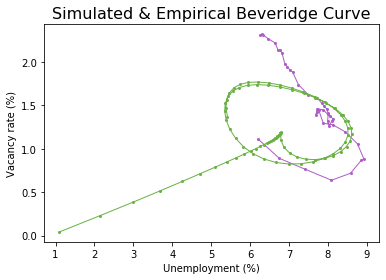

Cost: 0.5045332870875507 Union area: 2.93912147919006 Intersection_area: 1.4562368581446747
Simulation took:  0:00:39.397232
a: 0.026 delta_u: 0.011 delta_nu: 0.00042 gamma_u: 0.174 timestep: 16.6 fitness: 0.5045332870875507


(0.5045332870875507,)

In [10]:
# THIS IS WHAT CURRENT MODEL EXECUTION IS BASED ON
a = 0.026
delta_u = 0.011
delta_nu = 0.00042
gamma_u = 0.174
gamma_nu = gamma_u
timestep = 16.6
eval_func1([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 19:42:05.714498


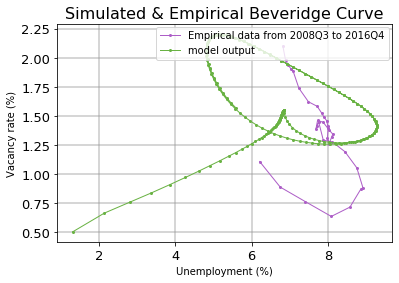

Cost: 0.18367073523974878 Union area: 3.485445378902599 Intersection_area: 0.6401743153810251
Simulation took:  0:01:31.100351
a: 0.03 delta_u: 0.013 delta_nu: 0.005 gamma_u: 0.14 timestep: 6 fitness: 0.18367073523974878
Simulation started at:  2020-05-16 19:43:36.836170


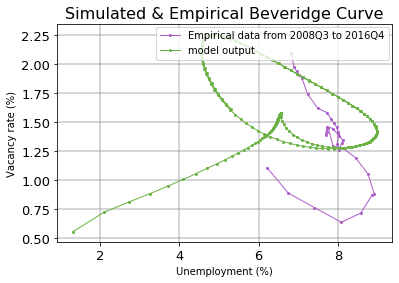

Cost: 0.18031272833041204 Union area: 3.5051226264837383 Intersection_area: 0.6320182239139426
Simulation took:  0:01:30.648586
a: 0.03 delta_u: 0.013 delta_nu: 0.0055 gamma_u: 0.14 timestep: 6 fitness: 0.18031272833041204
Simulation started at:  2020-05-16 19:45:07.506194


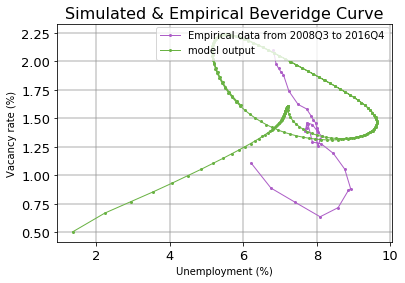

Cost: 0.14449405914016134 Union area: 3.598019576823761 Intersection_area: 0.5198924535210308
Simulation took:  0:01:29.858361
a: 0.03 delta_u: 0.0135 delta_nu: 0.005 gamma_u: 0.14 timestep: 6 fitness: 0.14449405914016134
Simulation started at:  2020-05-16 19:46:37.386455


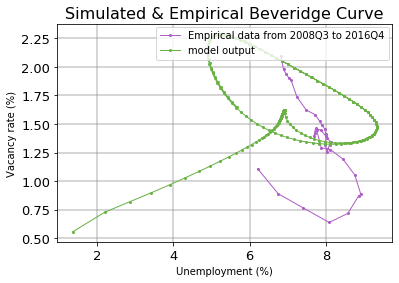

Cost: 0.14735681523013416 Union area: 3.5986795184165317 Intersection_area: 0.530289952867773
Simulation took:  0:01:32.449797
a: 0.03 delta_u: 0.0135 delta_nu: 0.0055 gamma_u: 0.14 timestep: 6 fitness: 0.14735681523013416
Simulation started at:  2020-05-16 19:48:09.857778


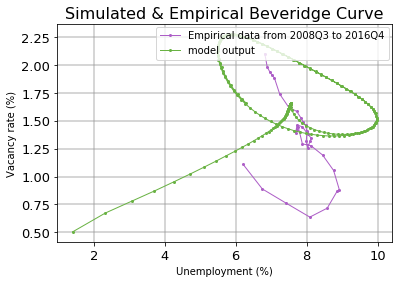

Cost: 0.1052092268031207 Union area: 3.7179034417104866 Intersection_area: 0.39115774643102164
Simulation took:  0:01:41.378888
a: 0.03 delta_u: 0.014 delta_nu: 0.005 gamma_u: 0.14 timestep: 6 fitness: 0.1052092268031207
Simulation started at:  2020-05-16 19:49:51.258155


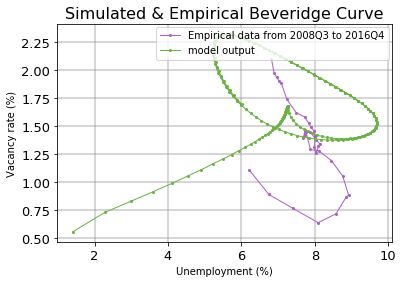

Cost: 0.11071347726423225 Union area: 3.7123619611746945 Intersection_area: 0.4110085015851152
Simulation took:  0:01:42.970362
a: 0.03 delta_u: 0.014 delta_nu: 0.0055 gamma_u: 0.14 timestep: 6 fitness: 0.11071347726423225


In [159]:
a = 0.03
delta_u = [0.013, 0.0135, 0.014]
delta_nu = [0.005, 0.0055, 0.06]
gamma_u = 0.14
gamma_nu = gamma_u
timestep = 6
for du in delta_u:
    for dnu in delta_nu:
        eval_func([a, du, dnu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 19:36:58.756950


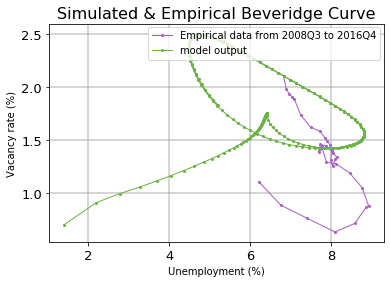

Cost: 0.11436154318889746 Union area: 3.716973990193748 Intersection_area: 0.4250788815115509
Simulation took:  0:01:37.553049
a: 0.03 delta_u: 0.014 delta_nu: 0.007 gamma_u: 0.14 timestep: 6 fitness: 0.11436154318889746


(0.11436154318889746,)

In [158]:
a = 0.03
delta_u = 0.014
delta_nu = 0.007
gamma_u = 0.14
gamma_nu = gamma_u
timestep = 6
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 20:48:46.950507


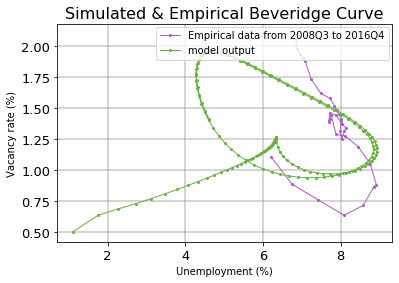

Cost: 0.32978751357261094 Union area: 3.4644606431059874 Intersection_area: 1.1425358613600922
Simulation took:  0:01:13.955295
a: 0.035 delta_u: 0.011 delta_nu: 0.005 gamma_u: 0.11 timestep: 8 fitness: 0.32978751357261094


(0.32978751357261094,)

In [166]:
# THIS IS RESULT

a = 0.035
delta_u = 0.011
delta_nu = 0.005
gamma_u = 0.11
gamma_nu = gamma_u
timestep = 8
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 20:41:03.658783


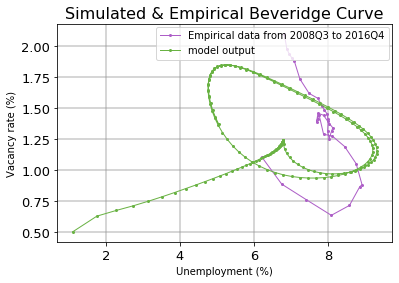

Cost: 0.38211013161550245 Union area: 3.170416162274386 Intersection_area: 1.2114481370425818
Simulation took:  0:01:19.507100
a: 0.035 delta_u: 0.011 delta_nu: 0.005 gamma_u: 0.1 timestep: 8 fitness: 0.38211013161550245


(0.38211013161550245,)

In [165]:
# THIS IS RESULT

a = 0.035
delta_u = 0.011
delta_nu = 0.005
gamma_u = 0.1
gamma_nu = gamma_u
timestep = 8
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 20:15:56.737036


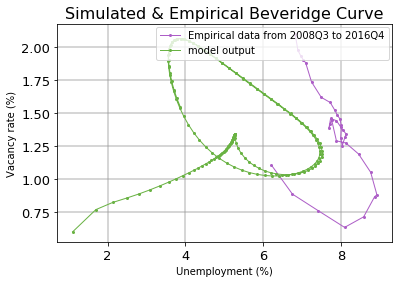

Cost: 0.11416063990072431 Union area: 3.6300570043178904 Intersection_area: 0.41440963048903673
Simulation took:  0:01:15.903118
a: 0.03 delta_u: 0.011 delta_nu: 0.006 gamma_u: 0.12 timestep: 8 fitness: 0.11416063990072431


(0.11416063990072431,)

In [162]:
# THIS IS RESULT

a = 0.03
delta_u = 0.011
delta_nu = 0.006
gamma_u = 0.12
gamma_nu = gamma_u
timestep = 8
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 12:05:15.201898


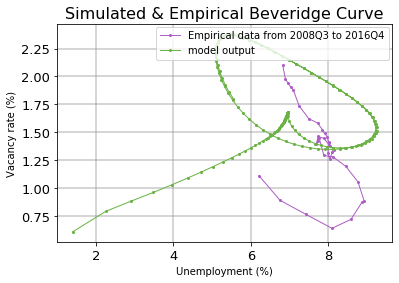

Cost: 0.13176592954023367 Union area: 3.7767160422392543 Intersection_area: 0.49764249991516774
Simulation took:  0:04:14.169375
a: 0.03 delta_u: 0.014 delta_nu: 0.006 gamma_u: 0.14 timestep: 8 fitness: 0.13176592954023367


(0.13176592954023367,)

In [150]:
# a: 0.023646 delta_u: 0.011508 delta_nu: 0.003494 gamma_u: 0.124867 timestep: 6.446819
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.03
delta_u = 0.014
delta_nu = 0.006
gamma_u = 0.14
gamma_nu = gamma_u
timestep = 8
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 11:29:52.229971


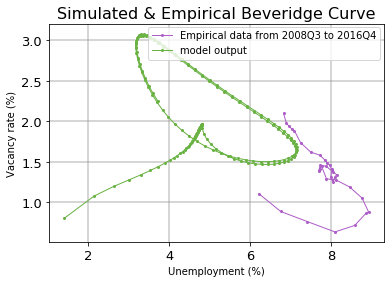

Cost: 0.039743470044171614 Union area: 4.326482537261382 Intersection_area: 0.17194942911627936
Simulation took:  0:04:18.340587
a: 0.03 delta_u: 0.014 delta_nu: 0.008 gamma_u: 0.2 timestep: 8 fitness: 0.039743470044171614


(0.039743470044171614,)

In [148]:
# a: 0.023646 delta_u: 0.011508 delta_nu: 0.003494 gamma_u: 0.124867 timestep: 6.446819
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.03
delta_u = 0.014
delta_nu = 0.008
gamma_u = 0.2
gamma_nu = gamma_u
timestep = 8
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 11:15:28.776822


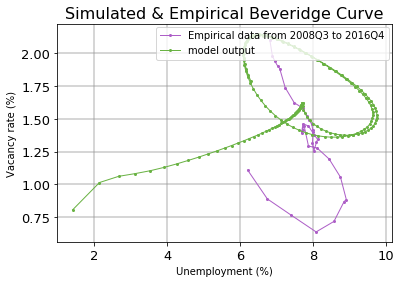

Cost: 0.11284215228264859 Union area: 3.2055695031868447 Intersection_area: 0.3617233620312241
Simulation took:  0:05:19.549112
a: 0.03 delta_u: 0.014 delta_nu: 0.008 gamma_u: 0.09 timestep: 8 fitness: 0.11284215228264859


(0.11284215228264859,)

In [147]:
# a: 0.023646 delta_u: 0.011508 delta_nu: 0.003494 gamma_u: 0.124867 timestep: 6.446819
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.03
delta_u = 0.014
delta_nu = 0.008
gamma_u = 0.09
gamma_nu = gamma_u
timestep = 8
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 09:34:34.833410


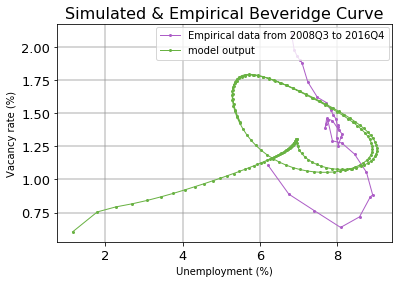

Cost: 0.35593272964979233 Union area: 2.62139087517907 Intersection_area: 0.9330388096815445
Simulation took:  0:01:13.837018
a: 0.03 delta_u: 0.0115 delta_nu: 0.006 gamma_u: 0.09 timestep: 8 fitness: 0.35593272964979233


(0.35593272964979233,)

In [142]:
# a: 0.023646 delta_u: 0.011508 delta_nu: 0.003494 gamma_u: 0.124867 timestep: 6.446819
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.03
delta_u = 0.0115
delta_nu = 0.006
gamma_u = 0.09
gamma_nu = gamma_u
timestep = 8
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 09:26:37.928847


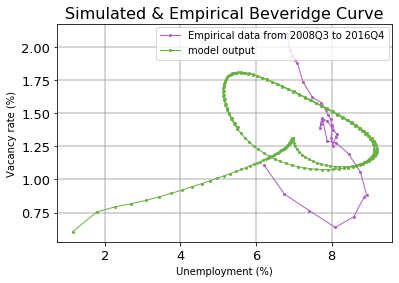

Cost: 0.32292013075242415 Union area: 2.732695223776071 Intersection_area: 0.8824422989682938
Simulation took:  0:01:34.058510
a: 0.03 delta_u: 0.0115 delta_nu: 0.006 gamma_u: 0.09 timestep: 6.5 fitness: 0.32292013075242415


(0.32292013075242415,)

In [141]:
# a: 0.023646 delta_u: 0.011508 delta_nu: 0.003494 gamma_u: 0.124867 timestep: 6.446819
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.03
delta_u = 0.0115
delta_nu = 0.006
gamma_u = 0.09
gamma_nu = gamma_u
timestep = 6.5
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 09:23:03.046219


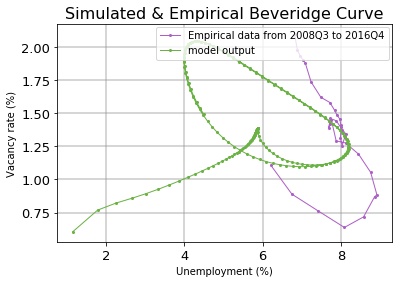

Cost: 0.2109022292386033 Union area: 3.2762020103604472 Intersection_area: 0.690958307421012
Simulation took:  0:01:33.173716
a: 0.03 delta_u: 0.0115 delta_nu: 0.006 gamma_u: 0.115 timestep: 6.5 fitness: 0.2109022292386033


(0.2109022292386033,)

In [140]:
# a: 0.023646 delta_u: 0.011508 delta_nu: 0.003494 gamma_u: 0.124867 timestep: 6.446819
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.03
delta_u = 0.0115
delta_nu = 0.006
gamma_u = 0.115
gamma_nu = gamma_u
timestep = 6.5
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 09:14:40.743538


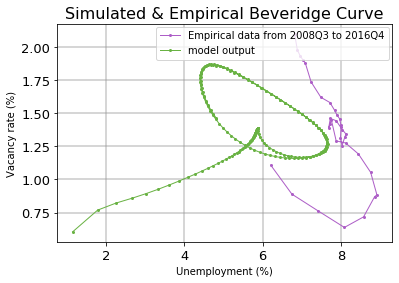

Cost: 0.1421084527178992 Union area: 2.732584613484216 Intersection_area: 0.3883233713429806
Simulation took:  0:01:28.872387
a: 0.023 delta_u: 0.0115 delta_nu: 0.006 gamma_u: 0.115 timestep: 6.5 fitness: 0.1421084527178992


(0.1421084527178992,)

In [139]:
# a: 0.023646 delta_u: 0.011508 delta_nu: 0.003494 gamma_u: 0.124867 timestep: 6.446819
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.023
delta_u = 0.0115
delta_nu = 0.006
gamma_u = 0.115
gamma_nu = gamma_u
timestep = 6.5
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 19:26:41.894831


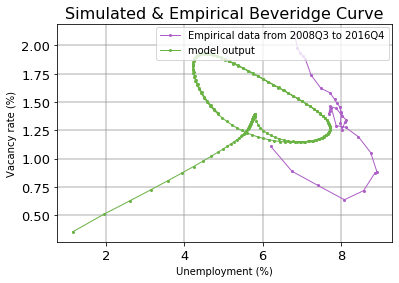

Cost: 0.15151264787217725 Union area: 2.9047846727581486 Intersection_area: 0.440111617268103
Simulation took:  0:01:39.234997
a: 0.023 delta_u: 0.0115 delta_nu: 0.0035 gamma_u: 0.17 timestep: 6.5 fitness: 0.15151264787217725


(0.15151264787217725,)

In [153]:
# a: 0.023646 delta_u: 0.011508 delta_nu: 0.003494 gamma_u: 0.124867 timestep: 6.446819
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.023
delta_u = 0.0115
delta_nu = 0.0035
gamma_u = 0.17
gamma_nu = gamma_u
timestep = 6.5
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 01:27:22.823550


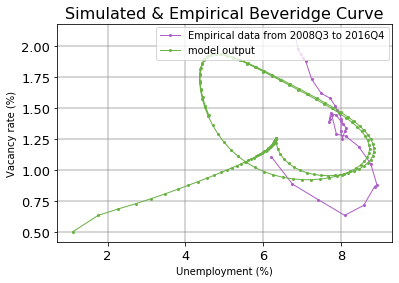

Cost: 0.3401785423948144 Union area: 3.4155715127758266 Intersection_area: 1.1619041386613318
Simulation took:  0:01:05.376689
a: 0.035 delta_u: 0.011 delta_nu: 0.005 gamma_u: 0.11 timestep: 9 fitness: 0.3401785423948144


(0.3401785423948144,)

In [122]:
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.035
delta_u = 0.011
delta_nu = 0.005
gamma_u = 0.11
gamma_nu = gamma_u
timestep = 9
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 01:13:45.309753


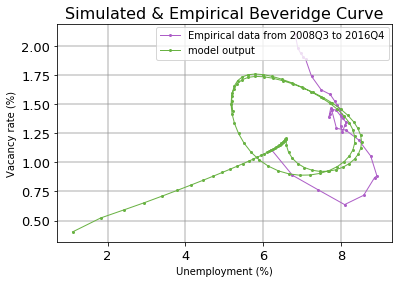

Cost: 0.4202151263344008 Union area: 2.701035696585506 Intersection_area: 1.1350160564744045
Simulation took:  0:00:40.352240
a: 0.03 delta_u: 0.011 delta_nu: 0.004 gamma_u: 0.12 timestep: 14 fitness: 0.4202151263344008


(0.4202151263344008,)

In [109]:
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.03
delta_u = 0.011
delta_nu = 0.004
gamma_u = 0.12
gamma_nu = gamma_u
timestep = 14
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 01:52:40.494775


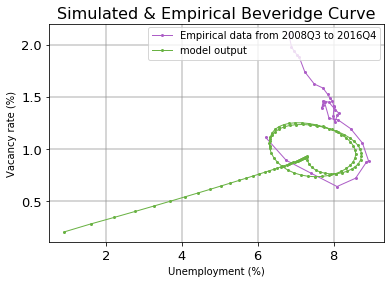

Cost: 0.4193039655742454 Union area: 1.9477057099396644 Intersection_area: 0.8166807279493022
Simulation took:  0:00:42.561078
a: 0.023 delta_u: 0.009 delta_nu: 0.002 gamma_u: 0.1 timestep: 14 fitness: 0.4193039655742454


(0.4193039655742454,)

In [135]:
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.023
delta_u = 0.009
delta_nu = 0.002
gamma_u = 0.1
gamma_nu = gamma_u
timestep = 14
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-16 00:36:41.843959


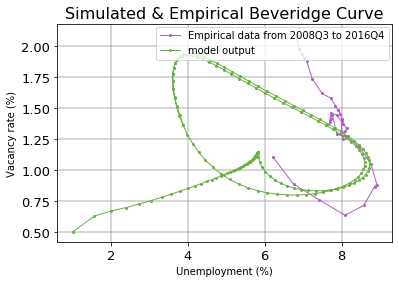

Cost: 0.2734128012857476 Union area: 4.0265576815109405 Intersection_area: 1.1009124152405512
Simulation took:  0:01:10.607209
a: 0.04 delta_u: 0.01 delta_nu: 0.005 gamma_u: 0.1 timestep: 8 fitness: 0.2734128012857476


(0.2734128012857476,)

In [81]:
# a: 0.049006 delta_u: 0.009038 delta_nu: 0.002111 
# gamma_u: 0.09037999999999999 timestep: 6.772278 fitness: 0.31677714265872986
a = 0.04
delta_u = 0.010
delta_nu = 0.005
gamma_u = 0.1
gamma_nu = gamma_u
timestep = 8
eval_func([a, delta_u, delta_nu, gamma_u, timestep, gamma_nu])

Simulation started at:  2020-05-15 18:13:41.012322


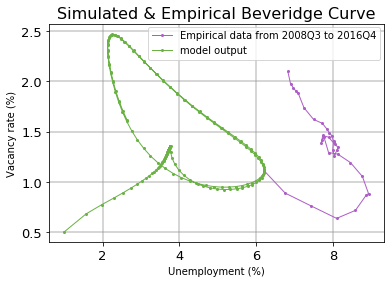

Cost: 1.0 Union area: 4.513445050894707 Intersection_area: 0.0
Simulation took:  0:01:14.160746
a: 0.03 delta_u: 0.01 delta_nu: 0.005 gamma_u: 0.2 timestep: 8 fitness: 1.0


(1.0,)

In [24]:
base_ind = [0.03, 0.01, 0.005, 0.2, 8]

eval_func1(base_ind)

Simulation started at:  2020-05-09 15:44:52.871944


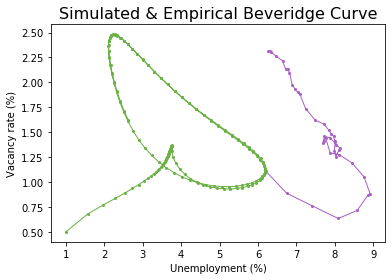

Cost: 1.0 Union area: 4.803275499247101 Intersection_area: 0.0
Simulation took:  0:03:03.637402
a: 0.03 delta_u: 0.01 delta_nu: 0.005 gamma_u: 0.2 timestep: 8 fitness: 1.0


(1.0,)

In [10]:
base_ind = [0.03, 0.01, 0.005, 0.2, 8]

eval_func1(base_ind)

Simulation started at:  2020-05-16 10:05:39.829564
Simulation started at:  2020-05-16 10:05:39.829501
Simulation started at:  2020-05-16 10:05:39.829426
Simulation started at:  2020-05-16 10:05:39.830404


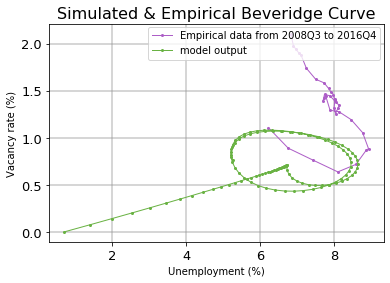

Cost: 0.14278579717783718 Union area: 3.0586142999630517 Intersection_area: 0.43672668107975676
Simulation took:  0:03:19.461462
a: 0.029447 delta_u: 0.00694 delta_nu: 0.0 gamma_u: 0.106511 timestep: 12.737062 fitness: 0.14278579717783718
Simulation started at:  2020-05-16 10:08:59.360032


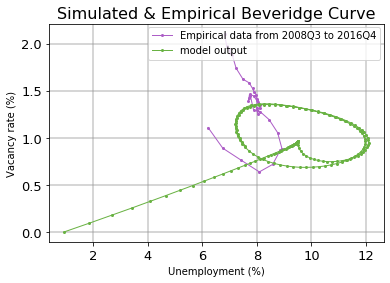

Cost: 0.177368612696376 Union area: 3.630352134906866 Intersection_area: 0.6439105217677576
Simulation took:  0:05:10.136581
a: 0.036107 delta_u: 0.009334 delta_nu: 0.0 gamma_u: 0.097917 timestep: 8.268124 fitness: 0.177368612696376
Simulation started at:  2020-05-16 10:10:50.059676


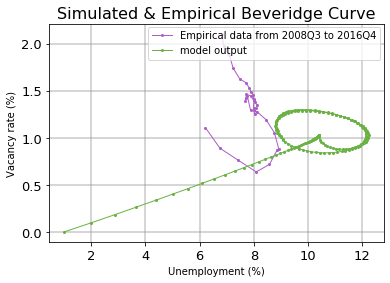

Cost: 0.0 Union area: 3.0298301745919805 Intersection_area: 0.0
Simulation took:  0:05:15.075231
a: 0.025631 delta_u: 0.009992 delta_nu: 0.0 gamma_u: 0.094298 timestep: 8.097119 fitness: 1
Simulation started at:  2020-05-16 10:10:54.994154


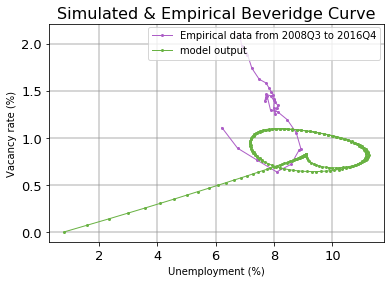

Cost: 0.20360481760086352 Union area: 2.6818410549838685 Intersection_area: 0.546035758834498
Simulation took:  0:06:22.058096
a: 0.028791 delta_u: 0.008049 delta_nu: 0.0 gamma_u: 0.087716 timestep: 6.70349 fitness: 0.20360481760086352
Simulation started at:  2020-05-16 10:12:01.947519


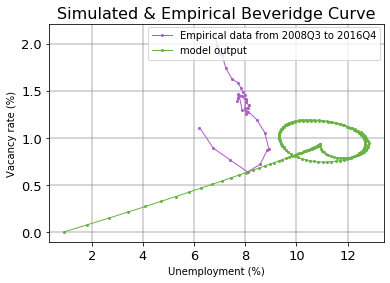

Cost: 0.0 Union area: 3.034395919078052 Intersection_area: 0.0
Simulation took:  0:05:04.517839
a: 0.028155 delta_u: 0.009195 delta_nu: 0.0 gamma_u: 0.080938 timestep: 8.39876 fitness: 1
Simulation started at:  2020-05-16 10:14:03.989354


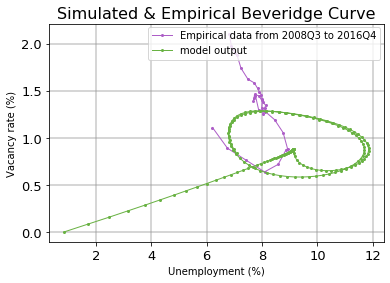

Cost: 0.2737806865048564 Union area: 3.5213115386277205 Intersection_area: 0.9640670904429693
Simulation took:  0:04:54.059138
a: 0.038752 delta_u: 0.008558 delta_nu: 0.0 gamma_u: 0.093223 timestep: 8.706401 fitness: 0.2737806865048564
Simulation started at:  2020-05-16 10:15:49.117895


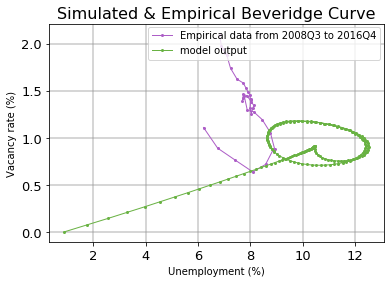

Cost: 0.008386360084744443 Union area: 3.19860974326757 Intersection_area: 0.026824693077613822
Simulation took:  0:05:27.348773
a: 0.029773 delta_u: 0.008912 delta_nu: 0.0 gamma_u: 0.08281 timestep: 7.7889 fitness: 0.008386360084744443
Simulation started at:  2020-05-16 10:16:17.460818


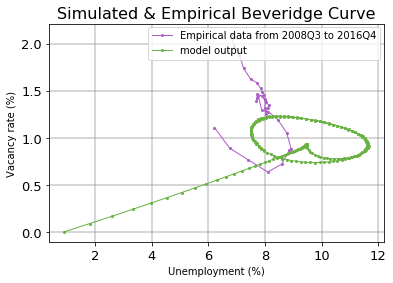

Cost: 0.14479493456047807 Union area: 2.9358535291767405 Intersection_area: 0.42509671963629475
Simulation took:  0:06:16.208443
a: 0.029006 delta_u: 0.009038 delta_nu: 0.0 gamma_u: 0.094997 timestep: 6.772278 fitness: 0.14479493456047807
Simulation started at:  2020-05-16 10:18:18.250485


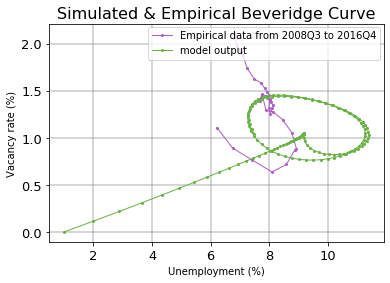

Cost: 0.17117344524519465 Union area: 3.365900625251921 Intersection_area: 0.5761528063773261
Simulation took:  0:04:16.901227
a: 0.031404 delta_u: 0.010081 delta_nu: 0.0 gamma_u: 0.111487 timestep: 10.107383 fitness: 0.17117344524519465
Simulation started at:  2020-05-16 10:20:06.132410


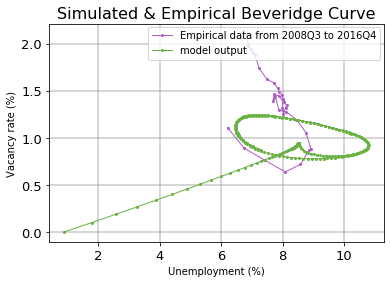

Cost: 0.33934231927361774 Union area: 2.4267107310577987 Intersection_area: 0.8234856476833298
Simulation took:  0:08:31.444092
a: 0.027396 delta_u: 0.008972 delta_nu: 0.0 gamma_u: 0.107541 timestep: 5.106141 fitness: 0.33934231927361774
Simulation started at:  2020-05-16 10:22:35.540855


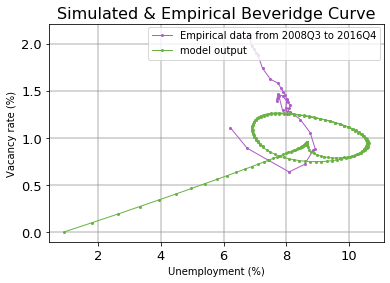

Cost: 0.29177294411321314 Union area: 2.5185139520107924 Intersection_area: 0.7348342305683925
Simulation took:  0:05:36.247627
a: 0.026156 delta_u: 0.00912 delta_nu: 0.0 gamma_u: 0.10705 timestep: 7.847257 fitness: 0.29177294411321314
Simulation started at:  2020-05-16 10:23:54.584117


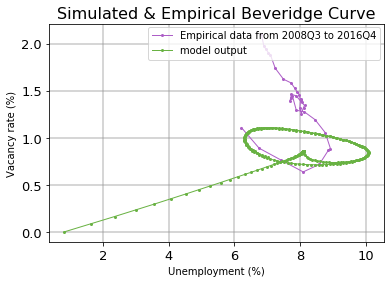

Cost: 0.3190550684133897 Union area: 2.2034791026243905 Intersection_area: 0.7030311758352995
Simulation took:  0:08:25.673323
a: 0.023984 delta_u: 0.008187 delta_nu: 0.0 gamma_u: 0.103309 timestep: 5.211994 fitness: 0.3190550684133897
Simulation started at:  2020-05-16 10:24:43.222865


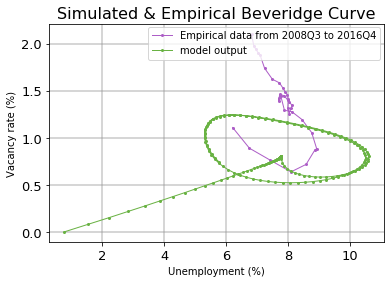

Cost: 0.27822654049650813 Union area: 3.574708374023804 Intersection_area: 0.9945787441885408
Simulation took:  0:05:35.501183
a: 0.037489 delta_u: 0.007744 delta_nu: 0.0 gamma_u: 0.10157 timestep: 7.664548 fitness: 0.27822654049650813
Simulation started at:  2020-05-16 10:25:41.779551


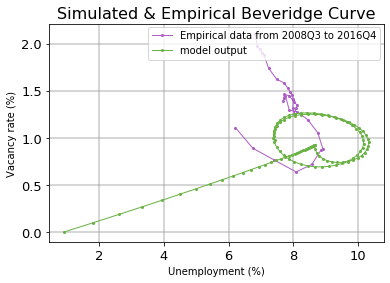

Cost: 0.23346588790854542 Union area: 2.5170836480653036 Intersection_area: 0.5876531688356468
Simulation took:  0:03:03.310424
a: 0.025796 delta_u: 0.009117 delta_nu: 0.0 gamma_u: 0.105865 timestep: 13.119734 fitness: 0.23346588790854542
Simulation started at:  2020-05-16 10:26:57.978219


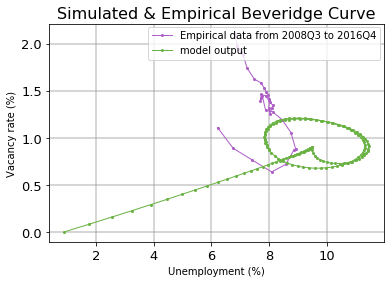

Cost: 0.10688067999266619 Union area: 2.9683770581430413 Intersection_area: 0.3172621584489583
Simulation took:  0:04:20.055215
a: 0.02901 delta_u: 0.008834 delta_nu: 0.0 gamma_u: 0.091941 timestep: 9.634424 fitness: 0.10688067999266619
Simulation started at:  2020-05-16 10:29:03.363694


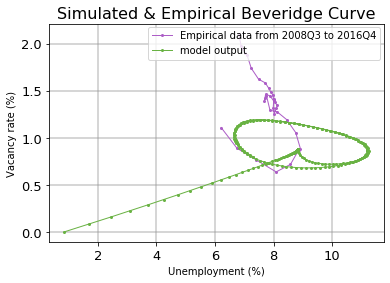

Cost: 0.30771608311252713 Union area: 2.7078028376066805 Intersection_area: 0.8332344830293141
Simulation took:  0:07:08.066927
a: 0.030778 delta_u: 0.008455 delta_nu: 0.0 gamma_u: 0.096031 timestep: 6.039949 fitness: 0.30771608311252713
Simulation started at:  2020-05-16 10:29:43.683806


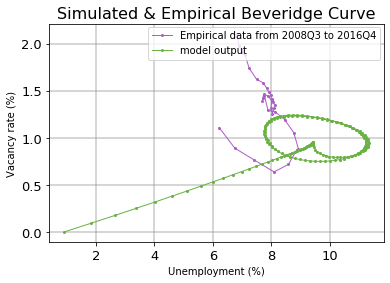

Cost: 0.11393097554093665 Union area: 2.8317790449778073 Intersection_area: 0.3226273491107035
Simulation took:  0:05:11.942565
a: 0.026454 delta_u: 0.009219 delta_nu: 0.0 gamma_u: 0.09759 timestep: 8.439943 fitness: 0.11393097554093665
Simulation started at:  2020-05-16 10:32:09.990470


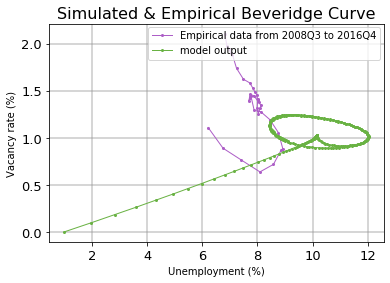

Cost: 0.007473019515390595 Union area: 2.7566386211757954 Intersection_area: 0.02060041421292614
Simulation took:  0:08:23.902299
a: 0.023334 delta_u: 0.009851 delta_nu: 0.0 gamma_u: 0.096072 timestep: 5.107855 fitness: 0.007473019515390595
Simulation started at:  2020-05-16 10:34:05.805077


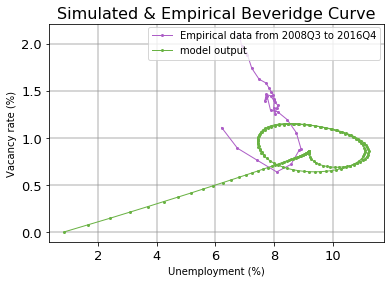

Cost: 0.17531111805740998 Union area: 2.8089295144823123 Intersection_area: 0.4924365737283519
Simulation took:  0:04:52.854325
a: 0.029292 delta_u: 0.008355 delta_nu: 0.0 gamma_u: 0.090025 timestep: 8.727953 fitness: 0.17531111805740998
Simulation started at:  2020-05-16 10:34:36.618622


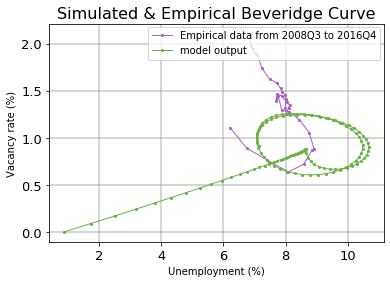

Cost: 0.288662610088589 Union area: 2.7874359731746936 Intersection_area: 0.8046285434714333
Simulation took:  0:03:35.548979
a: 0.031241 delta_u: 0.008674 delta_nu: 0.0 gamma_u: 0.100356 timestep: 12.213421 fitness: 0.288662610088589
Simulation started at:  2020-05-16 10:35:45.604490


Process ForkPoolWorker-37:
Process ForkPoolWorker-35:
Process ForkPoolWorker-34:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python

Simulation started at:  2020-05-16 10:37:05.634543


KeyboardInterrupt: 

Simulation started at:  2020-05-16 10:37:05.730324
Simulation started at:  2020-05-16 10:37:05.758575


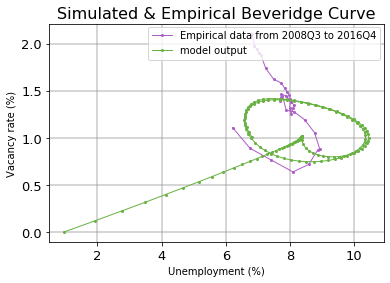

Cost: 0.38917966434495016 Union area: 2.696749266540897 Intersection_area: 1.0495199743748769
Simulation took:  0:04:03.725541
a: 0.028741 delta_u: 0.009697 delta_nu: 0.0 gamma_u: 0.119573 timestep: 10.203408 fitness: 0.38917966434495016
Simulation started at:  2020-05-16 10:41:09.578230


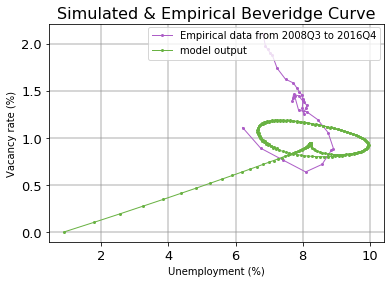

Cost: 0.31159290184215466 Union area: 2.1100319254697784 Intersection_area: 0.6574709706367172
Simulation took:  0:07:06.490488
a: 0.021295 delta_u: 0.008931 delta_nu: 0.0 gamma_u: 0.111628 timestep: 5.870129 fitness: 0.31159290184215466
Simulation started at:  2020-05-16 10:44:12.382272


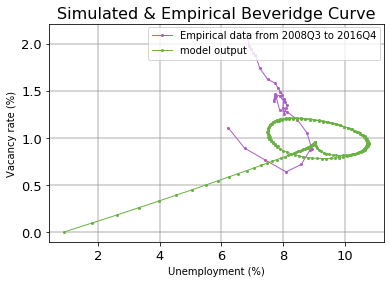

Cost: 0.16237569088702022 Union area: 2.4899915290196404 Intersection_area: 0.40431409482739195
Simulation took:  0:05:26.333782
a: 0.023099 delta_u: 0.009154 delta_nu: 0.0 gamma_u: 0.102075 timestep: 7.670148 fitness: 0.16237569088702022
Simulation started at:  2020-05-16 10:46:35.973528


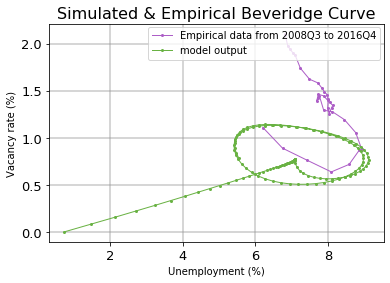

Cost: 0.2463235422758126 Union area: 2.876723248134879 Intersection_area: 0.7086046606277648
Simulation took:  0:03:40.278664
a: 0.029184 delta_u: 0.007471 delta_nu: 0.0 gamma_u: 0.108637 timestep: 11.085642 fitness: 0.2463235422758126
Simulation started at:  2020-05-16 10:47:52.744100


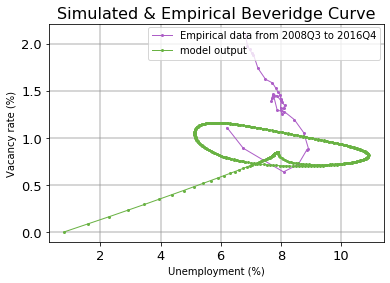

Cost: 0.2616778585616315 Union area: 2.8070175589976865 Intersection_area: 0.7345343437834128
Simulation took:  0:13:30.902239
a: 0.034132 delta_u: 0.00797 delta_nu: 0.0 gamma_u: 0.104784 timestep: 3.063748 fitness: 0.2616778585616315
Simulation started at:  2020-05-16 10:50:36.643948


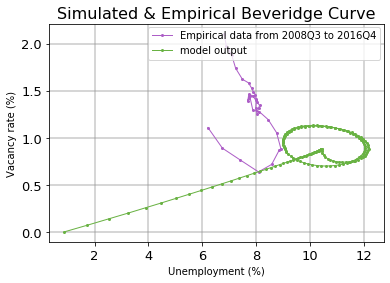

Cost: 0.0 Union area: 2.8819620311705347 Intersection_area: 0.0
Simulation took:  0:04:35.873684
a: 0.026538 delta_u: 0.00873 delta_nu: 0.0 gamma_u: 0.080828 timestep: 9.178649 fitness: 1
Simulation started at:  2020-05-16 10:52:28.691935


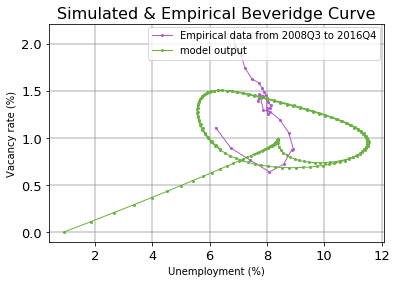

Cost: 0.38263998741792116 Union area: 3.7475544606174993 Intersection_area: 1.4339641916586543
Simulation took:  0:06:13.756579
a: 0.039928 delta_u: 0.00928 delta_nu: 0.0 gamma_u: 0.113857 timestep: 6.683608 fitness: 0.38263998741792116
Simulation started at:  2020-05-16 10:52:49.879627


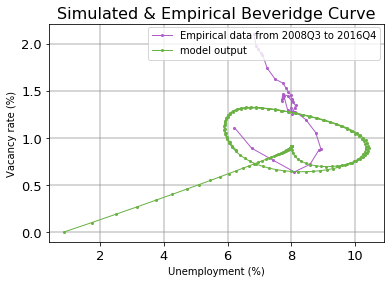

Cost: 0.42615610282474425 Union area: 2.861626153191261 Intersection_area: 1.2194994491853524
Simulation took:  0:04:54.839142
a: 0.032309 delta_u: 0.008702 delta_nu: 0.0 gamma_u: 0.111823 timestep: 8.478946 fitness: 0.42615610282474425
Simulation started at:  2020-05-16 10:55:31.560218


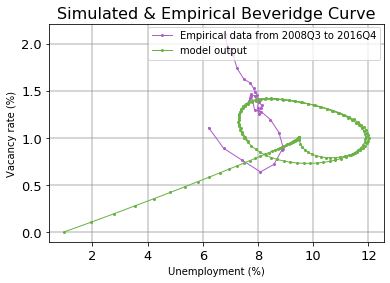

Cost: 0.15376977387609964 Union area: 3.6719033132490666 Intersection_area: 0.56462774217321
Simulation took:  0:04:50.352306
a: 0.03491 delta_u: 0.009762 delta_nu: 0.0 gamma_u: 0.102992 timestep: 8.631869 fitness: 0.15376977387609964
Simulation started at:  2020-05-16 10:57:40.321402


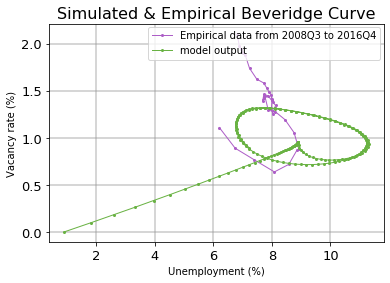

Cost: 0.29274097367298596 Union area: 2.9678233105525935 Intersection_area: 0.8688034856205509
Simulation took:  0:05:35.733401
a: 0.031721 delta_u: 0.009164 delta_nu: 0.0 gamma_u: 0.103996 timestep: 7.45683 fitness: 0.29274097367298596
Simulation started at:  2020-05-16 11:01:07.375236


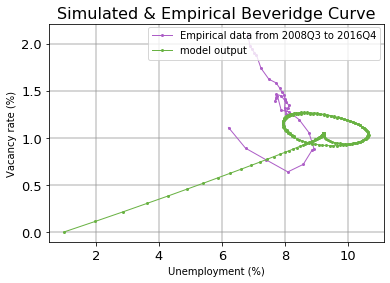

Cost: 0.062214667501859375 Union area: 2.4053016955322897 Intersection_area: 0.1496450452292
Simulation took:  0:06:04.775191
a: 0.018399 delta_u: 0.009996 delta_nu: 0.0 gamma_u: 0.109957 timestep: 7.002811 fitness: 0.062214667501859375
Simulation started at:  2020-05-16 11:03:45.196228


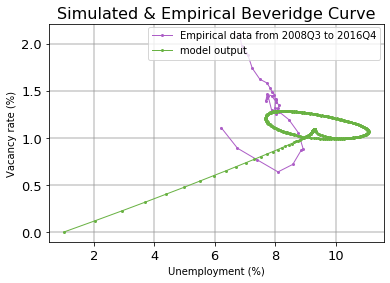

Cost: 0.05963894192175194 Union area: 2.3985680979821655 Intersection_area: 0.1430480634909254
Simulation took:  0:11:35.341132
a: 0.020529 delta_u: 0.010242 delta_nu: 0.0 gamma_u: 0.112739 timestep: 3.626864 fitness: 0.05963894192175194
Simulation started at:  2020-05-16 11:04:04.218041


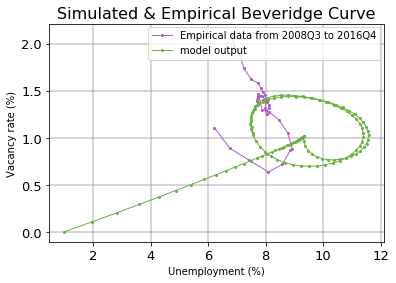

Cost: 0.14323033194844934 Union area: 3.627633120211768 Intersection_area: 0.5195870959951205
Simulation took:  0:03:25.827286
a: 0.03428 delta_u: 0.009918 delta_nu: 0.0 gamma_u: 0.10688 timestep: 12.034436 fitness: 0.14323033194844934
Simulation started at:  2020-05-16 11:07:30.123873


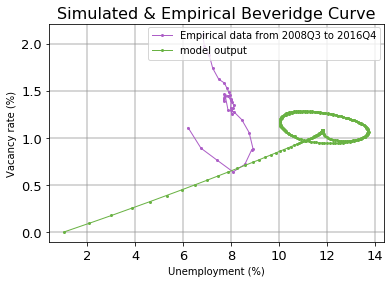

Cost: 0.0 Union area: 2.796609233453754 Intersection_area: 0.0
Simulation took:  0:08:19.681054
a: 0.024878 delta_u: 0.010461 delta_nu: 0.0 gamma_u: 0.085052 timestep: 5.081864 fitness: 1
Simulation started at:  2020-05-16 11:12:04.965940


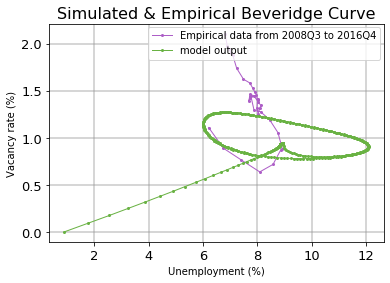

Cost: 0.32845757504264667 Union area: 2.853700345395682 Intersection_area: 0.937319495347029
Simulation took:  0:13:02.528086
a: 0.03646 delta_u: 0.008906 delta_nu: 0.0 gamma_u: 0.101623 timestep: 3.25412 fitness: 0.32845757504264667
Simulation started at:  2020-05-16 11:14:10.022519


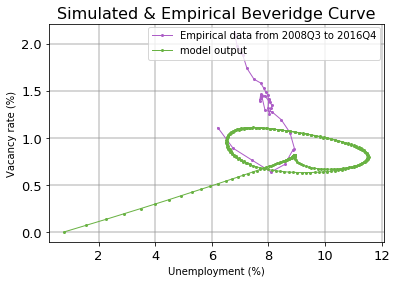

Cost: 0.26512603291860143 Union area: 2.824634508031188 Intersection_area: 0.7488841415592943
Simulation took:  0:08:18.262903
a: 0.032855 delta_u: 0.00787 delta_nu: 0.0 gamma_u: 0.087889 timestep: 5.098344 fitness: 0.26512603291860143
Simulation started at:  2020-05-16 11:15:48.521713


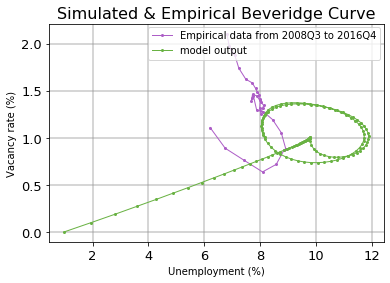

Cost: 0.058065335410663596 Union area: 3.469586866203018 Intersection_area: 0.20146272512251143
Simulation took:  0:03:51.174975
a: 0.031505 delta_u: 0.009816 delta_nu: 0.0 gamma_u: 0.099432 timestep: 10.680317 fitness: 0.058065335410663596
Simulation started at:  2020-05-16 11:18:01.275896


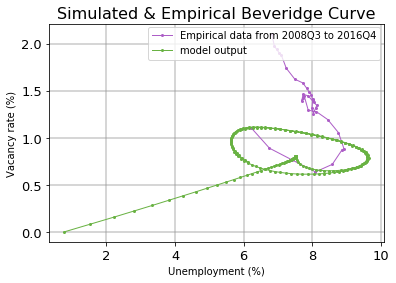

Cost: 0.26295830983590934 Union area: 2.60310065974117 Intersection_area: 0.6845069498182786
Simulation took:  0:06:15.434635
a: 0.026906 delta_u: 0.007691 delta_nu: 0.0 gamma_u: 0.105202 timestep: 6.734254 fitness: 0.26295830983590934
Simulation started at:  2020-05-16 11:18:20.539627


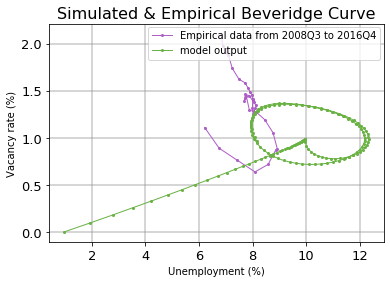

Cost: 0.06761473777783472 Union area: 3.7203901770048926 Intersection_area: 0.2515532062494179
Simulation took:  0:04:22.802962
a: 0.034365 delta_u: 0.009656 delta_nu: 0.0 gamma_u: 0.095743 timestep: 9.280333 fitness: 0.06761473777783472
Simulation started at:  2020-05-16 11:22:24.153776


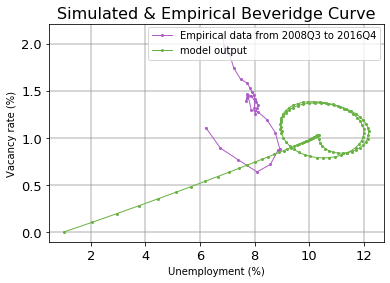

Cost: 0.0 Union area: 3.2856683979169174 Intersection_area: 0.0
Simulation took:  0:03:00.162999
a: 0.029086 delta_u: 0.01024 delta_nu: 0.0 gamma_u: 0.096886 timestep: 12.671659 fitness: 1
Simulation started at:  2020-05-16 11:25:24.358815


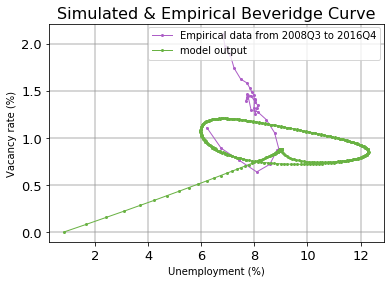

Cost: 0.3076784095290149 Union area: 2.9678689598973116 Intersection_area: 0.9131492012717364
Simulation took:  0:11:57.772073
a: 0.03811 delta_u: 0.008413 delta_nu: 0.0 gamma_u: 0.094126 timestep: 3.255489 fitness: 0.3076784095290149
Simulation started at:  2020-05-16 11:30:18.418283


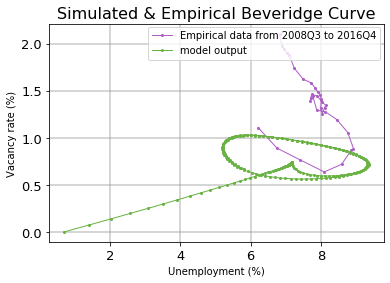

Cost: 0.14306973523940625 Union area: 2.816858422291756 Intersection_area: 0.4030071886841731
Simulation took:  0:06:24.666698
a: 0.027022 delta_u: 0.007048 delta_nu: 0.0 gamma_u: 0.101221 timestep: 5.904754 fitness: 0.14306973523940625
Simulation started at:  2020-05-16 11:31:49.159435


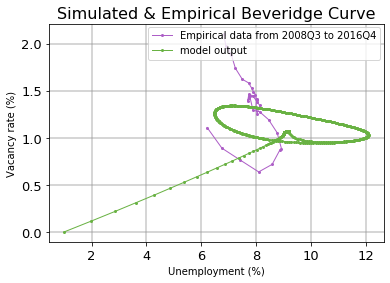

Cost: 0.19732377389032363 Union area: 2.694175753687991 Intersection_area: 0.5316249272415214
Simulation took:  0:16:18.760544
a: 0.032818 delta_u: 0.010008 delta_nu: 0.0 gamma_u: 0.113134 timestep: 2.410728 fitness: 0.19732377389032363
Simulation started at:  2020-05-16 11:32:07.468665


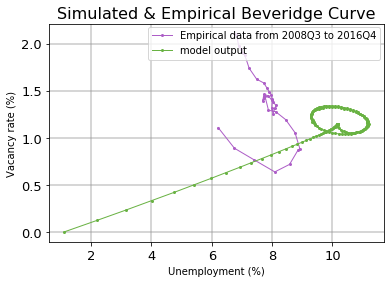

Cost: 0.0 Union area: 2.2840291742421135 Intersection_area: 0.0
Simulation took:  0:03:41.269554
a: 0.014268 delta_u: 0.011061 delta_nu: 0.0 gamma_u: 0.108761 timestep: 9.221069 fitness: 1
Simulation started at:  2020-05-16 11:33:59.841829


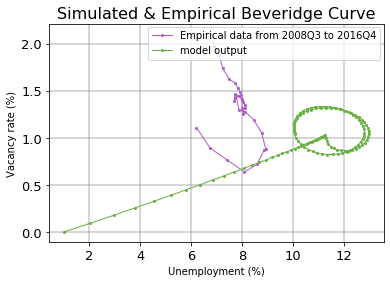

Cost: 0.0 Union area: 2.9676994713196017 Intersection_area: 0.0
Simulation took:  0:02:34.399642
a: 0.027326 delta_u: 0.010287 delta_nu: 0.0 gamma_u: 0.087531 timestep: 11.940621 fitness: 1
Simulation started at:  2020-05-16 11:34:23.609057


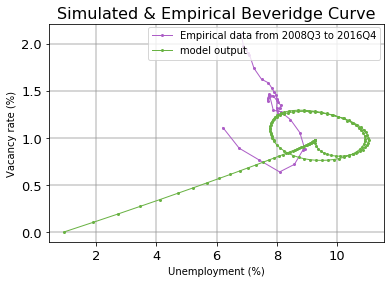

Cost: 0.11589738227983729 Union area: 2.8201639806717864 Intersection_area: 0.3268496229597457
Simulation took:  0:02:10.639240
a: 0.025838 delta_u: 0.009523 delta_nu: 0.0 gamma_u: 0.103007 timestep: 10.296458 fitness: 0.11589738227983729
Simulation started at:  2020-05-16 11:36:34.286474


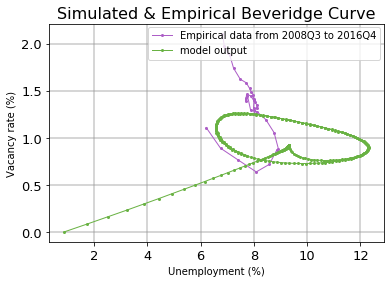

Cost: 0.2726585179234557 Union area: 3.114122182517708 Intersection_area: 0.8490919389178355
Simulation took:  0:05:38.036429
a: 0.036215 delta_u: 0.008813 delta_nu: 0.0 gamma_u: 0.094551 timestep: 4.444088 fitness: 0.2726585179234557
Simulation started at:  2020-05-16 11:37:45.572486


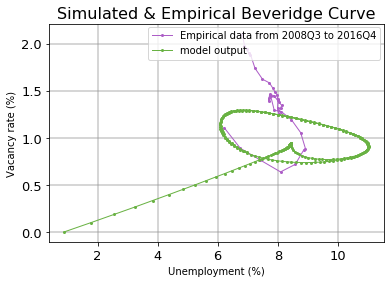

Cost: 0.4082043108354243 Union area: 2.6533011013560395 Intersection_area: 1.0830889475179144
Simulation took:  0:04:17.350893
a: 0.031537 delta_u: 0.00889 delta_nu: 0.0 gamma_u: 0.107889 timestep: 5.34067 fitness: 0.4082043108354243
Simulation started at:  2020-05-16 11:38:17.244862


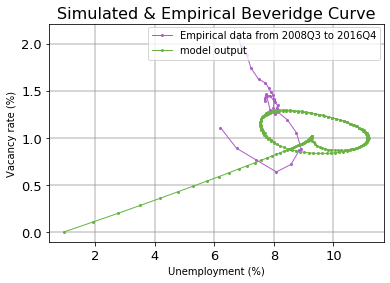

Cost: 0.1269401196100218 Union area: 2.724724521459127 Intersection_area: 0.345876856658381
Simulation took:  0:04:03.766577
a: 0.024787 delta_u: 0.009688 delta_nu: 0.0 gamma_u: 0.105432 timestep: 6.841617 fitness: 0.1269401196100218
Simulation started at:  2020-05-16 11:40:38.170629


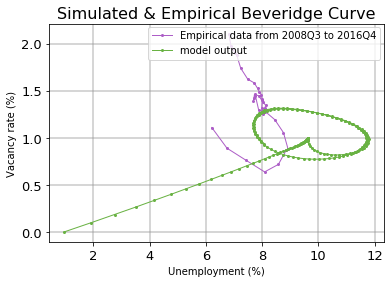

Cost: 0.10434701203539526 Union area: 3.157493175270334 Intersection_area: 0.32947497836161194
Simulation took:  0:03:51.183186
a: 0.029424 delta_u: 0.009574 delta_nu: 0.0 gamma_u: 0.099229 timestep: 7.667407 fitness: 0.10434701203539526
Simulation started at:  2020-05-16 11:41:36.799024


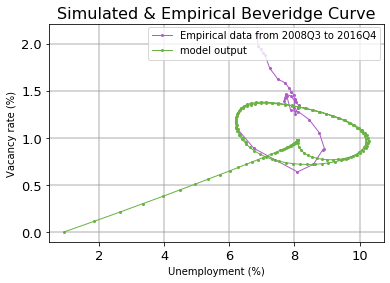

Cost: 0.49640077841729396 Union area: 2.5382311222788516 Intersection_area: 1.2599799049022236
Simulation took:  0:02:50.991113
a: 0.029218 delta_u: 0.009306 delta_nu: 0.0 gamma_u: 0.118951 timestep: 9.169692 fitness: 0.49640077841729396
Simulation started at:  2020-05-16 11:43:29.205179


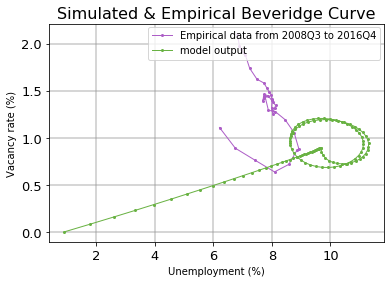

Cost: 0.014782421663088288 Union area: 2.8440301336411595 Intersection_area: 0.042041652658012955
Simulation took:  0:01:52.706736
a: 0.026645 delta_u: 0.009011 delta_nu: 0.0 gamma_u: 0.090347 timestep: 14.024783 fitness: 0.014782421663088288
Simulation started at:  2020-05-16 11:43:29.564415


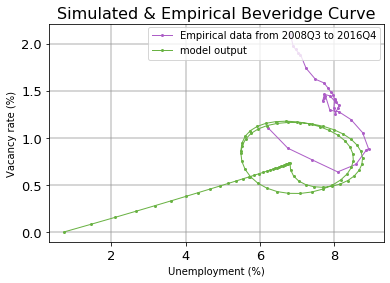

Cost: 0.23192997321874456 Union area: 2.9918932766758135 Intersection_area: 0.6939097275327634
Simulation took:  0:01:56.209741
a: 0.032395 delta_u: 0.007339 delta_nu: 0.0 gamma_u: 0.109892 timestep: 16.793266 fitness: 0.23192997321874456
Simulation started at:  2020-05-16 11:45:25.460785


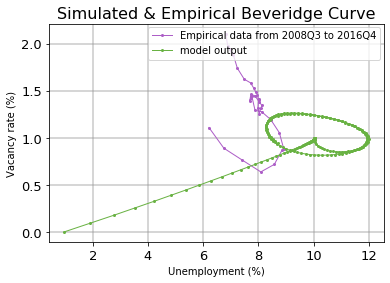

Cost: 0.027241179510273147 Union area: 3.0025326445180496 Intersection_area: 0.08179253075477134
Simulation took:  0:04:33.713208
a: 0.026206 delta_u: 0.009628 delta_nu: 0.0 gamma_u: 0.094778 timestep: 6.947471 fitness: 0.027241179510273147
Simulation started at:  2020-05-16 11:48:03.346999


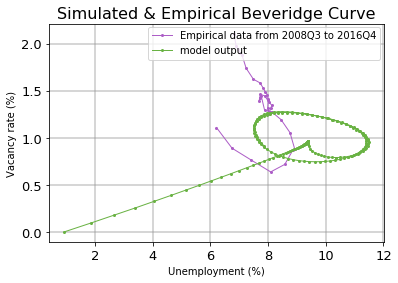

Cost: 0.14565478435984955 Union area: 2.976528562267964 Intersection_area: 0.43354562587807327
Simulation took:  0:03:51.793617
a: 0.028729 delta_u: 0.009294 delta_nu: 0.0 gamma_u: 0.099009 timestep: 7.935621 fitness: 0.14565478435984955
Simulation started at:  2020-05-16 11:49:17.301719


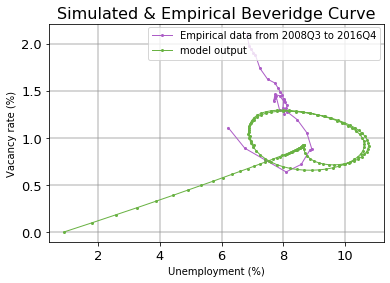

Cost: 0.3241235872811833 Union area: 2.7874966234540817 Intersection_area: 0.9034934051281228
Simulation took:  0:03:04.153870
a: 0.0306 delta_u: 0.008944 delta_nu: 0.0 gamma_u: 0.104456 timestep: 10.274989 fitness: 0.3241235872811833
Simulation started at:  2020-05-16 11:51:07.558030


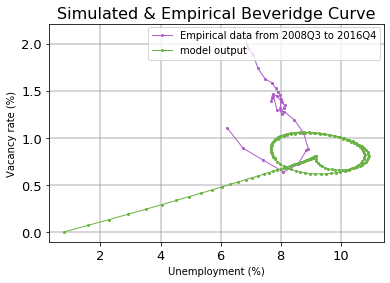

Cost: 0.13077626129624528 Union area: 2.592541983220832 Intersection_area: 0.3390429478191735
Simulation took:  0:03:43.099536
a: 0.026299 delta_u: 0.007904 delta_nu: 0.0 gamma_u: 0.084945 timestep: 9.147228 fitness: 0.13077626129624528
Simulation started at:  2020-05-16 11:53:00.461817


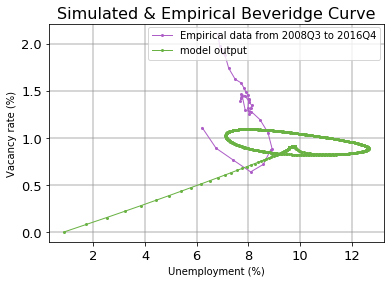

Cost: 0.12389343390453306 Union area: 2.5488505283678493 Intersection_area: 0.3157858444688763
Simulation took:  0:15:51.595787
a: 0.032199 delta_u: 0.008699 delta_nu: 0.0 gamma_u: 0.089645 timestep: 1.981742 fitness: 0.12389343390453306
Simulation started at:  2020-05-16 11:54:08.990354


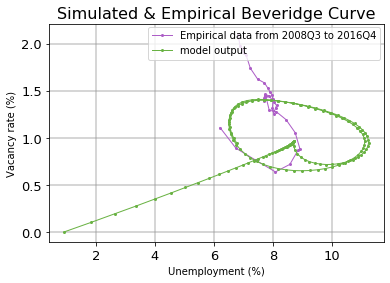

Cost: 0.3648403195123211 Union area: 3.2808093071754536 Intersection_area: 1.1969715158888894
Simulation took:  0:03:28.378842
a: 0.035777 delta_u: 0.009265 delta_nu: 0.0 gamma_u: 0.10807 timestep: 9.520827 fitness: 0.3648403195123211
Simulation started at:  2020-05-16 11:54:36.028137


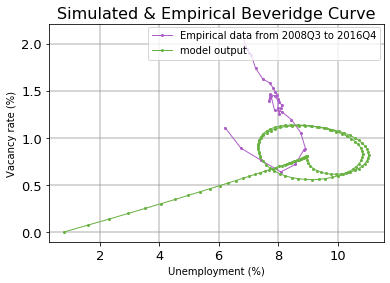

Cost: 0.19809978534844408 Union area: 2.8865846020167094 Intersection_area: 0.571831790049634
Simulation took:  0:02:49.322305
a: 0.032267 delta_u: 0.007976 delta_nu: 0.0 gamma_u: 0.087642 timestep: 10.739672 fitness: 0.19809978534844408
Simulation started at:  2020-05-16 11:55:49.842265


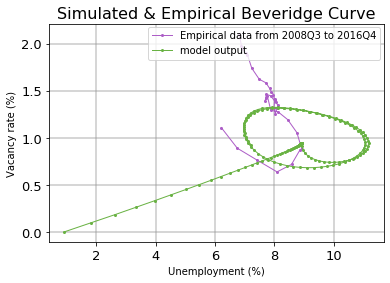

Cost: 0.2690510522082287 Union area: 3.026942330289044 Intersection_area: 0.8144020189378952
Simulation took:  0:03:08.847665
a: 0.031797 delta_u: 0.009157 delta_nu: 0.0 gamma_u: 0.103507 timestep: 9.226941 fitness: 0.2690510522082287
Simulation started at:  2020-05-16 11:57:44.922129


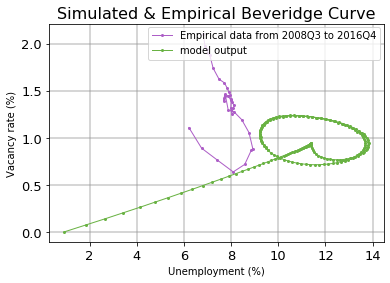

Cost: 0.0 Union area: 3.6652957118944616 Intersection_area: 0.0
Simulation took:  0:04:04.414726
a: 0.035489 delta_u: 0.009239 delta_nu: 0.0 gamma_u: 0.077535 timestep: 7.209402 fitness: 1
Simulation started at:  2020-05-16 11:58:13.445170


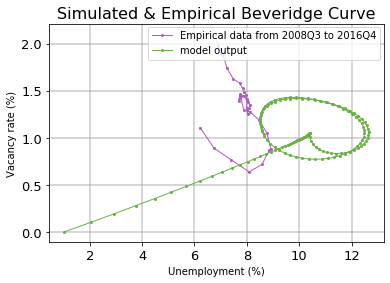

Cost: 0.004074338251905624 Union area: 3.86621658935666 Intersection_area: 0.01575227414016794
Simulation took:  0:02:53.985300
a: 0.033593 delta_u: 0.010262 delta_nu: 0.0 gamma_u: 0.097074 timestep: 10.057967 fitness: 0.004074338251905624
Simulation started at:  2020-05-16 12:00:38.965612


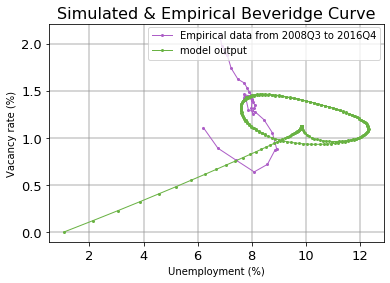

Cost: 0.05097606886730998 Union area: 3.424649978835685 Intersection_area: 0.17457519316755954
Simulation took:  0:05:29.861263
a: 0.030397 delta_u: 0.010675 delta_nu: 0.0 gamma_u: 0.109222 timestep: 5.362685 fitness: 0.05097606886730998
Simulation started at:  2020-05-16 12:01:19.789021


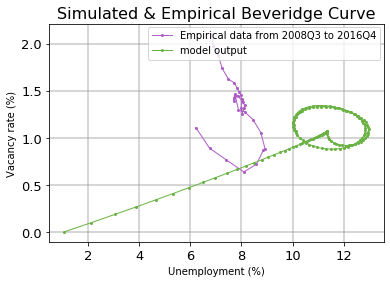

Cost: 0.0 Union area: 2.874968494049509 Intersection_area: 0.0
Simulation took:  0:02:43.096292
a: 0.025063 delta_u: 0.010553 delta_nu: 0.0 gamma_u: 0.08969 timestep: 10.374089 fitness: 1
Simulation started at:  2020-05-16 12:03:22.122956


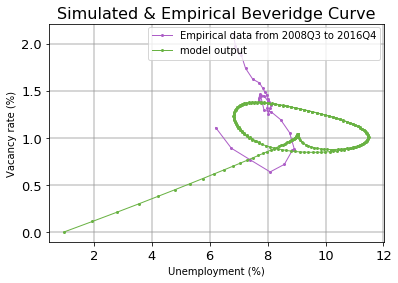

Simulation took:  0:05:36.603499
Cost: 0.22188508134049864 Union area: 2.9151834869690103 Intersection_area: 0.6468357251285973
a: 0.029771 delta_u: 0.009832 delta_nu: 0.0 gamma_u: 0.110718 timestep: 5.403924 fitness: 0.22188508134049864
Simulation started at:  2020-05-16 12:06:56.458504


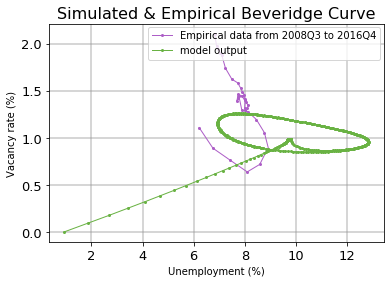

Cost: 0.1633840289533684 Union area: 2.963137557220763 Intersection_area: 0.4841293524417704
Simulation took:  0:10:43.830127
a: 0.035188 delta_u: 0.00939 delta_nu: 0.0 gamma_u: 0.096722 timestep: 2.818382 fitness: 0.1633840289533684
Simulation started at:  2020-05-16 12:08:57.380850


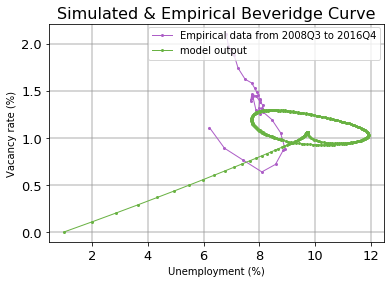

Cost: 0.061475117375426325 Union area: 2.759802337858507 Intersection_area: 0.1696591726528277
Simulation took:  0:07:56.237432
a: 0.02581 delta_u: 0.010034 delta_nu: 0.0 gamma_u: 0.103929 timestep: 3.949623 fitness: 0.061475117375426325
Simulation started at:  2020-05-16 12:11:18.437058


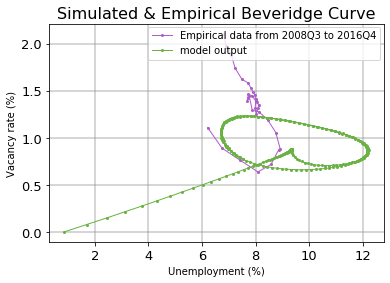

Cost: 0.2673234138831119 Union area: 3.236726269446314 Intersection_area: 0.8652527161535379
Simulation took:  0:05:44.277374
a: 0.036832 delta_u: 0.008502 delta_nu: 0.0 gamma_u: 0.090417 timestep: 5.542941 fitness: 0.2673234138831119
Simulation started at:  2020-05-16 12:12:40.811847


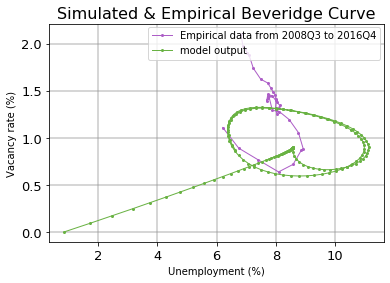

Cost: 0.36344172087275306 Union area: 3.2244419795085535 Intersection_area: 1.171896741886935
Simulation took:  0:03:16.746727
a: 0.036248 delta_u: 0.008686 delta_nu: 0.0 gamma_u: 0.102472 timestep: 9.444215 fitness: 0.36344172087275306
Simulation started at:  2020-05-16 12:15:57.678438


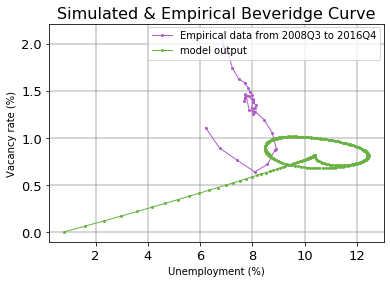

Cost: 0.018136526232474453 Union area: 2.8062854275414697 Intersection_area: 0.05089626927241665
Simulation took:  0:06:14.564845
a: 0.027151 delta_u: 0.007995 delta_nu: 0.0 gamma_u: 0.074344 timestep: 5.052399 fitness: 0.018136526232474453
Simulation started at:  2020-05-16 12:17:33.137558


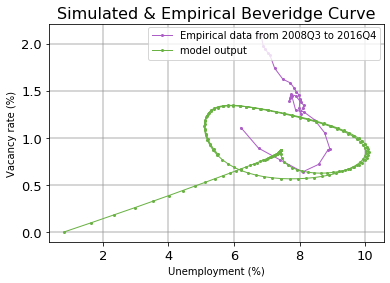

Cost: 0.3331004837970951 Union area: 3.454250937108652 Intersection_area: 1.1506126583074612
Simulation took:  0:03:56.100514
a: 0.0354 delta_u: 0.008242 delta_nu: 0.0 gamma_u: 0.115356 timestep: 8.477872 fitness: 0.3331004837970951
Simulation started at:  2020-05-16 12:21:29.334949


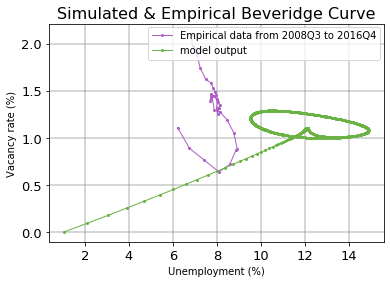

Cost: 0.0 Union area: 2.938458191955889 Intersection_area: 0.0
Simulation took:  0:13:31.844043
a: 0.032359 delta_u: 0.010608 delta_nu: 0.0 gamma_u: 0.084775 timestep: 2.358533 fitness: 1
Simulation started at:  2020-05-16 12:22:29.347095


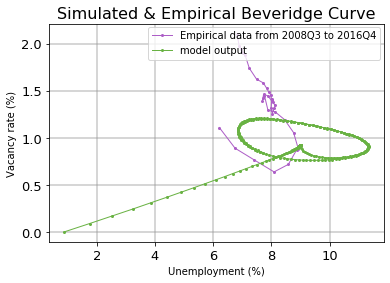

Cost: 0.24591590353077902 Union area: 2.616241562969061 Intersection_area: 0.6433754078123142
Simulation took:  0:06:37.697575
a: 0.028524 delta_u: 0.008844 delta_nu: 0.0 gamma_u: 0.099116 timestep: 4.912955 fitness: 0.24591590353077902
Simulation started at:  2020-05-16 12:22:35.455315


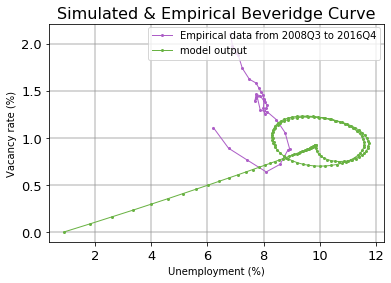

Cost: 0.04156119930915846 Union area: 3.083008512283775 Intersection_area: 0.12813353125085808
Simulation took:  0:02:56.130919
a: 0.028743 delta_u: 0.009095 delta_nu: 0.0 gamma_u: 0.090697 timestep: 10.381653 fitness: 0.04156119930915846
Simulation started at:  2020-05-16 12:24:25.610427


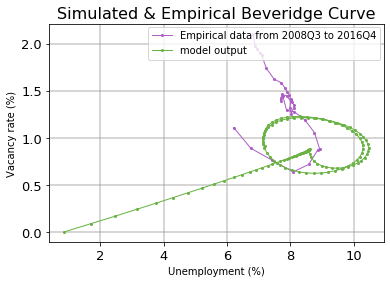

Cost: 0.2870166009216407 Union area: 2.598206519685107 Intersection_area: 0.7457284037724655
Simulation took:  0:02:25.562733
a: 0.028847 delta_u: 0.008628 delta_nu: 0.0 gamma_u: 0.100598 timestep: 12.282246 fitness: 0.2870166009216407
Simulation started at:  2020-05-16 12:24:54.933818


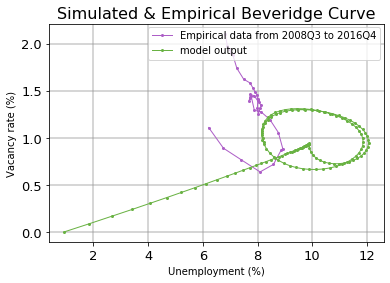

Cost: 0.05529060045842336 Union area: 3.5317351871227003 Intersection_area: 0.19527175915615627
Simulation took:  0:02:25.495526
a: 0.033907 delta_u: 0.009278 delta_nu: 0.0 gamma_u: 0.092037 timestep: 11.161022 fitness: 0.05529060045842336


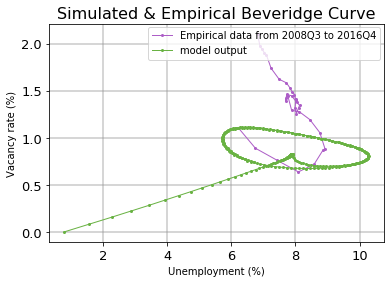

Cost: 0.2778822391498372 Union area: 2.518611325968174 Intersection_area: 0.6998773548081767
Simulation took:  0:06:12.739230
a: 0.028206 delta_u: 0.007878 delta_nu: 0.0 gamma_u: 0.102393 timestep: 4.467995 fitness: 0.2778822391498372
Simulation started at:  2020-05-16 12:28:48.251787


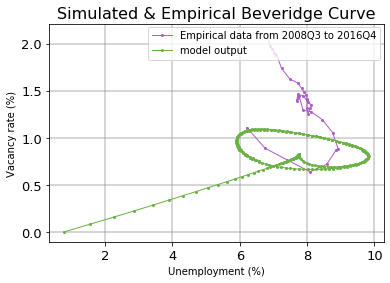

Cost: 0.2796035809033348 Union area: 2.3771746834372975 Intersection_area: 0.6646665539218197
Simulation took:  0:04:46.326910
a: 0.025206 delta_u: 0.007839 delta_nu: 0.0 gamma_u: 0.10355 timestep: 5.544996 fitness: 0.2796035809033348
Simulation started at:  2020-05-16 12:29:11.983104


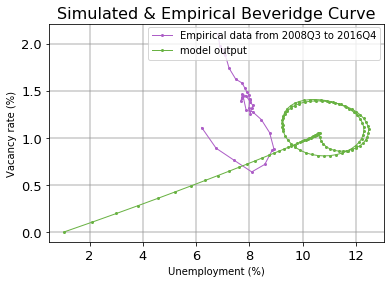

Cost: 0.0 Union area: 3.29380924996212 Intersection_area: 0.0
Simulation took:  0:02:08.642106
a: 0.029378 delta_u: 0.010466 delta_nu: 0.0 gamma_u: 0.095901 timestep: 12.454961 fitness: 1
Simulation started at:  2020-05-16 12:31:20.672070


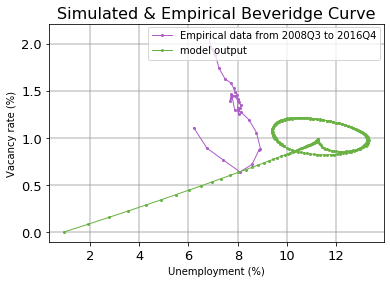

Cost: 0.0 Union area: 3.008361145970321 Intersection_area: 0.0
Simulation took:  0:04:02.833993
a: 0.027552 delta_u: 0.009574 delta_nu: 0.0 gamma_u: 0.081802 timestep: 5.962287 fitness: 1
Simulation started at:  2020-05-16 12:32:51.157122


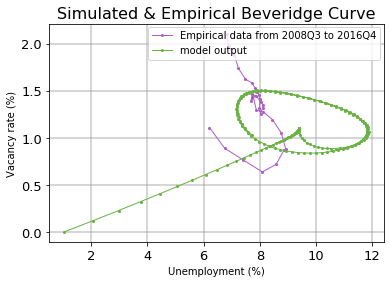

Cost: 0.1462882999474385 Union area: 3.5653365663284826 Intersection_area: 0.5215670250286315
Simulation took:  0:02:41.059657
a: 0.032476 delta_u: 0.010436 delta_nu: 0.0 gamma_u: 0.112766 timestep: 7.601048 fitness: 0.1462882999474385
Simulation started at:  2020-05-16 12:34:01.806886


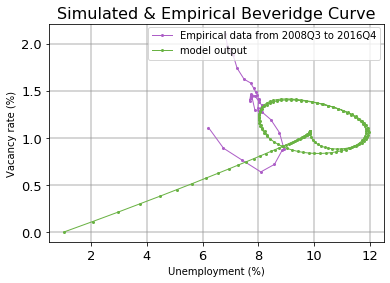

Cost: 0.03978822758416337 Union area: 3.399525141269424 Intersection_area: 0.135261079998913
Simulation took:  0:02:17.246200
a: 0.029051 delta_u: 0.010309 delta_nu: 0.0 gamma_u: 0.10445 timestep: 8.697199 fitness: 0.03978822758416337


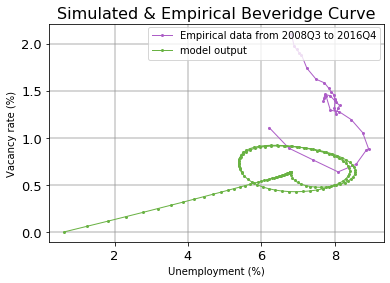

Cost: 0.056835029012077966 Union area: 2.855677365434314 Intersection_area: 0.1623025059135936
Simulation took:  0:01:38.583479
a: 0.02621 delta_u: 0.006256 delta_nu: 0.0 gamma_u: 0.093485 timestep: 10.551887 fitness: 0.056835029012077966


In [146]:

#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, typecode='b', fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# CALIBRATING EARLY TS
# a: 0.02817 delta_u: 0.01172 delta_nu: 0.0034 gamma_u: 0.11443 timestep: 13.22888 
# a: 0.02769 delta_u: 0.00995 delta_nu: 0.00292 gamma_u: 0.10259 timestep: 12.70966 fitness: 0.31854718284205275

# CALIBRATING LATE TS
# a: 0.02751 delta_u: 0.01435 delta_nu: 0.00664 gamma_u: 0.12844 timestep: 12.93995 

# CALIBRATING FULL TS
# THIS IS WHAT CURRENT MODEL EXECUTION IS BASED ON
# a = 0.026
# delta_u = 0.011
# delta_nu = 0.00042
# gamma_u = 0.174
# gamma_nu = gamma_u
# timestep = 16.6

# a = 0.03
# delta_u = 0.011
# delta_nu = 0.004
# gamma_u = 0.12
# gamma_nu = gamma_u
# timestep = 14

# a: 0.02749 delta_u: 0.01079 delta_nu: 0.0004 gamma_u: 0.15314 timestep: 13.15804 fitness: 0.45688536024529336
func_seq = [lambda: round(abs(random.normalvariate(0.03, 0.005)),6), 
            lambda: round(abs(random.normalvariate(0.009, 0.001)), 6), 
            lambda: round(abs(random.normalvariate(0, 0)),6), 
            lambda: round(abs(random.normalvariate(0.1, 0.01)), 6),
            lambda: round(abs(random.normalvariate(8, 3)),6)]


# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual, func_seq, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxUniform, indpb = 0.5)
toolbox.register("mutate", tools.mutGaussian, mu = 0.01, sigma = 0.01, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=15)

import multiprocessing


def main():
    random.seed(64)

    results = []

    pool = multiprocessing.Pool()
    toolbox.register("map", pool.map)

    
    pop = toolbox.population(n=120)
    hof = tools.HallOfFame(20)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu = 40, lambda_ = 30, cxpb=0.49, mutpb=0.01, ngen=3, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    return pop, log, hof

if __name__ == "__main__":
    pop, log, hof = main()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


Simulation started at:  2020-05-16 01:55:28.685483
Simulation started at:  2020-05-16 01:55:28.676134
Simulation started at:  2020-05-16 01:55:28.675987
Simulation started at:  2020-05-16 01:55:28.687857


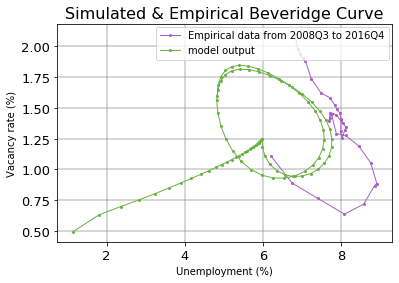

Cost: 0.22566945621992957 Union area: 3.009534666126144 Intersection_area: 0.6791600515797142
Simulation took:  0:01:30.891652
a: 0.029447 delta_u: 0.011294 delta_nu: 0.004893 gamma_u: 0.125065 timestep: 16.737062 fitness: 0.22566945621992957
Simulation started at:  2020-05-16 01:56:59.595285


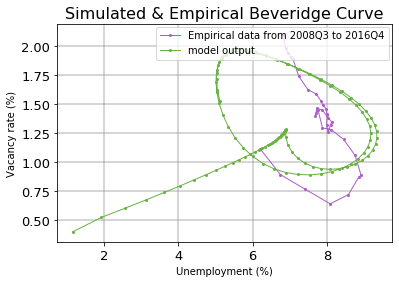

Cost: 0.41024414769832096 Union area: 3.5117334939415925 Intersection_area: 1.4406681141657154
Simulation took:  0:02:04.322075
a: 0.036107 delta_u: 0.011533 delta_nu: 0.003922 gamma_u: 0.124979 timestep: 12.268124 fitness: 0.41024414769832096
Simulation started at:  2020-05-16 01:57:33.042859


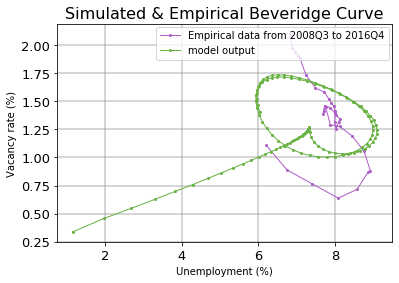

Cost: 0.43504593581890355 Union area: 2.404389188574188 Intersection_area: 1.0460197446161117
Simulation took:  0:02:07.194043
a: 0.025631 delta_u: 0.011599 delta_nu: 0.003337 gamma_u: 0.124943 timestep: 12.097119 fitness: 0.43504593581890355
Simulation started at:  2020-05-16 01:57:35.916920


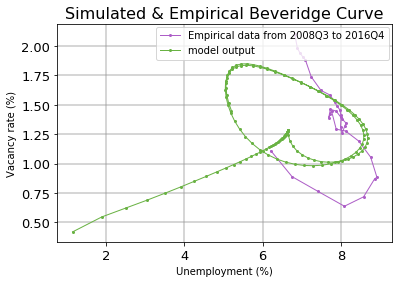

Cost: 0.3900490590983821 Union area: 2.803914357254433 Intersection_area: 1.0936641568395364
Simulation took:  0:02:23.551179
a: 0.028791 delta_u: 0.011405 delta_nu: 0.004158 gamma_u: 0.124877 timestep: 10.70349 fitness: 0.3900490590983821
Simulation started at:  2020-05-16 01:57:52.266083


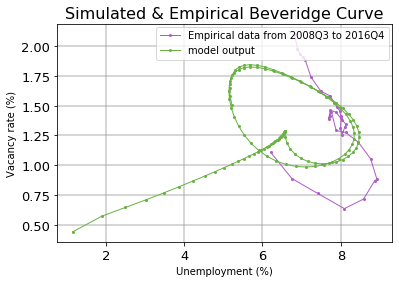

Cost: 0.38707722099665115 Union area: 2.7026190148115394 Intersection_area: 1.046122257665958
Simulation took:  0:02:00.719545
a: 0.028155 delta_u: 0.01152 delta_nu: 0.004384 gamma_u: 0.124809 timestep: 12.39876 fitness: 0.38707722099665115
Simulation started at:  2020-05-16 01:59:00.356821


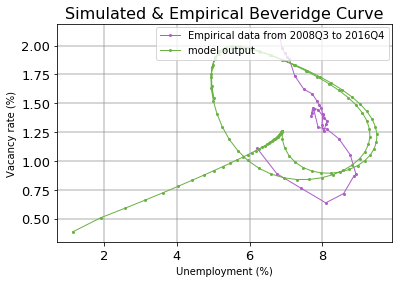

Cost: 0.40842046362469897 Union area: 3.809766852823784 Intersection_area: 1.5559867443323
Simulation took:  0:01:57.759938
a: 0.038752 delta_u: 0.011456 delta_nu: 0.003817 gamma_u: 0.124932 timestep: 12.706401 fitness: 0.40842046362469897
Simulation started at:  2020-05-16 01:59:33.703431


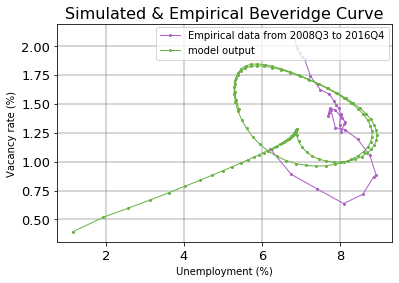

Cost: 0.4297870086785927 Union area: 2.797626088626469 Intersection_area: 1.2023833480319617
Simulation took:  0:02:08.748151
a: 0.029773 delta_u: 0.011491 delta_nu: 0.003895 gamma_u: 0.124828 timestep: 11.7889 fitness: 0.4297870086785927
Simulation started at:  2020-05-16 01:59:41.820356


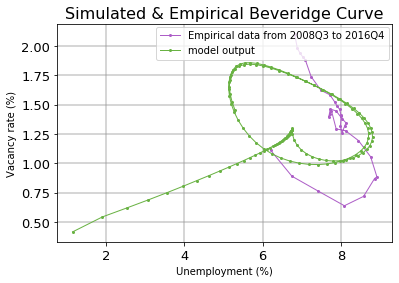

Cost: 0.3993187893747176 Union area: 2.8070469787240344 Intersection_area: 1.1209066012620401
Simulation took:  0:02:16.876989
a: 0.029006 delta_u: 0.011504 delta_nu: 0.004111 gamma_u: 0.12495 timestep: 10.772278 fitness: 0.3993187893747176
Simulation started at:  2020-05-16 02:00:09.178171


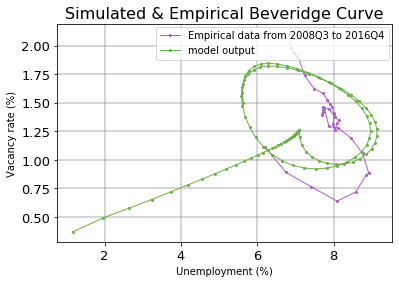

Cost: 0.47297711225721917 Union area: 2.7990810051489032 Intersection_area: 1.3239012507893626
Simulation took:  0:01:40.217087
a: 0.031404 delta_u: 0.011608 delta_nu: 0.003645 gamma_u: 0.125115 timestep: 14.107383 fitness: 0.47297711225721917
Simulation started at:  2020-05-16 02:01:13.943989


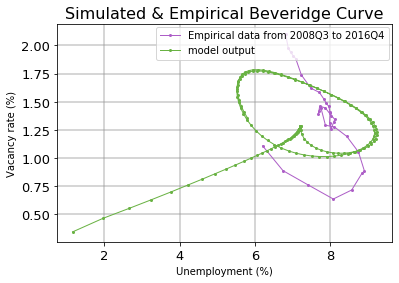

Cost: 0.39560697774097014 Union area: 2.6671063089828966 Intersection_area: 1.0551258662105978
Simulation took:  0:02:37.958580
a: 0.027396 delta_u: 0.011497 delta_nu: 0.003425 gamma_u: 0.125075 timestep: 9.106141 fitness: 0.39560697774097014
Simulation started at:  2020-05-16 02:01:38.369387


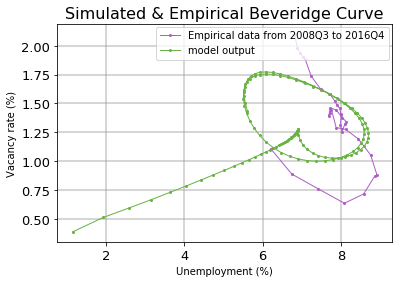

Cost: 0.4275356623197086 Union area: 2.4633437666163838 Intersection_area: 1.0531673087814613
Simulation took:  0:01:59.847836
a: 0.026156 delta_u: 0.011512 delta_nu: 0.003862 gamma_u: 0.125071 timestep: 11.847257 fitness: 0.4275356623197086
Simulation started at:  2020-05-16 02:02:09.071175


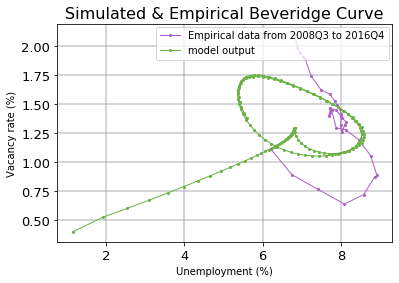

Cost: 0.36017304405799583 Union area: 2.4281295172411963 Intersection_area: 0.8745467995918336
Simulation took:  0:02:35.355697
a: 0.023984 delta_u: 0.011419 delta_nu: 0.003938 gamma_u: 0.125033 timestep: 9.211994 fitness: 0.36017304405799583
Simulation started at:  2020-05-16 02:02:17.210081


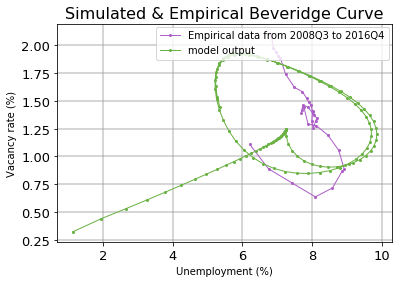

Cost: 0.42339645141474447 Union area: 3.6659678665567297 Intersection_area: 1.5521577857006008
Simulation took:  0:02:03.353718
a: 0.037489 delta_u: 0.011374 delta_nu: 0.003191 gamma_u: 0.125016 timestep: 11.664548 fitness: 0.42339645141474447
Simulation started at:  2020-05-16 02:03:17.350037


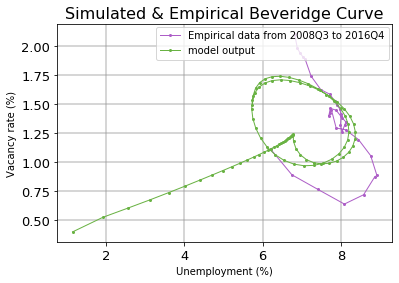

Cost: 0.46057773151683157 Union area: 2.250668944310792 Intersection_area: 1.0366079967660466
Simulation took:  0:01:26.855838
a: 0.025796 delta_u: 0.011512 delta_nu: 0.003944 gamma_u: 0.125059 timestep: 17.119734 fitness: 0.46057773151683157
Simulation started at:  2020-05-16 02:03:36.052646


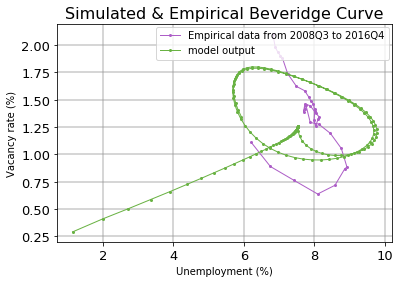

Cost: 0.4129179727575095 Union area: 2.959957639557557 Intersection_area: 1.2222197079742094
Simulation took:  0:02:27.032480
a: 0.030778 delta_u: 0.011445 delta_nu: 0.00288 gamma_u: 0.12496 timestep: 10.039949 fitness: 0.4129179727575095
Simulation started at:  2020-05-16 02:04:05.449645


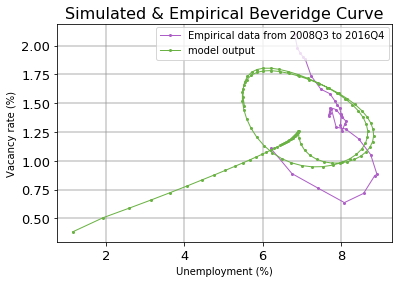

Cost: 0.462441027041639 Union area: 2.6147058787752586 Intersection_area: 1.2091472719926417
Simulation took:  0:01:48.425127
a: 0.02901 delta_u: 0.011483 delta_nu: 0.003795 gamma_u: 0.124919 timestep: 13.634424 fitness: 0.462441027041639
Simulation started at:  2020-05-16 02:04:05.696920


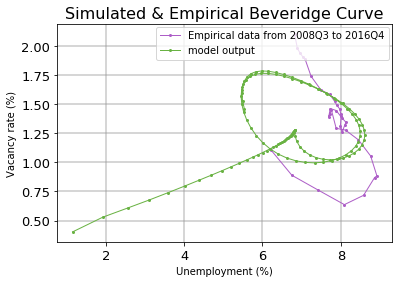

Cost: 0.4249118945711699 Union area: 2.4815981342354765 Intersection_area: 1.0544605647822767
Simulation took:  0:01:54.549538
a: 0.026454 delta_u: 0.011522 delta_nu: 0.004001 gamma_u: 0.124976 timestep: 12.439943 fitness: 0.4249118945711699
Simulation started at:  2020-05-16 02:05:30.630138


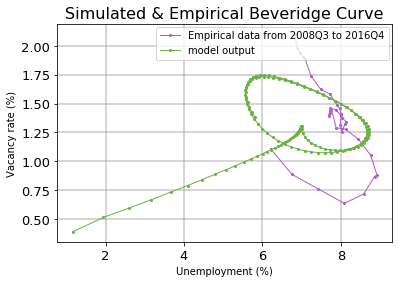

Cost: 0.3621186235350051 Union area: 2.368275593625978 Intersection_area: 0.8575966981153862
Simulation took:  0:02:44.732368
a: 0.023334 delta_u: 0.011585 delta_nu: 0.003872 gamma_u: 0.124961 timestep: 9.107855 fitness: 0.3621186235350051
Simulation started at:  2020-05-16 02:06:02.144624


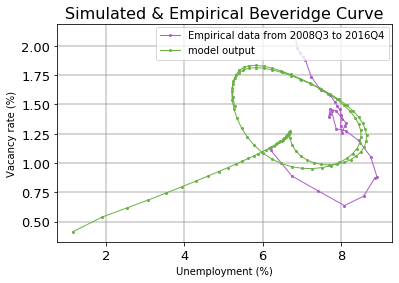

Cost: 0.4248029338778859 Union area: 2.731307114233266 Intersection_area: 1.1602672754478336
Simulation took:  0:01:56.872185
a: 0.029292 delta_u: 0.011435 delta_nu: 0.004093 gamma_u: 0.1249 timestep: 12.727953 fitness: 0.4248029338778859
Simulation started at:  2020-05-16 02:06:02.394546


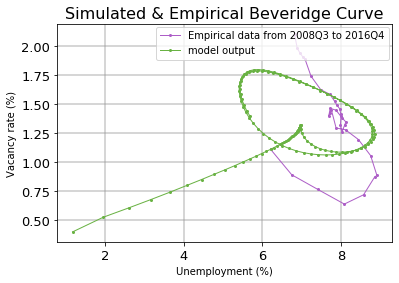

Cost: 0.3667853774488236 Union area: 2.540115432332529 Intersection_area: 0.9316771976116685
Simulation took:  0:02:48.098971
a: 0.025376 delta_u: 0.011621 delta_nu: 0.003945 gamma_u: 0.125096 timestep: 8.98155 fitness: 0.3667853774488236
Simulation started at:  2020-05-16 02:06:53.846289


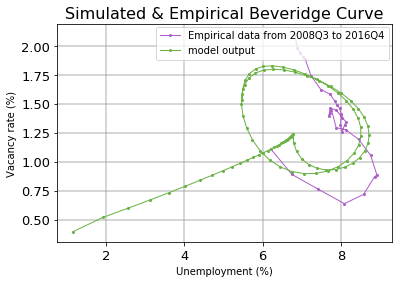

Cost: 0.4792627419725574 Union area: 2.681082284314033 Intersection_area: 1.2849428470343913
Simulation took:  0:01:34.230927
a: 0.031241 delta_u: 0.011467 delta_nu: 0.003902 gamma_u: 0.125004 timestep: 16.213421 fitness: 0.4792627419725574
Simulation started at:  2020-05-16 02:07:04.890143


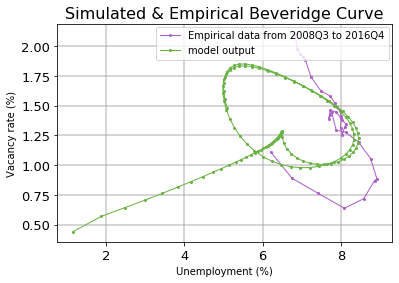

Cost: 0.36644422590472314 Union area: 2.802531108432622 Intersection_area: 1.0269713426034979
Simulation took:  0:02:05.199690
a: 0.028472 delta_u: 0.011393 delta_nu: 0.004354 gamma_u: 0.125149 timestep: 11.722227 fitness: 0.36644422590472314
Simulation started at:  2020-05-16 02:08:07.695325


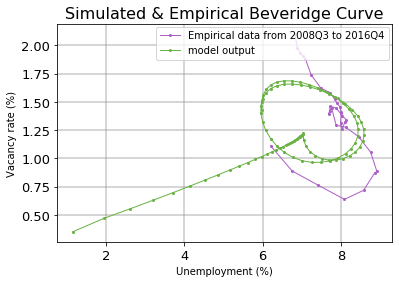

Cost: 0.49291585447683883 Union area: 2.1470503850845484 Intersection_area: 1.058315175168776
Simulation took:  0:01:31.232665
a: 0.024656 delta_u: 0.011395 delta_nu: 0.003459 gamma_u: 0.124926 timestep: 16.001844 fitness: 0.49291585447683883
Simulation started at:  2020-05-16 02:08:36.151440


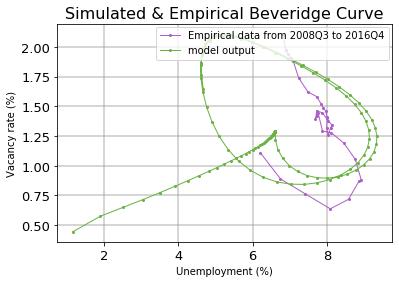

Cost: 0.3641161751847414 Union area: 4.210247341593823 Intersection_area: 1.5330191586028683
Simulation took:  0:01:51.909172
a: 0.04088 delta_u: 0.011588 delta_nu: 0.004396 gamma_u: 0.125024 timestep: 12.798147 fitness: 0.3641161751847414
Simulation started at:  2020-05-16 02:08:45.797407


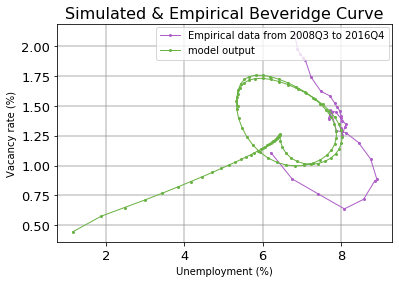

Cost: 0.3315506752460422 Union area: 2.448504164334467 Intersection_area: 0.8118032090278389
Simulation took:  0:01:36.312065
a: 0.02491 delta_u: 0.011432 delta_nu: 0.004411 gamma_u: 0.124998 timestep: 14.992751 fitness: 0.3315506752460422
Simulation started at:  2020-05-16 02:09:44.072995


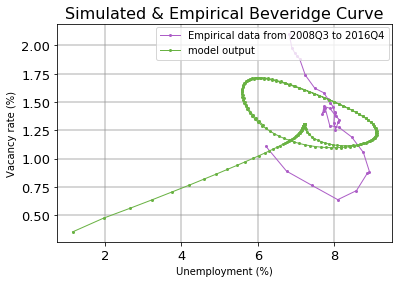

Cost: 0.322836645031797 Union area: 2.4196923831798234 Intersection_area: 0.7811653709947676
Simulation took:  0:03:47.403752
a: 0.023646 delta_u: 0.011508 delta_nu: 0.003494 gamma_u: 0.124867 timestep: 6.446819 fitness: 0.322836645031797
Simulation started at:  2020-05-16 02:09:49.629812


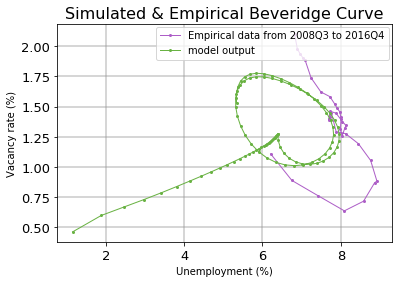

Cost: 0.3116090945656473 Union area: 2.4704413184195118 Intersection_area: 0.769811982410268
Simulation took:  0:01:36.141192
a: 0.024848 delta_u: 0.011541 delta_nu: 0.004596 gamma_u: 0.125248 timestep: 15.563681 fitness: 0.3116090945656473
Simulation started at:  2020-05-16 02:10:12.335885


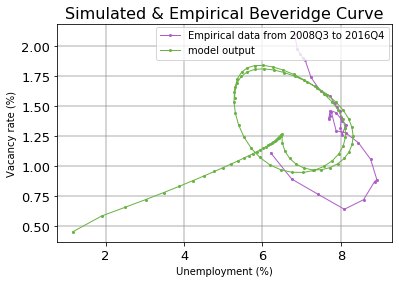

Cost: 0.4022979236065056 Union area: 2.658640556143137 Intersection_area: 1.0695655753524294
Simulation took:  0:01:31.139065
a: 0.029438 delta_u: 0.011562 delta_nu: 0.004449 gamma_u: 0.125056 timestep: 16.621707 fitness: 0.4022979236065056
Simulation started at:  2020-05-16 02:10:16.963649


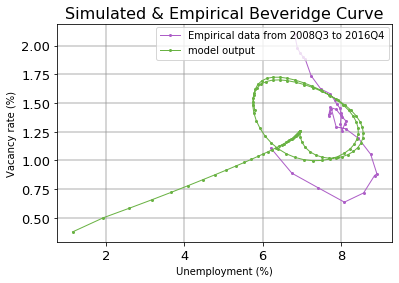

Cost: 0.44786717224569134 Union area: 2.2637376092940165 Intersection_area: 1.0138537617807328
Simulation took:  0:01:46.587466
a: 0.024625 delta_u: 0.011507 delta_nu: 0.003749 gamma_u: 0.125177 timestep: 13.891338 fitness: 0.44786717224569134
Simulation started at:  2020-05-16 02:11:36.244216


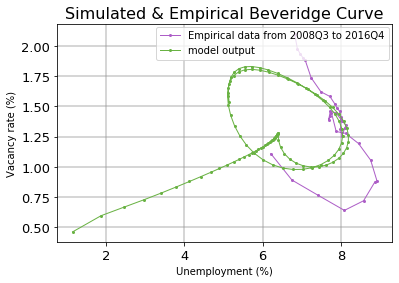

Cost: 0.34506239245726544 Union area: 2.701562110629123 Intersection_area: 0.932207485265585
Simulation took:  0:01:43.398729
a: 0.027809 delta_u: 0.011479 delta_nu: 0.004553 gamma_u: 0.125021 timestep: 14.096146 fitness: 0.34506239245726544
Simulation started at:  2020-05-16 02:12:00.391347


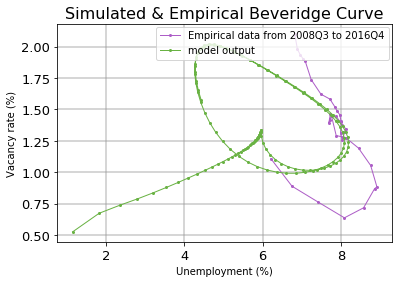

Cost: 0.25982288169208617 Union area: 3.4045667194563185 Intersection_area: 0.8845843359621129
Simulation took:  0:02:23.526164
a: 0.03142 delta_u: 0.011421 delta_nu: 0.005218 gamma_u: 0.124941 timestep: 10.337378 fitness: 0.25982288169208617
Simulation started at:  2020-05-16 02:12:07.626379


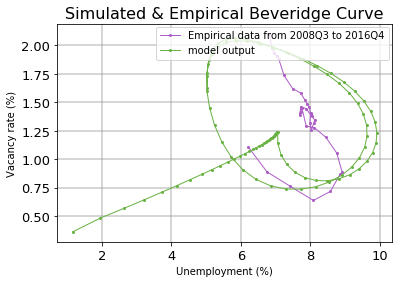

Cost: 0.38764976245660565 Union area: 4.547222926947951 Intersection_area: 1.7627298874686042
Simulation took:  0:01:41.927276
a: 0.044964 delta_u: 0.011493 delta_nu: 0.003578 gamma_u: 0.124799 timestep: 14.963732 fitness: 0.38764976245660565
Simulation started at:  2020-05-16 02:13:18.227870


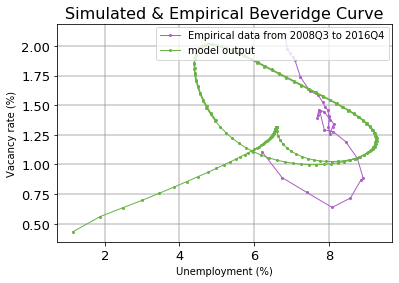

Cost: 0.32025190587930125 Union area: 3.554345211812906 Intersection_area: 1.1382858282360517
Simulation took:  0:03:30.450676
a: 0.034132 delta_u: 0.011397 delta_nu: 0.004276 gamma_u: 0.125048 timestep: 7.063748 fitness: 0.32025190587930125
Simulation started at:  2020-05-16 02:13:42.841751


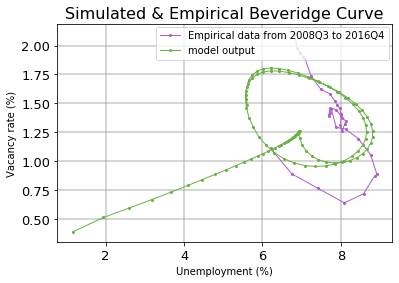

Cost: 0.46640910011109216 Union area: 2.566113435244131 Intersection_area: 1.1968586581151985
Simulation took:  0:01:44.697010
a: 0.028741 delta_u: 0.01157 delta_nu: 0.003827 gamma_u: 0.125196 timestep: 14.203408 fitness: 0.46640910011109216
Simulation started at:  2020-05-16 02:13:52.410835


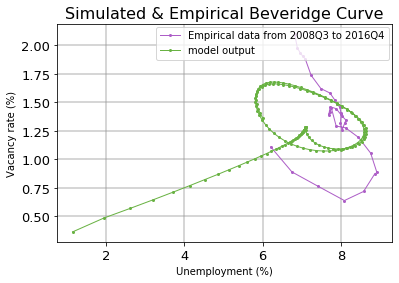

Cost: 0.3698375967918329 Union area: 2.18738555954894 Intersection_area: 0.8089774186007387
Simulation took:  0:02:30.621526
a: 0.021295 delta_u: 0.011493 delta_nu: 0.003588 gamma_u: 0.125116 timestep: 9.870129 fitness: 0.3698375967918329
Simulation started at:  2020-05-16 02:14:31.081728


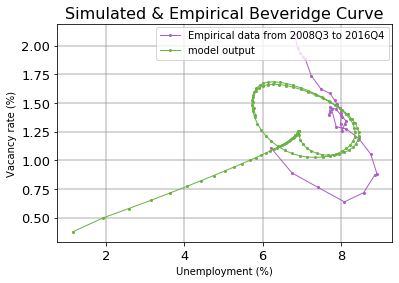

Cost: 0.403351572591133 Union area: 2.199476868814151 Intersection_area: 0.887162453914009
Simulation took:  0:01:55.074332
a: 0.022523 delta_u: 0.011389 delta_nu: 0.003722 gamma_u: 0.124652 timestep: 12.235403 fitness: 0.403351572591133
Simulation started at:  2020-05-16 02:15:13.338209


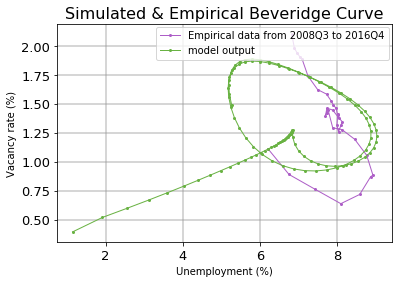

Cost: 0.43389439881812836 Union area: 3.0269418789068983 Intersection_area: 1.3133731268057245
Simulation took:  0:01:52.977634
a: 0.032309 delta_u: 0.01147 delta_nu: 0.003905 gamma_u: 0.125118 timestep: 12.478946 fitness: 0.43389439881812836
Simulation started at:  2020-05-16 02:15:35.848381


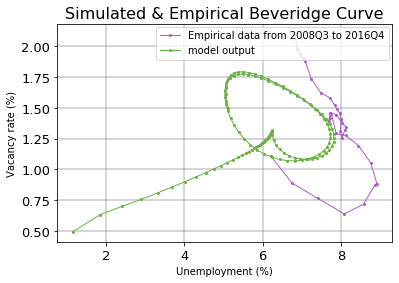

Cost: 0.23684889183445257 Union area: 2.5598895475545467 Intersection_area: 0.6063070025568925
Simulation took:  0:02:00.908867
a: 0.023099 delta_u: 0.011515 delta_nu: 0.004877 gamma_u: 0.125021 timestep: 11.670148 fitness: 0.23684889183445257
Simulation started at:  2020-05-16 02:15:53.359907


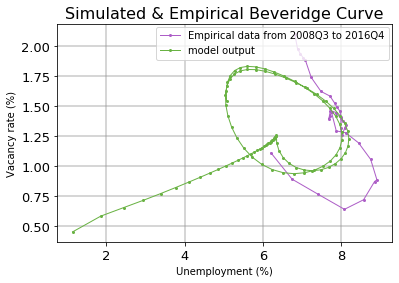

Cost: 0.34718954982008426 Union area: 2.798472093072755 Intersection_area: 0.9716002661779988
Simulation took:  0:01:33.385816
a: 0.029184 delta_u: 0.011347 delta_nu: 0.004454 gamma_u: 0.125086 timestep: 15.085642 fitness: 0.34718954982008426
Simulation started at:  2020-05-16 02:16:04.543988


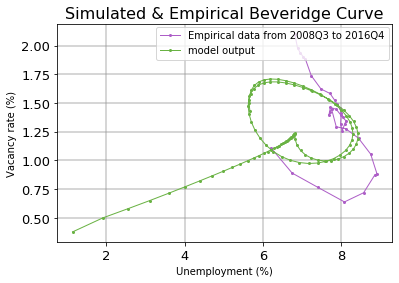

Cost: 0.43972930153336093 Union area: 2.2843861116747206 Intersection_area: 1.0045115093192352
Simulation took:  0:01:38.052198
a: 0.02484 delta_u: 0.011322 delta_nu: 0.003728 gamma_u: 0.125142 timestep: 14.268935 fitness: 0.43972930153336093
Simulation started at:  2020-05-16 02:16:51.426015


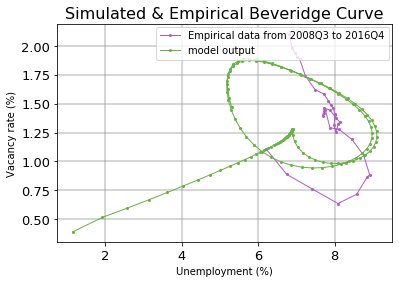

Cost: 0.4204848862448449 Union area: 3.024869706789454 Intersection_area: 1.271911994564841
Simulation took:  0:02:02.147463
a: 0.031721 delta_u: 0.011516 delta_nu: 0.003889 gamma_u: 0.12504 timestep: 11.45683 fitness: 0.4204848862448449
Simulation started at:  2020-05-16 02:17:38.026320


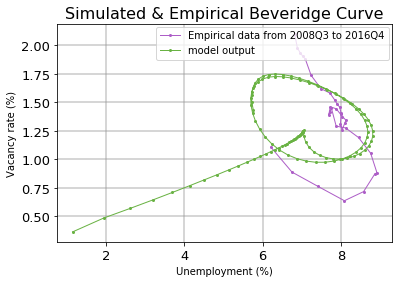

Cost: 0.46482092997622065 Union area: 2.4032525516036833 Intersection_area: 1.1170820860041493
Simulation took:  0:01:45.688102
a: 0.026538 delta_u: 0.011473 delta_nu: 0.003606 gamma_u: 0.124808 timestep: 13.178649 fitness: 0.46482092997622065
Simulation started at:  2020-05-16 02:17:50.259914


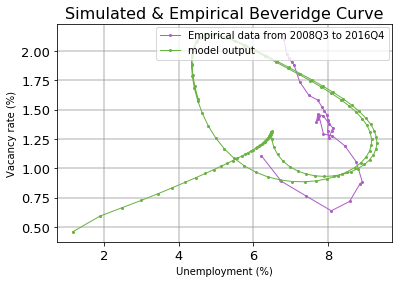

Cost: 0.33853551939782744 Union area: 4.265106652163425 Intersection_area: 1.443890095777274
Simulation took:  0:02:09.798854
a: 0.039928 delta_u: 0.011528 delta_nu: 0.004538 gamma_u: 0.125139 timestep: 10.683608 fitness: 0.33853551939782744
Simulation started at:  2020-05-16 02:18:03.200955


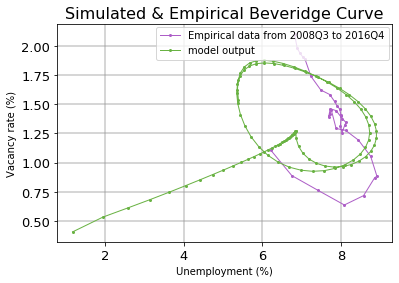

Cost: 0.4481923905452075 Union area: 2.876788333071748 Intersection_area: 1.2893546400919893
Simulation took:  0:01:38.799532
a: 0.03177 delta_u: 0.011614 delta_nu: 0.004034 gamma_u: 0.124958 timestep: 14.141397 fitness: 0.4481923905452075
Simulation started at:  2020-05-16 02:18:30.255620


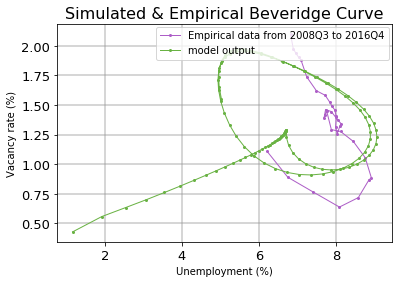

Cost: 0.40074735037333414 Union area: 3.3837663640961533 Intersection_area: 1.356035404693944
Simulation took:  0:01:51.439150
a: 0.03491 delta_u: 0.011576 delta_nu: 0.004238 gamma_u: 0.12503 timestep: 12.631869 fitness: 0.40074735037333414
Simulation started at:  2020-05-16 02:19:54.703104


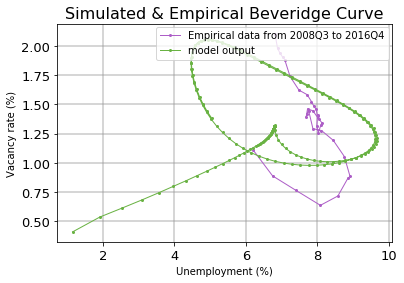

Cost: 0.3192832550104612 Union area: 3.8511500982030635 Intersection_area: 1.2296077388881312
Simulation took:  0:03:13.082552
a: 0.03646 delta_u: 0.011491 delta_nu: 0.004069 gamma_u: 0.125016 timestep: 7.25412 fitness: 0.3192832550104612
Simulation started at:  2020-05-16 02:20:51.186554


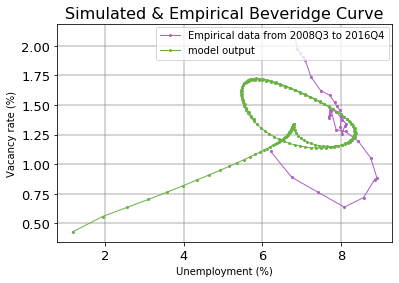

Cost: 0.2844201936411786 Union area: 2.2716624866843573 Intersection_area: 0.6461066843501662
Simulation took:  0:03:02.852565
a: 0.020529 delta_u: 0.011624 delta_nu: 0.004237 gamma_u: 0.125127 timestep: 7.626864 fitness: 0.2844201936411786
Simulation started at:  2020-05-16 02:20:53.139790


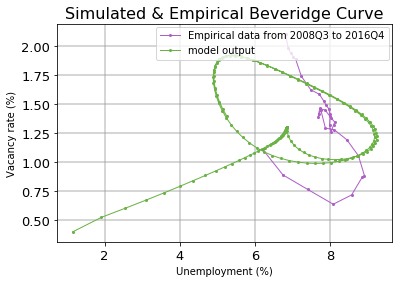

Cost: 0.3662443451513972 Union area: 3.185810039348876 Intersection_area: 1.1667849116380762
Simulation took:  0:02:42.621502
a: 0.031756 delta_u: 0.011469 delta_nu: 0.00396 gamma_u: 0.12487 timestep: 8.496801 fitness: 0.3662443451513972
Simulation started at:  2020-05-16 02:21:12.913527


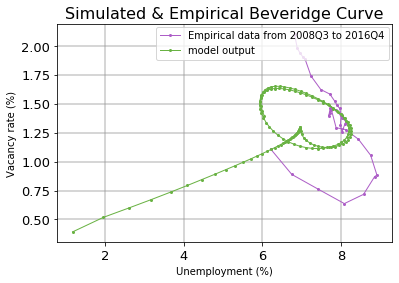

Cost: 0.32042827885941705 Union area: 2.0479886746556093 Intersection_area: 0.6562334861434755
Simulation took:  0:02:06.486510
a: 0.018399 delta_u: 0.0116 delta_nu: 0.003896 gamma_u: 0.1251 timestep: 11.002811 fitness: 0.32042827885941705
Simulation started at:  2020-05-16 02:22:01.238874


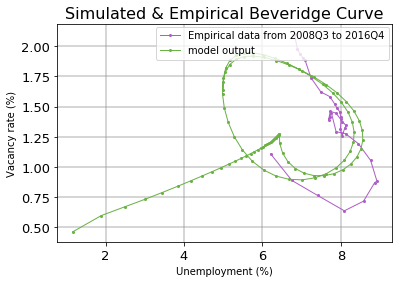

Cost: 0.39309493094841386 Union area: 3.164430986929568 Intersection_area: 1.2439217802980997
Simulation took:  0:01:27.697460
a: 0.03428 delta_u: 0.011592 delta_nu: 0.004593 gamma_u: 0.125069 timestep: 16.034436 fitness: 0.39309493094841386
Simulation started at:  2020-05-16 02:22:20.866027


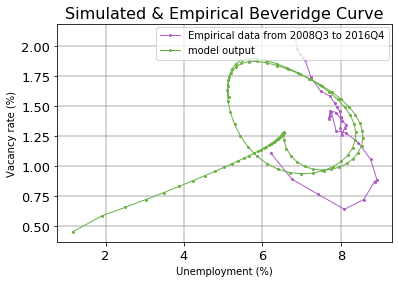

Cost: 0.4067054560313546 Union area: 2.9158594163542118 Intersection_area: 1.1858959336516592
Simulation took:  0:01:35.369868
a: 0.031505 delta_u: 0.011582 delta_nu: 0.004449 gamma_u: 0.124994 timestep: 14.680317 fitness: 0.4067054560313546
Simulation started at:  2020-05-16 02:22:26.590403


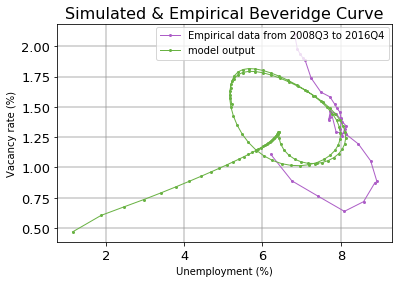

Cost: 0.32735004236817267 Union area: 2.592751559806717 Intersection_area: 0.8487373329528746
Simulation took:  0:01:42.780979
a: 0.02601 delta_u: 0.011549 delta_nu: 0.004642 gamma_u: 0.124783 timestep: 13.47114 fitness: 0.32735004236817267
Simulation started at:  2020-05-16 02:22:55.726505


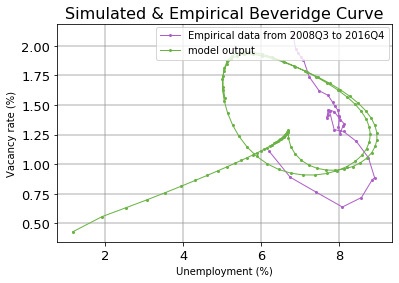

Cost: 0.4105922966593734 Union area: 3.2709752325844366 Intersection_area: 1.343037233062772
Simulation took:  0:01:46.613616
a: 0.034365 delta_u: 0.011566 delta_nu: 0.004231 gamma_u: 0.124957 timestep: 13.280333 fitness: 0.4105922966593734
Simulation started at:  2020-05-16 02:24:13.235234


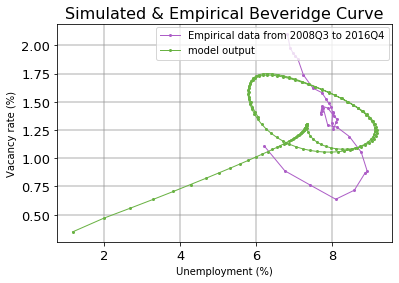

Cost: 0.3765232861332924 Union area: 2.4702465824841235 Intersection_area: 0.9301053607964573
Simulation took:  0:02:33.410769
a: 0.024878 delta_u: 0.011646 delta_nu: 0.003447 gamma_u: 0.124851 timestep: 9.081864 fitness: 0.3765232861332924
Simulation started at:  2020-05-16 02:24:34.718783


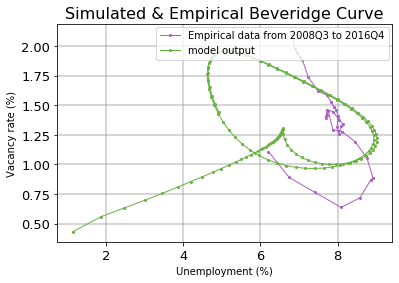

Cost: 0.35968956507656596 Union area: 3.332294309154917 Intersection_area: 1.1985914907670479
Simulation took:  0:02:34.038777
a: 0.032855 delta_u: 0.011387 delta_nu: 0.004264 gamma_u: 0.124879 timestep: 9.098344 fitness: 0.35968956507656596
Simulation started at:  2020-05-16 02:24:54.947646


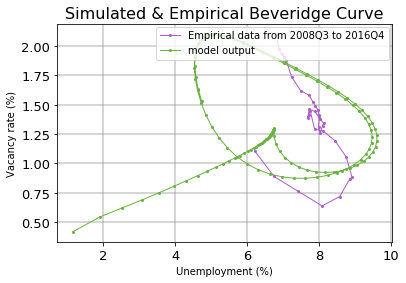

Cost: 0.35277758045509 Union area: 4.262531331444799 Intersection_area: 1.5037254897211094
Simulation took:  0:02:12.853795
a: 0.040193 delta_u: 0.011499 delta_nu: 0.004122 gamma_u: 0.12497 timestep: 10.564317 fitness: 0.35277758045509
Simulation started at:  2020-05-16 02:25:08.621332


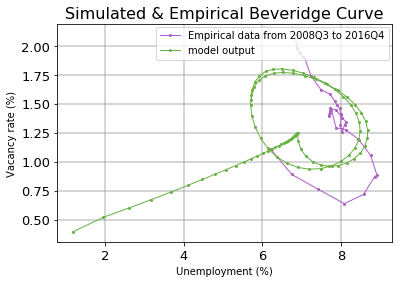

Cost: 0.4918408195796972 Union area: 2.4566890630191036 Intersection_area: 1.2082999622077943
Simulation took:  0:01:20.890535
a: 0.029086 delta_u: 0.011624 delta_nu: 0.003901 gamma_u: 0.124969 timestep: 16.671659 fitness: 0.4918408195796972
Simulation started at:  2020-05-16 02:25:34.148961


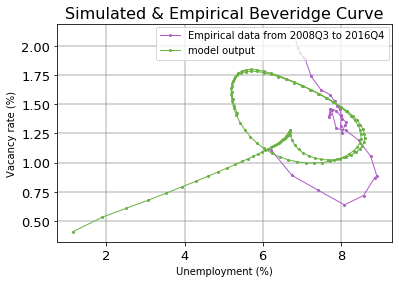

Cost: 0.39176022734155697 Union area: 2.6196748660968474 Intersection_area: 1.0262844211030637
Simulation took:  0:02:08.176912
a: 0.026906 delta_u: 0.011369 delta_nu: 0.004025 gamma_u: 0.125052 timestep: 10.734254 fitness: 0.39176022734155697
Simulation started at:  2020-05-16 02:26:42.936606


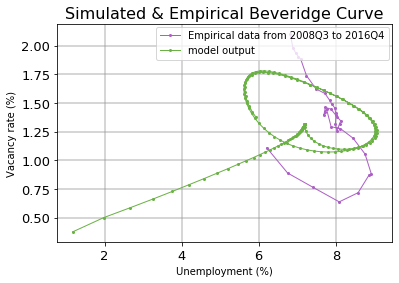

Cost: 0.36133348282079875 Union area: 2.5140321754209767 Intersection_area: 0.9084040018684107
Simulation took:  0:02:39.377190
a: 0.025024 delta_u: 0.011704 delta_nu: 0.003721 gamma_u: 0.124974 timestep: 8.634399 fitness: 0.36133348282079875
Simulation started at:  2020-05-16 02:27:48.032401


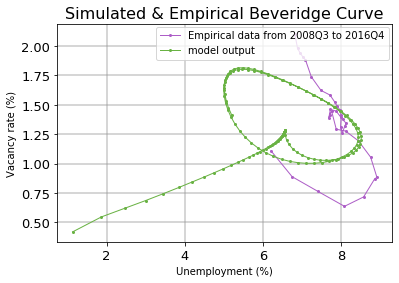

Cost: 0.35794988350262585 Union area: 2.7096805170222176 Intersection_area: 0.9699298253974378
Simulation took:  0:02:19.645379
a: 0.027022 delta_u: 0.011305 delta_nu: 0.004169 gamma_u: 0.125012 timestep: 9.904754 fitness: 0.35794988350262585
Simulation started at:  2020-05-16 02:27:53.844838


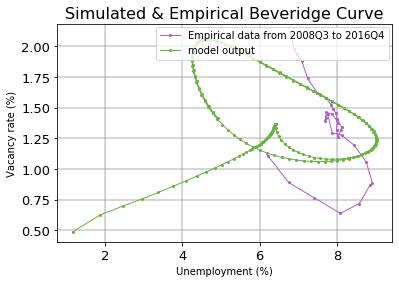

Cost: 0.2808803551903751 Union area: 3.482155878887168 Intersection_area: 0.9780691800900804
Simulation took:  0:03:36.687963
a: 0.032818 delta_u: 0.011601 delta_nu: 0.004823 gamma_u: 0.125131 timestep: 6.410728 fitness: 0.2808803551903751
Simulation started at:  2020-05-16 02:28:31.713889


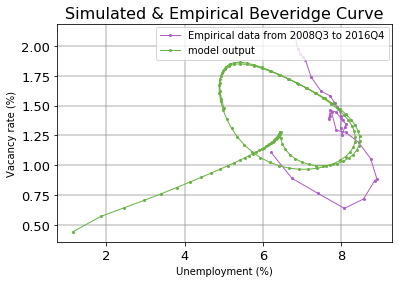

Cost: 0.362867419042166 Union area: 2.89674884013934 Intersection_area: 1.0511357752347503
Simulation took:  0:02:02.037466
a: 0.029326 delta_u: 0.011339 delta_nu: 0.00437 gamma_u: 0.12485 timestep: 11.579017 fitness: 0.362867419042166
Simulation started at:  2020-05-16 02:29:50.120280


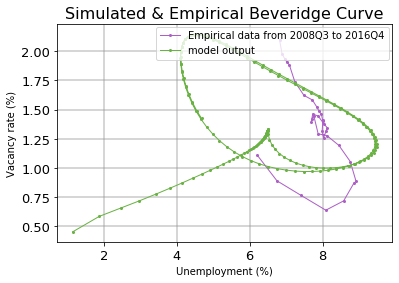

Cost: 0.30253859121342613 Union area: 4.130083513003588 Intersection_area: 1.2495096476179035
Simulation took:  0:03:12.499851
a: 0.03811 delta_u: 0.011441 delta_nu: 0.004477 gamma_u: 0.124941 timestep: 7.255489 fitness: 0.30253859121342613
Simulation started at:  2020-05-16 02:29:55.489263


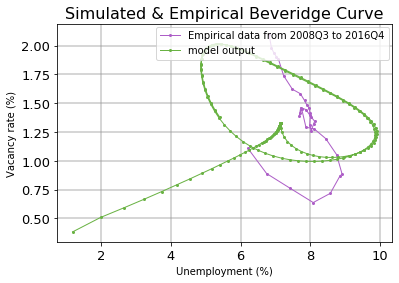

Cost: 0.31813613773330096 Union area: 3.7514638221383687 Intersection_area: 1.1934762112213078
Simulation took:  0:03:05.194487
a: 0.035629 delta_u: 0.011703 delta_nu: 0.00379 gamma_u: 0.125085 timestep: 7.516586 fitness: 0.31813613773330096
Simulation started at:  2020-05-16 02:30:59.100779


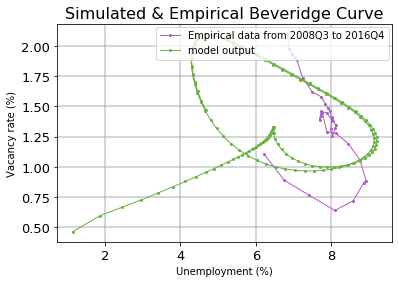

Cost: 0.3226939964431305 Union area: 3.847796323109924 Intersection_area: 1.2416607730035245
Simulation took:  0:02:46.853283
a: 0.036215 delta_u: 0.011481 delta_nu: 0.004562 gamma_u: 0.124946 timestep: 8.444088 fitness: 0.3226939964431305
Simulation started at:  2020-05-16 02:31:18.600823


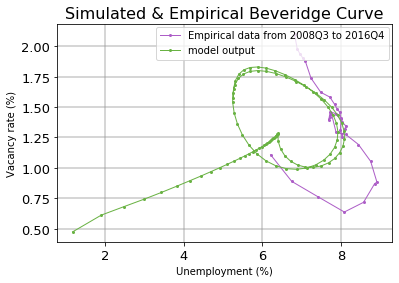

Cost: 0.3435228149474967 Union area: 2.600568666719298 Intersection_area: 0.8933546688556716
Simulation took:  0:01:27.058864
a: 0.027326 delta_u: 0.011629 delta_nu: 0.004703 gamma_u: 0.124875 timestep: 15.940621 fitness: 0.3435228149474967
Simulation started at:  2020-05-16 02:31:22.576892


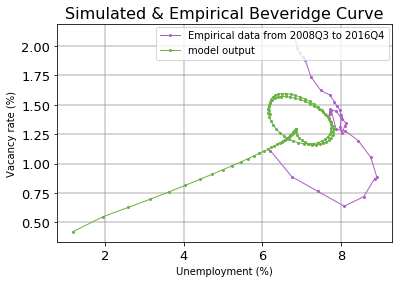

Cost: 0.22962308772704237 Union area: 1.9131433923341157 Intersection_area: 0.43930189301234807
Simulation took:  0:01:45.290945
a: 0.014268 delta_u: 0.011706 delta_nu: 0.004153 gamma_u: 0.125088 timestep: 13.221069 fitness: 0.22962308772704237
Simulation started at:  2020-05-16 02:31:35.440870


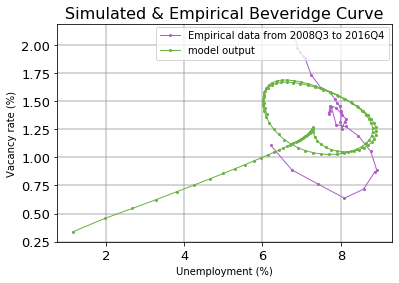

Cost: 0.4258433722211435 Union area: 2.2285160597282623 Intersection_area: 0.9489987939236584
Simulation took:  0:01:58.104110
a: 0.023257 delta_u: 0.011533 delta_nu: 0.00333 gamma_u: 0.124827 timestep: 11.799826 fitness: 0.4258433722211435
Simulation started at:  2020-05-16 02:32:57.245414


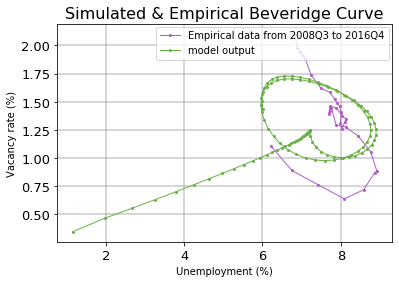

Cost: 0.4750378578599133 Union area: 2.307579012095257 Intersection_area: 1.0961873907482258
Simulation took:  0:01:37.278030
a: 0.025838 delta_u: 0.011552 delta_nu: 0.003407 gamma_u: 0.12503 timestep: 14.296458 fitness: 0.4750378578599133
Simulation started at:  2020-05-16 02:32:59.888178


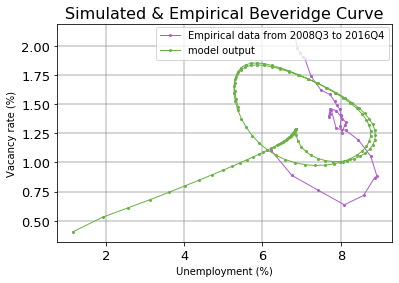

Cost: 0.4196171958554477 Union area: 2.786615228964511 Intersection_area: 1.1693116683061746
Simulation took:  0:01:58.824044
a: 0.029424 delta_u: 0.011557 delta_nu: 0.004015 gamma_u: 0.124992 timestep: 11.667407 fitness: 0.4196171958554477
Simulation started at:  2020-05-16 02:33:17.461802


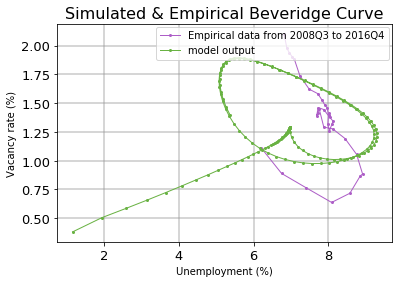

Cost: 0.38650456374086267 Union area: 3.115966804980842 Intersection_area: 1.2043353905901302
Simulation took:  0:02:31.588028
a: 0.031537 delta_u: 0.011489 delta_nu: 0.00378 gamma_u: 0.125079 timestep: 9.34067 fitness: 0.38650456374086267
Simulation started at:  2020-05-16 02:34:07.069111


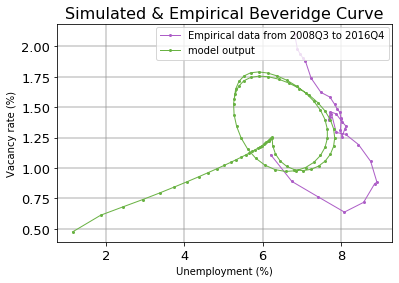

Cost: 0.28450987461120386 Union area: 2.581259595691183 Intersection_area: 0.7343938439090651
Simulation took:  0:01:17.112639
a: 0.026645 delta_u: 0.011501 delta_nu: 0.00471 gamma_u: 0.124903 timestep: 18.024783 fitness: 0.28450987461120386
Simulation started at:  2020-05-16 02:34:34.604099


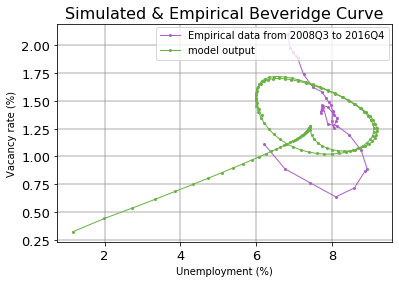

Cost: 0.4127998792870175 Union area: 2.388196514617751 Intersection_area: 0.9858472329478835
Simulation took:  0:02:10.712991
a: 0.024787 delta_u: 0.011569 delta_nu: 0.003191 gamma_u: 0.125054 timestep: 10.841617 fitness: 0.4127998792870175
Simulation started at:  2020-05-16 02:35:10.638220


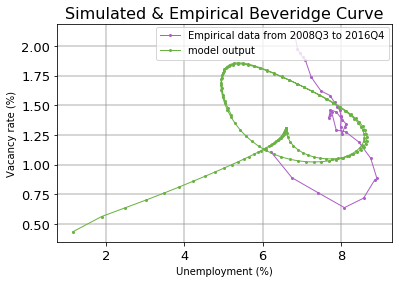

Cost: 0.35166789908761226 Union area: 2.8075063597555125 Intersection_area: 0.9873098632103312
Simulation took:  0:02:34.069263
a: 0.027832 delta_u: 0.011437 delta_nu: 0.004293 gamma_u: 0.124818 timestep: 9.048848 fitness: 0.35166789908761226
Simulation started at:  2020-05-16 02:35:31.353165


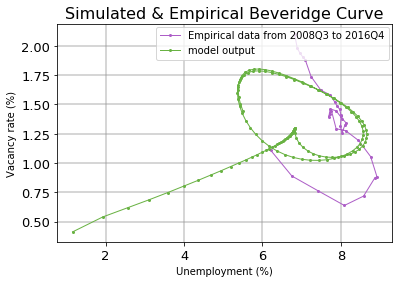

Cost: 0.3963401784059082 Union area: 2.5436390125720627 Intersection_area: 1.0081463400430395
Simulation took:  0:02:06.974937
a: 0.026206 delta_u: 0.011563 delta_nu: 0.004081 gamma_u: 0.124948 timestep: 10.947471 fitness: 0.3963401784059082
Simulation started at:  2020-05-16 02:36:41.616466


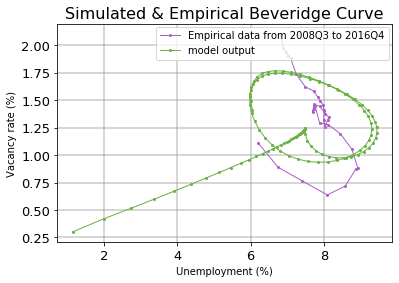

Cost: 0.46453600352299185 Union area: 2.6455561362350974 Intersection_area: 1.22895607462238
Simulation took:  0:01:45.315374
a: 0.029218 delta_u: 0.011531 delta_nu: 0.00298 gamma_u: 0.12519 timestep: 13.169692 fitness: 0.46453600352299185
Simulation started at:  2020-05-16 02:36:55.984343


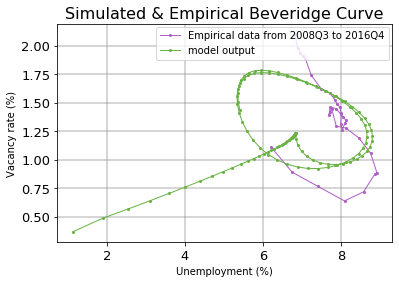

Cost: 0.4634981188770619 Union area: 2.658321189289043 Intersection_area: 1.2321268706065054
Simulation took:  0:01:48.467415
a: 0.029264 delta_u: 0.011232 delta_nu: 0.003622 gamma_u: 0.125087 timestep: 12.875541 fitness: 0.4634981188770619
Simulation started at:  2020-05-16 02:37:19.853528


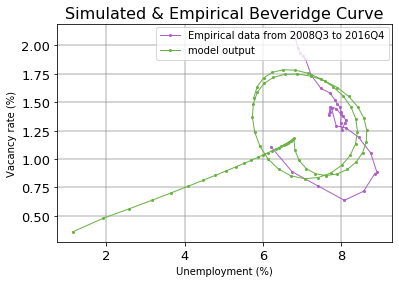

Cost: 0.5393090276846938 Union area: 2.495256357566226 Intersection_area: 1.345714280023092
Simulation took:  0:01:06.429158
a: 0.032395 delta_u: 0.011334 delta_nu: 0.003561 gamma_u: 0.125099 timestep: 20.793266 fitness: 0.5393090276846938
Simulation started at:  2020-05-16 02:38:02.437456


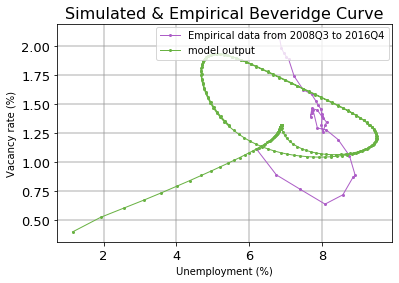

Cost: 0.3093793281337609 Union area: 3.2786204758301336 Intersection_area: 1.0143374000179182
Simulation took:  0:03:55.544821
a: 0.032199 delta_u: 0.01147 delta_nu: 0.003949 gamma_u: 0.124896 timestep: 5.981742 fitness: 0.3093793281337609
Simulation started at:  2020-05-16 02:38:02.660524


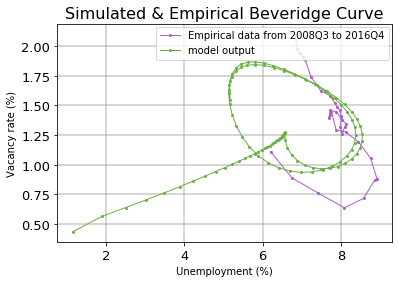

Cost: 0.4128358544205039 Union area: 2.832039627555692 Intersection_area: 1.1691674993946797
Simulation took:  0:01:38.353532
a: 0.0306 delta_u: 0.011494 delta_nu: 0.004312 gamma_u: 0.125045 timestep: 14.274989 fitness: 0.4128358544205039
Simulation started at:  2020-05-16 02:38:19.998262


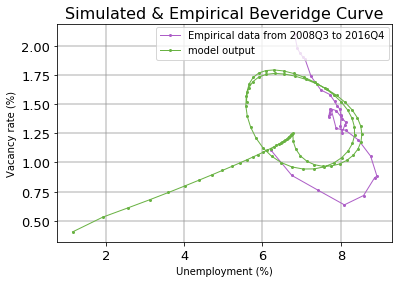

Cost: 0.4685337172913828 Union area: 2.4570137347184864 Intersection_area: 1.151193778563636
Simulation took:  0:01:24.809684
a: 0.028408 delta_u: 0.011553 delta_nu: 0.004021 gamma_u: 0.125012 timestep: 16.55937 fitness: 0.4685337172913828
Simulation started at:  2020-05-16 02:38:44.713918


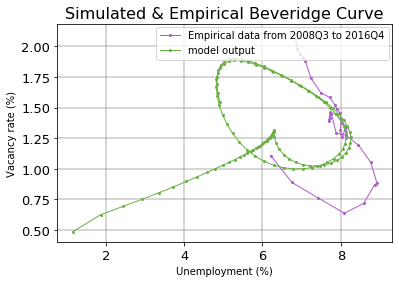

Cost: 0.31713174176427666 Union area: 2.923109737319991 Intersection_area: 0.927010882364406
Simulation took:  0:01:56.663573
a: 0.028729 delta_u: 0.011529 delta_nu: 0.004814 gamma_u: 0.12499 timestep: 11.935621 fitness: 0.31713174176427666
Simulation started at:  2020-05-16 02:39:59.135637


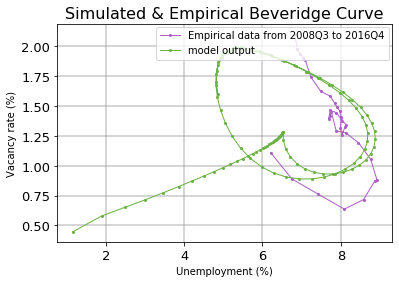

Cost: 0.38977828263021747 Union area: 3.4634251814675565 Intersection_area: 1.3499679192506735
Simulation took:  0:01:42.985029
a: 0.035777 delta_u: 0.011526 delta_nu: 0.004433 gamma_u: 0.125081 timestep: 13.520827 fitness: 0.38977828263021747
Simulation started at:  2020-05-16 02:40:03.010872


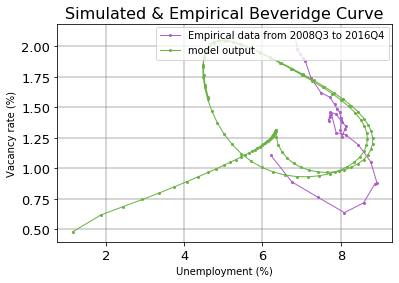

Cost: 0.34576809111111256 Union area: 3.636193673719785 Intersection_area: 1.2572797454723936
Simulation took:  0:02:04.774653
a: 0.035489 delta_u: 0.011524 delta_nu: 0.004759 gamma_u: 0.124775 timestep: 11.209402 fitness: 0.34576809111111256
Simulation started at:  2020-05-16 02:40:07.472116


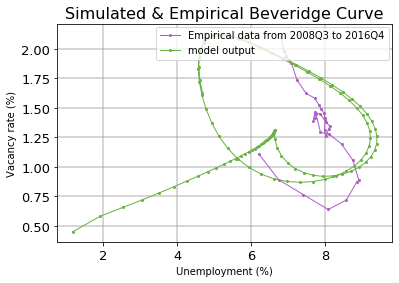

Cost: 0.3546117271377608 Union area: 4.232136039595689 Intersection_area: 1.50076507048299
Simulation took:  0:01:56.938227
a: 0.04048 delta_u: 0.01165 delta_nu: 0.004438 gamma_u: 0.125011 timestep: 11.89333 fitness: 0.3546117271377608
Simulation started at:  2020-05-16 02:40:41.717620


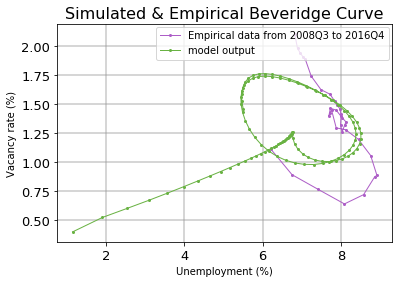

Cost: 0.42774810382982376 Union area: 2.4472678929009906 Intersection_area: 1.046814200752007
Simulation took:  0:01:44.852700
a: 0.026299 delta_u: 0.01139 delta_nu: 0.003932 gamma_u: 0.124849 timestep: 13.147228 fitness: 0.42774810382982376
Simulation started at:  2020-05-16 02:41:44.018620


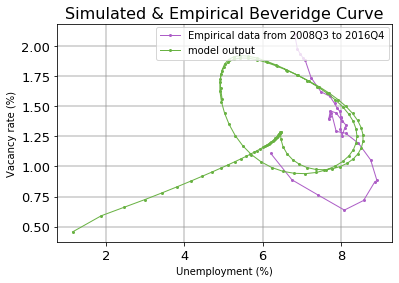

Cost: 0.3832893669675377 Union area: 3.0545245775091017 Intersection_area: 1.170766791700249
Simulation took:  0:01:45.434642
a: 0.031797 delta_u: 0.011516 delta_nu: 0.004526 gamma_u: 0.125035 timestep: 13.226941 fitness: 0.3832893669675377
Simulation started at:  2020-05-16 02:41:48.479338


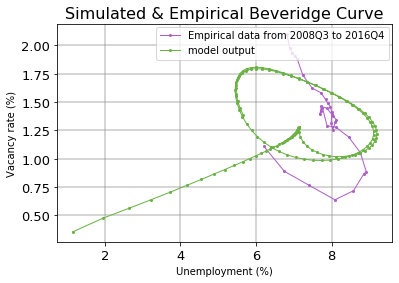

Cost: 0.41717504503588854 Union area: 2.7427947417363194 Intersection_area: 1.1442255199080473
Simulation took:  0:02:16.882466
a: 0.028626 delta_u: 0.01148 delta_nu: 0.003507 gamma_u: 0.125253 timestep: 10.1202 fitness: 0.41717504503588854
Simulation started at:  2020-05-16 02:42:58.641078


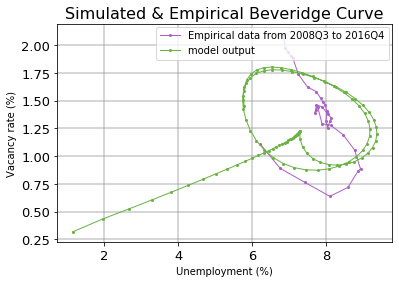

Cost: 0.5120728591504451 Union area: 2.790610599030723 Intersection_area: 1.4289959482211987
Simulation took:  0:01:35.103258
a: 0.032267 delta_u: 0.011398 delta_nu: 0.003134 gamma_u: 0.124876 timestep: 14.739672 fitness: 0.5120728591504451
Simulation started at:  2020-05-16 02:43:19.151353


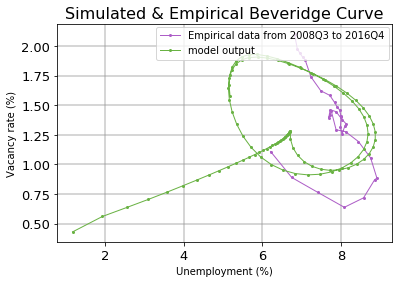

Cost: 0.4230345087682789 Union area: 3.112151193380023 Intersection_area: 1.316547351304131
Simulation took:  0:01:38.340911
a: 0.033593 delta_u: 0.011626 delta_nu: 0.004262 gamma_u: 0.124971 timestep: 14.057967 fitness: 0.4230345087682789
Simulation started at:  2020-05-16 02:43:26.861688


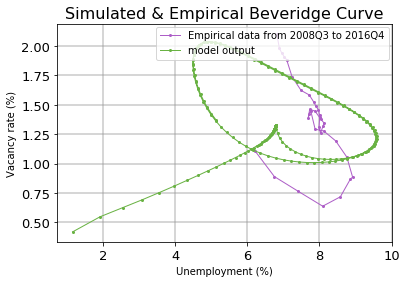

Cost: 0.3103261588468246 Union area: 3.692992556356604 Intersection_area: 1.1460321946640604
Simulation took:  0:03:25.195615
a: 0.035188 delta_u: 0.011539 delta_nu: 0.004155 gamma_u: 0.124967 timestep: 6.818382 fitness: 0.3103261588468246
Simulation started at:  2020-05-16 02:43:32.731367


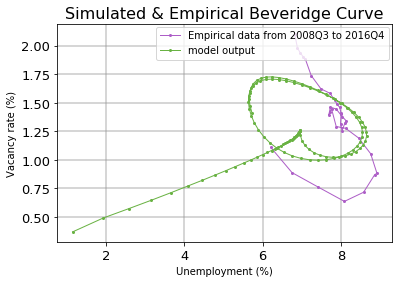

Cost: 0.43678014543689836 Union area: 2.3354987771429077 Intersection_area: 1.0200994955481775
Simulation took:  0:01:53.998145
a: 0.024895 delta_u: 0.011411 delta_nu: 0.003673 gamma_u: 0.124928 timestep: 12.365841 fitness: 0.43678014543689836
Simulation started at:  2020-05-16 02:44:52.671306


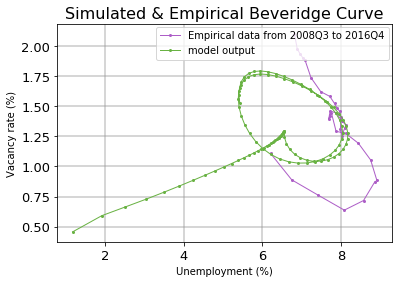

Cost: 0.3553986356027703 Union area: 2.439852398224431 Intersection_area: 0.8671202134011098
Simulation took:  0:01:37.674367
a: 0.025063 delta_u: 0.011655 delta_nu: 0.004531 gamma_u: 0.124897 timestep: 14.374089 fitness: 0.3553986356027703
Simulation started at:  2020-05-16 02:45:04.563234


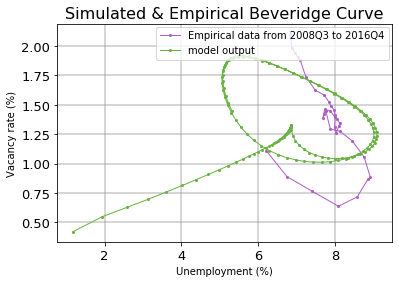

Cost: 0.3672587873132005 Union area: 3.038875474404675 Intersection_area: 1.1160537215256878
Simulation took:  0:02:28.476475
a: 0.030397 delta_u: 0.011667 delta_nu: 0.004159 gamma_u: 0.125092 timestep: 9.362685 fitness: 0.3672587873132005
Simulation started at:  2020-05-16 02:45:47.661251


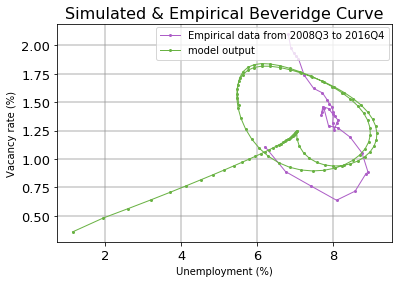

Cost: 0.4779386335190657 Union area: 2.8781891417639685 Intersection_area: 1.3755977854240835
Simulation took:  0:01:40.838132
a: 0.032182 delta_u: 0.011449 delta_nu: 0.003553 gamma_u: 0.125098 timestep: 13.718649 fitness: 0.4779386335190657
Simulation started at:  2020-05-16 02:46:33.536985


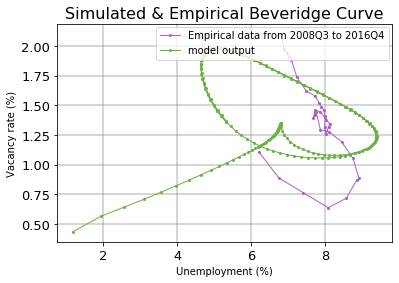

Cost: 0.29964820093083877 Union area: 3.3618843817793267 Intersection_area: 1.0073826067376603
Simulation took:  0:03:39.309057
a: 0.032359 delta_u: 0.011661 delta_nu: 0.004299 gamma_u: 0.124848 timestep: 6.358533 fitness: 0.29964820093083877
Simulation started at:  2020-05-16 02:47:12.145316


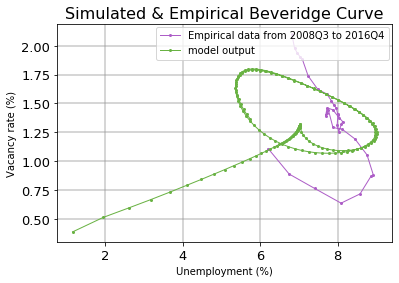

Cost: 0.3509034559262042 Union area: 2.6017381860419304 Intersection_area: 0.912958920897287
Simulation took:  0:02:57.382337
a: 0.02581 delta_u: 0.011603 delta_nu: 0.003851 gamma_u: 0.125039 timestep: 7.949623 fitness: 0.3509034559262042
Simulation started at:  2020-05-16 02:48:01.991782


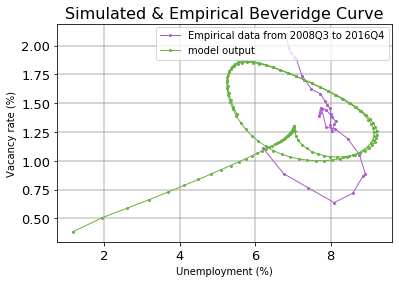

Cost: 0.38596407828327445 Union area: 2.928599963049883 Intersection_area: 1.1303343853989798
Simulation took:  0:02:28.318102
a: 0.029771 delta_u: 0.011583 delta_nu: 0.003794 gamma_u: 0.125107 timestep: 9.403924 fitness: 0.38596407828327445
Simulation started at:  2020-05-16 02:48:16.019329


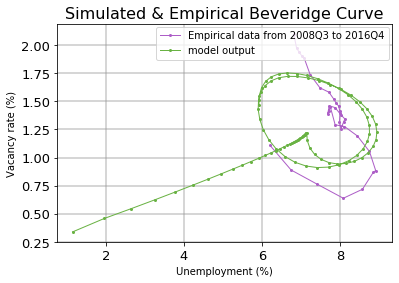

Cost: 0.5286967682657625 Union area: 2.3997801692264837 Intersection_area: 1.2687560200183066
Simulation took:  0:01:24.910471
a: 0.028847 delta_u: 0.011463 delta_nu: 0.003344 gamma_u: 0.125006 timestep: 16.282246 fitness: 0.5286967682657625
Simulation started at:  2020-05-16 02:48:37.100963


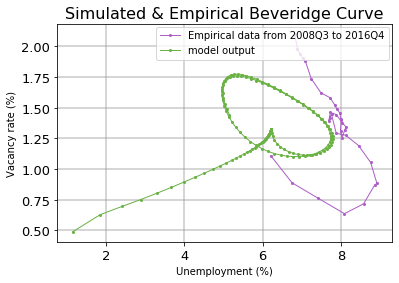

Cost: 0.20812427334600667 Union area: 2.5146210464255403 Intersection_area: 0.5233536780278905
Simulation took:  0:02:28.391838
a: 0.021559 delta_u: 0.011437 delta_nu: 0.00485 gamma_u: 0.125106 timestep: 9.444907 fitness: 0.20812427334600667
Simulation started at:  2020-05-16 02:49:01.968066


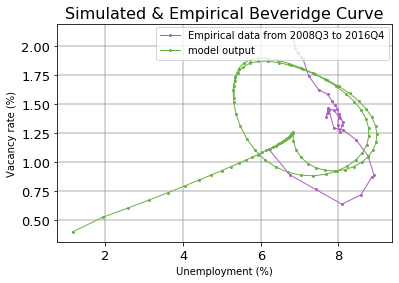

Cost: 0.4565946701747148 Union area: 3.0382353471170185 Intersection_area: 1.387242066230055
Simulation took:  0:01:32.220174
a: 0.033907 delta_u: 0.011528 delta_nu: 0.003947 gamma_u: 0.12492 timestep: 15.161022 fitness: 0.4565946701747148


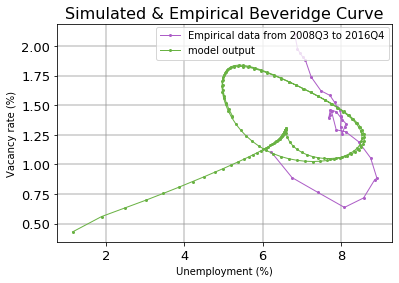

Cost: 0.3478020096492397 Union area: 2.7466374025098315 Intersection_area: 0.955286008370687
Simulation took:  0:02:28.375639
a: 0.027151 delta_u: 0.0114 delta_nu: 0.004273 gamma_u: 0.124743 timestep: 9.052399 fitness: 0.3478020096492397
Simulation started at:  2020-05-16 02:50:30.405888


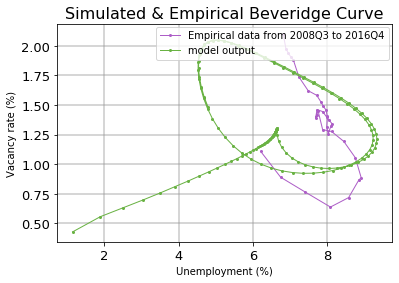

Cost: 0.35393692102206925 Union area: 3.8294651271763493 Intersection_area: 1.355389096274184
Simulation took:  0:02:18.354401
a: 0.036832 delta_u: 0.01145 delta_nu: 0.004236 gamma_u: 0.124904 timestep: 9.542941 fitness: 0.35393692102206925
Simulation started at:  2020-05-16 02:50:34.406946


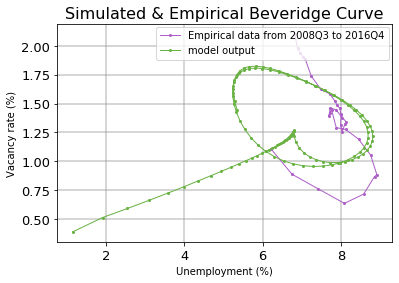

Cost: 0.4299420320785467 Union area: 2.741860269689858 Intersection_area: 1.1788409760258896
Simulation took:  0:01:48.450340
a: 0.029162 delta_u: 0.011382 delta_nu: 0.003875 gamma_u: 0.125099 timestep: 11.591761 fitness: 0.4299420320785467
Simulation started at:  2020-05-16 02:50:50.454131


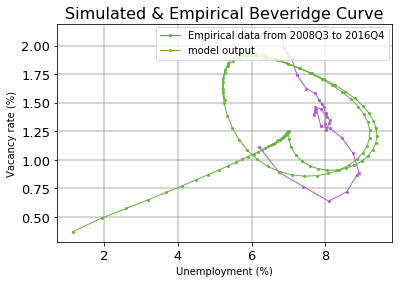

Cost: 0.44356691973423856 Union area: 3.394824154588009 Intersection_area: 1.5058316932899936
Simulation took:  0:01:21.902992
a: 0.036248 delta_u: 0.011469 delta_nu: 0.003644 gamma_u: 0.125025 timestep: 13.444215 fitness: 0.44356691973423856
Simulation started at:  2020-05-16 02:51:56.339888


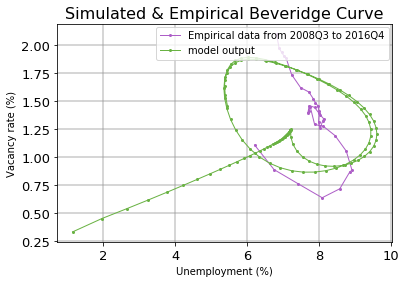

Cost: 0.448741376149475 Union area: 3.3301552307393774 Intersection_area: 1.4943784410333607
Simulation took:  0:01:27.645153
a: 0.0354 delta_u: 0.011424 delta_nu: 0.003289 gamma_u: 0.125154 timestep: 12.477872 fitness: 0.448741376149475
Simulation started at:  2020-05-16 02:51:58.141270


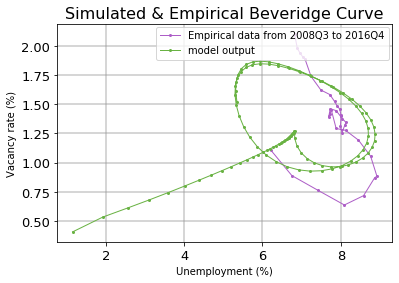

Cost: 0.44498819692631136 Union area: 2.866772243125274 Intersection_area: 1.2756798114667127
Simulation took:  0:01:20.765437
a: 0.03148 delta_u: 0.011554 delta_nu: 0.004035 gamma_u: 0.124789 timestep: 13.904238 fitness: 0.44498819692631136
Simulation started at:  2020-05-16 02:52:11.249125


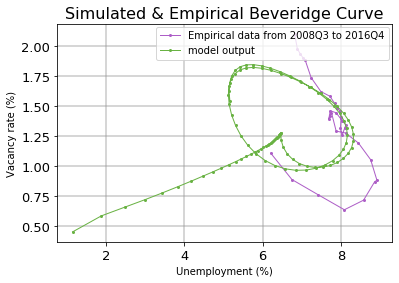

Cost: 0.3753434874660425 Union area: 2.727261333833033 Intersection_area: 1.0236597802721814
Simulation took:  0:01:17.499390
a: 0.028743 delta_u: 0.01151 delta_nu: 0.004495 gamma_u: 0.124907 timestep: 14.381653 fitness: 0.3753434874660425
Simulation started at:  2020-05-16 02:53:15.667989


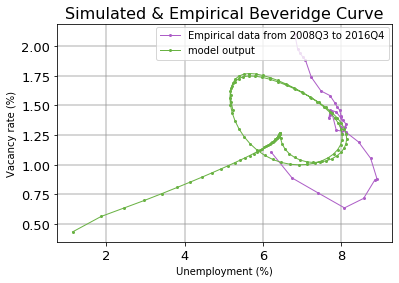

Cost: 0.32951225658007083 Union area: 2.545558999217329 Intersection_area: 0.8387928900898088
Simulation took:  0:01:27.779844
a: 0.025194 delta_u: 0.01132 delta_nu: 0.00432 gamma_u: 0.125134 timestep: 12.66314 fitness: 0.32951225658007083
Simulation started at:  2020-05-16 02:53:39.064738


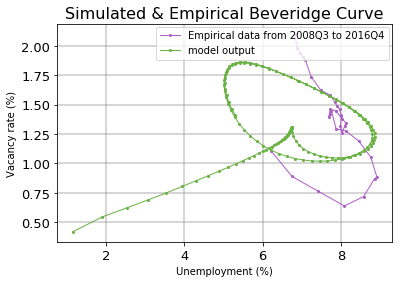

Cost: 0.366395523688467 Union area: 2.8455645633750737 Intersection_area: 1.042602118387154
Simulation took:  0:02:04.194808
a: 0.028524 delta_u: 0.011484 delta_nu: 0.004129 gamma_u: 0.124991 timestep: 8.912955 fitness: 0.366395523688467
Simulation started at:  2020-05-16 02:54:00.567309


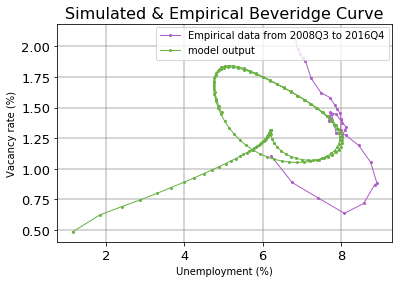

Cost: 0.2564063475088935 Union area: 2.7528815911852247 Intersection_area: 0.7058563139202745
Simulation took:  0:01:55.008109
a: 0.025206 delta_u: 0.011384 delta_nu: 0.004819 gamma_u: 0.125036 timestep: 9.544996 fitness: 0.2564063475088935
Simulation started at:  2020-05-16 02:55:10.732054


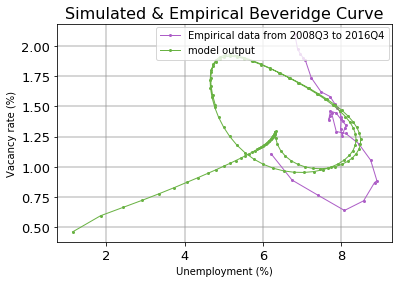

Cost: 0.3442590443933851 Union area: 3.155341374166591 Intersection_area: 1.0862548062055013
Simulation took:  0:01:37.948383
a: 0.031286 delta_u: 0.011341 delta_nu: 0.004559 gamma_u: 0.124999 timestep: 11.193825 fitness: 0.3442590443933851
Simulation started at:  2020-05-16 02:55:17.043616


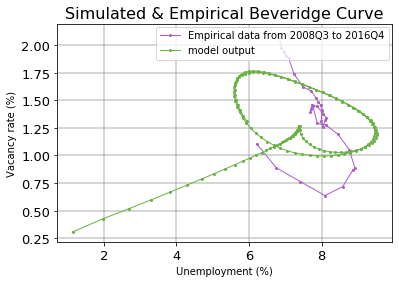

Cost: 0.3959818110297245 Union area: 2.7369463942265635 Intersection_area: 1.083780989877109
Simulation took:  0:02:09.603610
a: 0.028206 delta_u: 0.011388 delta_nu: 0.003049 gamma_u: 0.125024 timestep: 8.467995 fitness: 0.3959818110297245
Simulation started at:  2020-05-16 02:56:10.209865


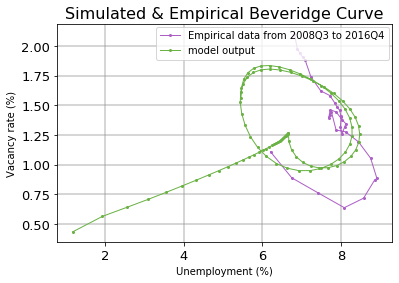

Cost: 0.44113260634786156 Union area: 2.583898961058486 Intersection_area: 1.1398420832312617
Simulation took:  0:01:06.881534
a: 0.029378 delta_u: 0.011647 delta_nu: 0.004298 gamma_u: 0.124959 timestep: 16.454961 fitness: 0.44113260634786156
Simulation started at:  2020-05-16 02:56:17.638903


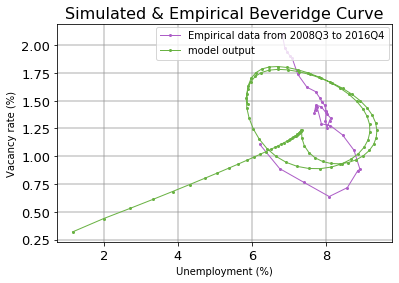

Cost: 0.5014433768595562 Union area: 2.7566392231391506 Intersection_area: 1.3822984808343992
Simulation took:  0:01:14.142071
a: 0.031819 delta_u: 0.011527 delta_nu: 0.003157 gamma_u: 0.125196 timestep: 14.817726 fitness: 0.5014433768595562
Simulation started at:  2020-05-16 02:56:31.210826


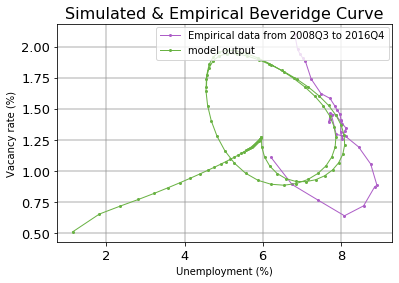

Cost: 0.27639330206612317 Union area: 3.4566258996680492 Intersection_area: 0.9553882464165359
Simulation took:  0:01:08.656406
a: 0.034461 delta_u: 0.01137 delta_nu: 0.005039 gamma_u: 0.124928 timestep: 15.980964 fitness: 0.27639330206612317


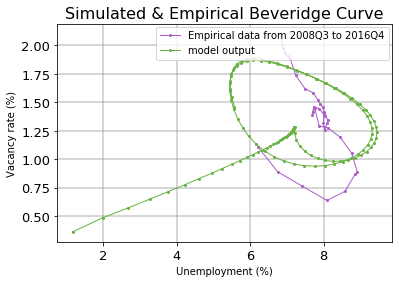

Cost: 0.42265302698481755 Union area: 3.0948439933857936 Intersection_area: 1.3080451818502863
Simulation took:  0:01:31.484833
a: 0.032476 delta_u: 0.011644 delta_nu: 0.003575 gamma_u: 0.125128 timestep: 11.601048 fitness: 0.42265302698481755
Simulation started at:  2020-05-16 02:57:49.154591


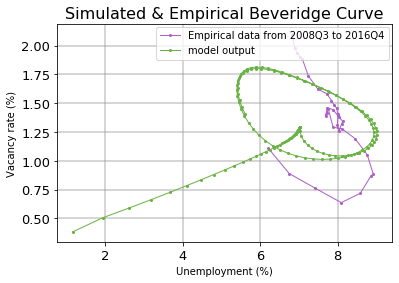

Cost: 0.3998797654408063 Union area: 2.673024285846948 Intersection_area: 1.0688883244420564
Simulation took:  0:01:46.844701
a: 0.027552 delta_u: 0.011557 delta_nu: 0.003797 gamma_u: 0.124818 timestep: 9.962287 fitness: 0.3998797654408063
Simulation started at:  2020-05-16 02:57:57.096957


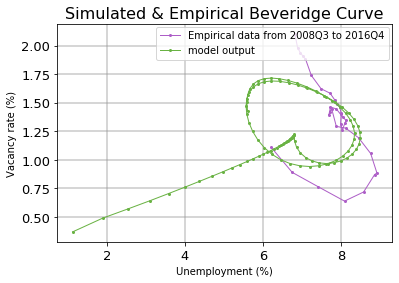

Cost: 0.4583909222913201 Union area: 2.3508384208834374 Intersection_area: 1.0776029919066294
Simulation took:  0:00:58.686644
a: 0.02621 delta_u: 0.011226 delta_nu: 0.003646 gamma_u: 0.124935 timestep: 14.551887 fitness: 0.4583909222913201


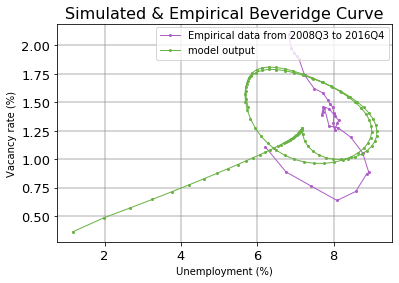

Cost: 0.45104094731416344 Union area: 2.6612002032439888 Intersection_area: 1.200310260663813
Simulation took:  0:01:01.648455
a: 0.029051 delta_u: 0.011631 delta_nu: 0.00358 gamma_u: 0.125044 timestep: 12.697199 fitness: 0.45104094731416344
Simulation started at:  2020-05-16 02:58:58.780906
Simulation started at:  2020-05-16 02:58:58.782094
Simulation started at:  2020-05-16 02:58:58.782094
Simulation started at:  2020-05-16 02:58:58.800411
gen	nevals	avg     	std      	min     	max     
0  	120   	0.386736	0.0658193	0.208124	0.539309


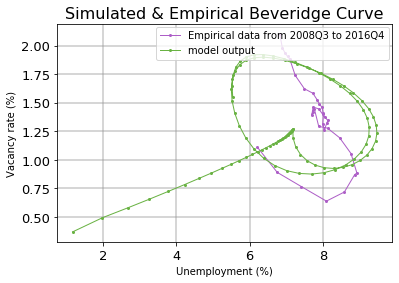

Cost: 0.4558885264470336 Union area: 3.2433067897634325 Intersection_area: 1.4785863532009103
Simulation took:  0:01:34.478629
a: 0.035629 delta_u: 0.011703 delta_nu: 0.003646 gamma_u: 0.124935 timestep: 14.551887 fitness: 0.4558885264470336
Simulation started at:  2020-05-16 03:00:33.287095


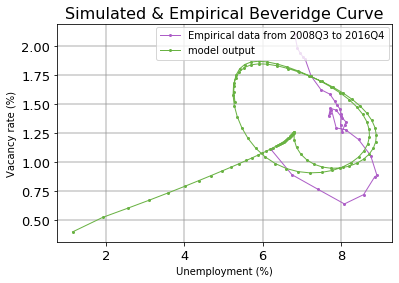

Cost: 0.44983534401168024 Union area: 2.9286998618079596 Intersection_area: 1.3174327098433438
Simulation took:  0:01:40.353986
a: 0.032182 delta_u: 0.011449 delta_nu: 0.003932 gamma_u: 0.124849 timestep: 13.718649 fitness: 0.44983534401168024
Simulation started at:  2020-05-16 03:00:39.182092


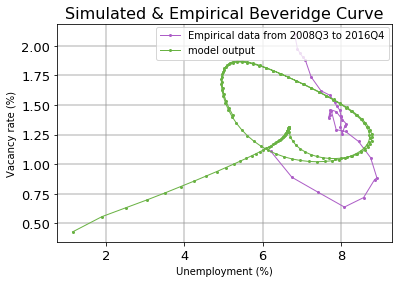

Cost: 0.3582903996399918 Union area: 2.8641222808832376 Intersection_area: 1.0261875166354602
Simulation took:  0:02:35.133493
a: 0.028524 delta_u: 0.011484 delta_nu: 0.004238 gamma_u: 0.12503 timestep: 8.912955 fitness: 0.3582903996399918
Simulation started at:  2020-05-16 03:01:33.949765


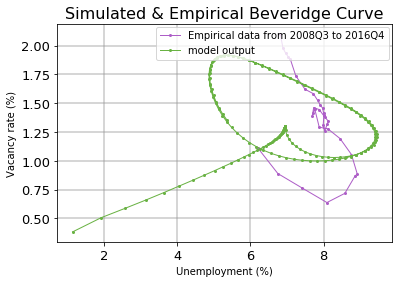

Cost: 0.3505975404065213 Union area: 3.2545289700457807 Intersection_area: 1.1410298520798197
Simulation took:  0:03:04.845047
a: 0.032182 delta_u: 0.011449 delta_nu: 0.00379 gamma_u: 0.125098 timestep: 7.516586 fitness: 0.3505975404065213
Simulation started at:  2020-05-16 03:02:03.725106


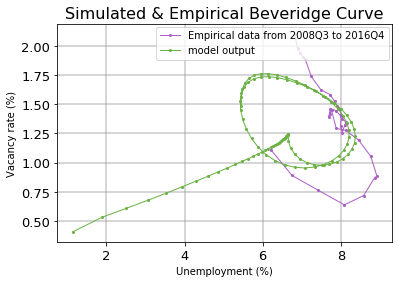

Cost: 0.42037653298867983 Union area: 2.4601455590149013 Intersection_area: 1.0341874607461818
Simulation took:  0:01:32.843757
a: 0.026906 delta_u: 0.011369 delta_nu: 0.004025 gamma_u: 0.125086 timestep: 15.085642 fitness: 0.42037653298867983
Simulation started at:  2020-05-16 03:02:12.065136


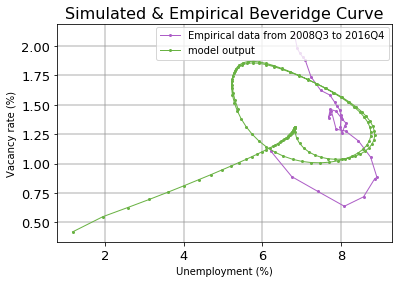

Cost: 0.39242728675313365 Union area: 2.8009730564282598 Intersection_area: 1.099178256802774
Simulation took:  0:02:09.655333
a: 0.028791 delta_u: 0.011644 delta_nu: 0.004158 gamma_u: 0.125128 timestep: 10.70349 fitness: 0.39242728675313365
Simulation started at:  2020-05-16 03:02:42.983159


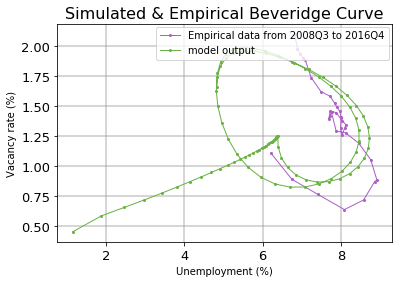

Cost: 0.3863348597152723 Union area: 3.565852357976362 Intersection_area: 1.3776130704841707
Simulation took:  0:01:24.902053
a: 0.03811 delta_u: 0.011441 delta_nu: 0.004477 gamma_u: 0.124941 timestep: 16.55937 fitness: 0.3863348597152723
Simulation started at:  2020-05-16 03:02:58.882153


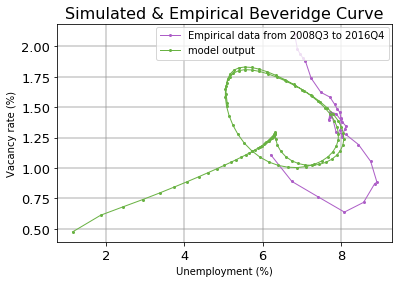

Cost: 0.31122634074901373 Union area: 2.6834385021118305 Intersection_area: 0.8351567456372796
Simulation took:  0:01:44.930606
a: 0.026645 delta_u: 0.011501 delta_nu: 0.00471 gamma_u: 0.124903 timestep: 13.520827 fitness: 0.31122634074901373
Simulation started at:  2020-05-16 03:04:27.954225


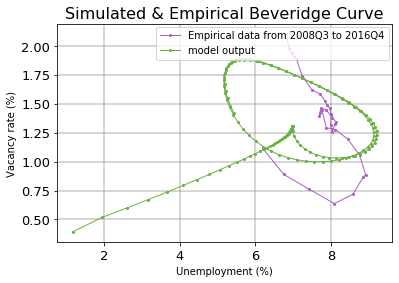

Cost: 0.3806950226705812 Union area: 3.007211220712369 Intersection_area: 1.1448303438443215
Simulation took:  0:02:28.452440
a: 0.030397 delta_u: 0.0116 delta_nu: 0.003896 gamma_u: 0.125092 timestep: 9.362685 fitness: 0.3806950226705812
Simulation started at:  2020-05-16 03:04:40.566399


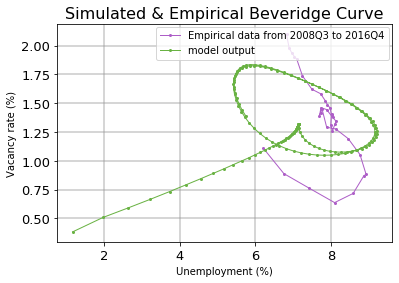

Cost: 0.3620652972817855 Union area: 2.7508624363003076 Intersection_area: 0.9959918257803676
Simulation took:  0:02:42.701113
a: 0.027552 delta_u: 0.011704 delta_nu: 0.003797 gamma_u: 0.124974 timestep: 8.634399 fitness: 0.3620652972817855
Simulation started at:  2020-05-16 03:04:46.479450


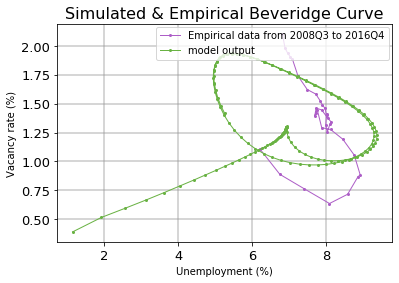

Cost: 0.3742287415713608 Union area: 3.292031560674708 Intersection_area: 1.231972828164499
Simulation took:  0:02:34.533146
a: 0.032855 delta_u: 0.011516 delta_nu: 0.003889 gamma_u: 0.124879 timestep: 9.098344 fitness: 0.3742287415713608


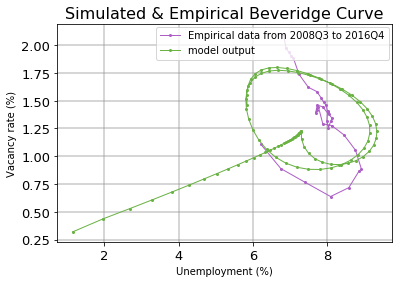

Cost: 0.5125455399698453 Union area: 2.7329580317750897 Intersection_area: 1.400765450111089
Simulation took:  0:01:25.695646
a: 0.031819 delta_u: 0.011456 delta_nu: 0.003157 gamma_u: 0.124932 timestep: 14.817726 fitness: 0.5125455399698453


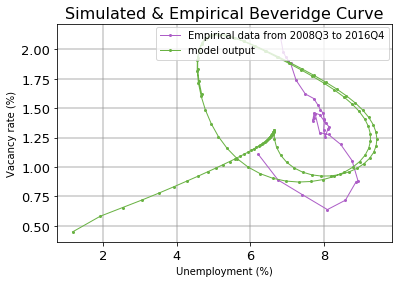

Cost: 0.35133280744235346 Union area: 4.257982825291311 Intersection_area: 1.4959690600509203
Simulation took:  0:01:47.320581
a: 0.04048 delta_u: 0.01165 delta_nu: 0.004438 gamma_u: 0.125011 timestep: 11.667407 fitness: 0.35133280744235346


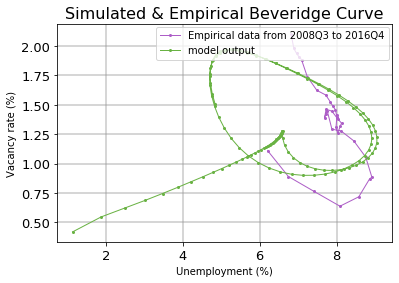

Cost: 0.38682114785099586 Union area: 3.4989311417140967 Intersection_area: 1.3534605604894423
Simulation took:  0:01:39.158815
a: 0.035188 delta_u: 0.011341 delta_nu: 0.004155 gamma_u: 0.124999 timestep: 11.193825 fitness: 0.38682114785099586
Simulation started at:  2020-05-16 03:06:25.668550
Simulation started at:  2020-05-16 03:06:25.671918
Simulation started at:  2020-05-16 03:06:25.672238
Simulation started at:  2020-05-16 03:06:25.792258
1  	14    	0.276989	0.0384773	0.208124	0.34719 


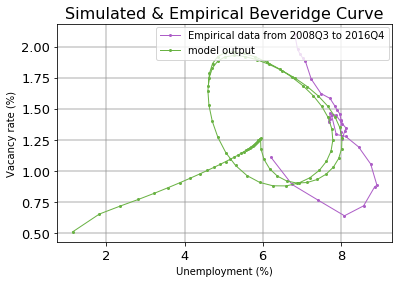

Cost: 0.2653754532784761 Union area: 3.430882344696458 Intersection_area: 0.9104719573689435
Simulation took:  0:01:21.350375
a: 0.034461 delta_u: 0.01137 delta_nu: 0.005039 gamma_u: 0.125065 timestep: 16.737062 fitness: 0.2653754532784761
Simulation started at:  2020-05-16 03:07:47.070226


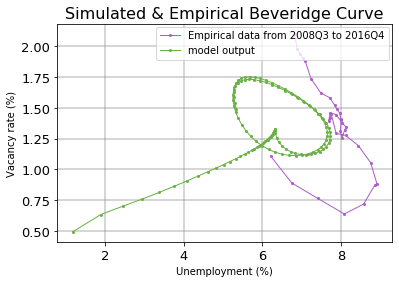

Cost: 0.2175842009056413 Union area: 2.3804474814871424 Intersection_area: 0.5179477630572262
Simulation took:  0:01:58.399447
a: 0.020529 delta_u: 0.011624 delta_nu: 0.004877 gamma_u: 0.125127 timestep: 11.670148 fitness: 0.2175842009056413
Simulation started at:  2020-05-16 03:08:24.159506


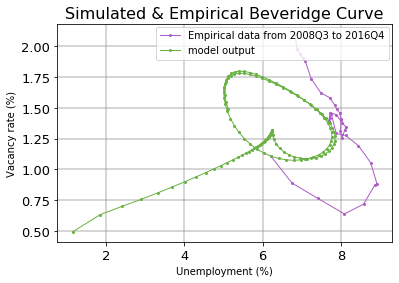

Cost: 0.2386634732801081 Union area: 2.5667052167030184 Intersection_area: 0.6125787819045149
Simulation took:  0:02:03.918471
a: 0.023099 delta_u: 0.011515 delta_nu: 0.004877 gamma_u: 0.125021 timestep: 11.209402 fitness: 0.2386634732801081
Simulation started at:  2020-05-16 03:08:29.739952


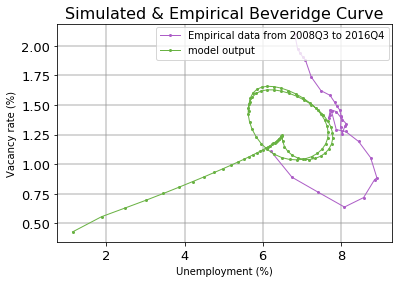

Cost: 0.2784826287492324 Union area: 2.1867237972225264 Intersection_area: 0.6089645913990326
Simulation took:  0:01:26.859058
a: 0.020529 delta_u: 0.01137 delta_nu: 0.004237 gamma_u: 0.124928 timestep: 15.980964 fitness: 0.2784826287492324
Simulation started at:  2020-05-16 03:09:13.957758


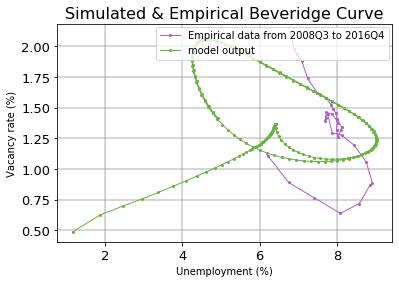

Cost: 0.2808803551903751 Union area: 3.482155878887168 Intersection_area: 0.9780691800900804
Simulation took:  0:03:42.666450
a: 0.032818 delta_u: 0.011601 delta_nu: 0.004823 gamma_u: 0.125131 timestep: 6.410728 fitness: 0.2808803551903751
Simulation started at:  2020-05-16 03:10:08.391637


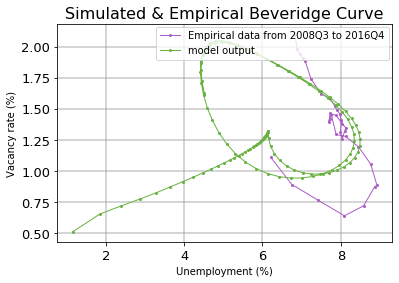

Cost: 0.32203376970614334 Union area: 3.544928954730272 Intersection_area: 1.1415868346322477
Simulation took:  0:01:59.931167
a: 0.034461 delta_u: 0.011529 delta_nu: 0.005039 gamma_u: 0.124928 timestep: 11.935621 fitness: 0.32203376970614334
Simulation started at:  2020-05-16 03:10:24.197094


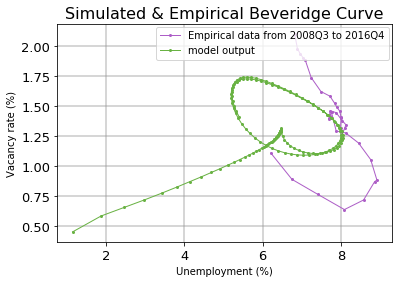

Cost: 0.27017890870645045 Union area: 2.3887617081363115 Intersection_area: 0.6453930314640252
Simulation took:  0:02:31.501047
a: 0.021559 delta_u: 0.011437 delta_nu: 0.004477 gamma_u: 0.124941 timestep: 9.444907 fitness: 0.27017890870645045
Simulation started at:  2020-05-16 03:11:01.283492


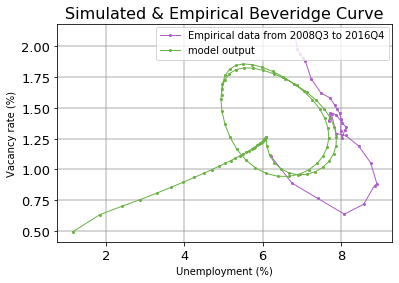

Cost: 0.26506244198942797 Union area: 2.9170823628109885 Intersection_area: 0.7732089745709712
Simulation took:  0:01:21.137222
a: 0.029447 delta_u: 0.011441 delta_nu: 0.004893 gamma_u: 0.125065 timestep: 16.737062 fitness: 0.26506244198942797
Simulation started at:  2020-05-16 03:11:45.372247


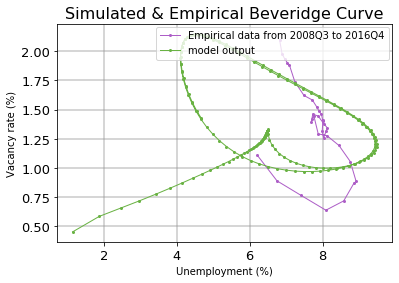

Cost: 0.3023119934541769 Union area: 4.131825289646121 Intersection_area: 1.2491003399173009
Simulation took:  0:03:16.486201
a: 0.03811 delta_u: 0.011441 delta_nu: 0.004477 gamma_u: 0.125016 timestep: 7.25412 fitness: 0.3023119934541769
Simulation started at:  2020-05-16 03:12:30.489839


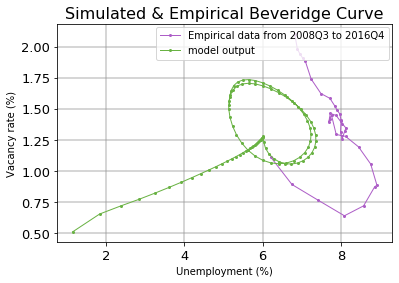

Cost: 0.14936947844793566 Union area: 2.5081899275750543 Intersection_area: 0.3746470213302514
Simulation took:  0:01:27.121128
a: 0.021559 delta_u: 0.011437 delta_nu: 0.005039 gamma_u: 0.124928 timestep: 15.980964 fitness: 0.14936947844793566
Simulation started at:  2020-05-16 03:13:12.519295


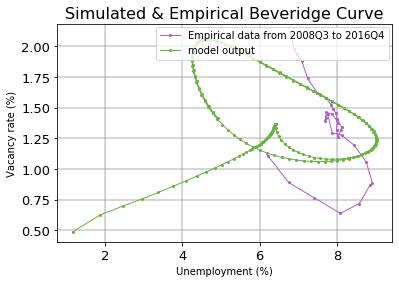

Cost: 0.2808803551903751 Union area: 3.482155878887168 Intersection_area: 0.9780691800900804
Simulation took:  0:03:39.353360
a: 0.032818 delta_u: 0.011601 delta_nu: 0.004823 gamma_u: 0.125131 timestep: 6.410728 fitness: 0.2808803551903751
Simulation started at:  2020-05-16 03:13:47.826769


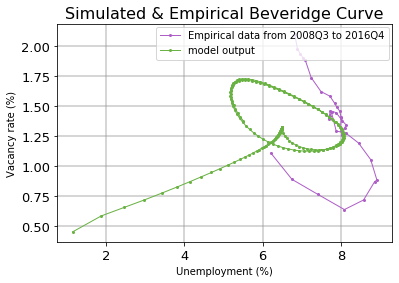

Cost: 0.24694645015238295 Union area: 2.344126880508591 Intersection_area: 0.5788738118483757
Simulation took:  0:03:03.308914
a: 0.020529 delta_u: 0.011441 delta_nu: 0.004477 gamma_u: 0.124941 timestep: 7.626864 fitness: 0.24694645015238295
Simulation started at:  2020-05-16 03:14:04.638046


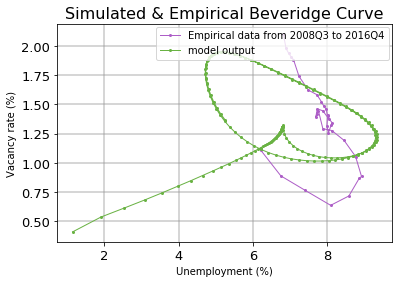

Cost: 0.33342538958033585 Union area: 3.293803897915919 Intersection_area: 1.0982378478638442
Simulation took:  0:03:12.294965
a: 0.032199 delta_u: 0.011491 delta_nu: 0.004069 gamma_u: 0.125016 timestep: 7.25412 fitness: 0.33342538958033585
Simulation started at:  2020-05-16 03:15:42.820902


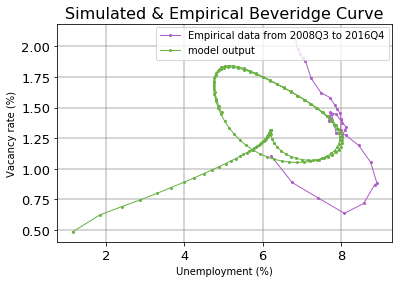

Cost: 0.2564063475088935 Union area: 2.7528815911852247 Intersection_area: 0.7058563139202745
Simulation took:  0:02:25.198717
a: 0.025206 delta_u: 0.011384 delta_nu: 0.004819 gamma_u: 0.125036 timestep: 9.544996 fitness: 0.2564063475088935
Simulation started at:  2020-05-16 03:16:13.080164


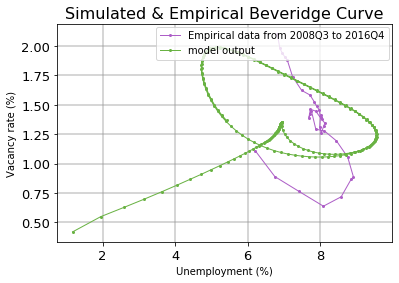

Cost: 0.2980071318875726 Union area: 3.4152173485289796 Intersection_area: 1.0177591268078017
Simulation took:  0:03:40.923290
a: 0.032818 delta_u: 0.011706 delta_nu: 0.004153 gamma_u: 0.125131 timestep: 6.410728 fitness: 0.2980071318875726
Simulation started at:  2020-05-16 03:16:53.497685


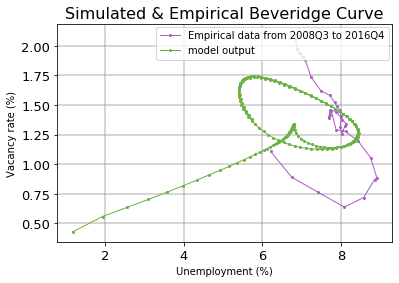

Cost: 0.29617069801918705 Union area: 2.334070625798241 Intersection_area: 0.6912833264687458
Simulation took:  0:03:01.415463
a: 0.021559 delta_u: 0.011624 delta_nu: 0.004237 gamma_u: 0.125106 timestep: 7.626864 fitness: 0.29617069801918705


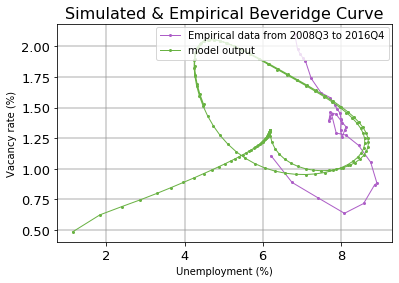

Cost: 0.3178597777031977 Union area: 3.634346130683743 Intersection_area: 1.1552124531956112
Simulation took:  0:02:08.751172
a: 0.034461 delta_u: 0.01137 delta_nu: 0.004819 gamma_u: 0.125036 timestep: 9.544996 fitness: 0.3178597777031977


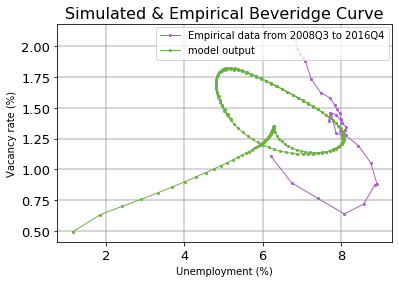

Cost: 0.23326546471453263 Union area: 2.595240791152937 Intersection_area: 0.6053800491944011
Simulation took:  0:02:53.438147
a: 0.023099 delta_u: 0.011515 delta_nu: 0.004877 gamma_u: 0.125021 timestep: 7.25412 fitness: 0.23326546471453263


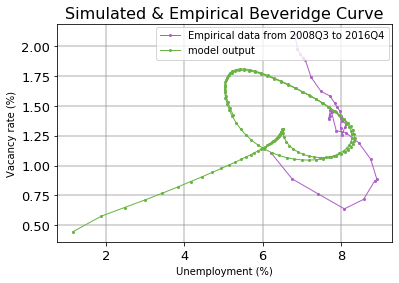

Cost: 0.32013476425099224 Union area: 2.6160515738526913 Intersection_area: 0.8374890538637686
Simulation took:  0:01:53.481568
a: 0.025206 delta_u: 0.011432 delta_nu: 0.004411 gamma_u: 0.124998 timestep: 9.544996 fitness: 0.32013476425099224
Simulation started at:  2020-05-16 03:18:47.012678
Simulation started at:  2020-05-16 03:18:47.018033
Simulation started at:  2020-05-16 03:18:47.017950
Simulation started at:  2020-05-16 03:18:47.109491
2  	19    	0.212867	0.0240208	0.149369	0.259823


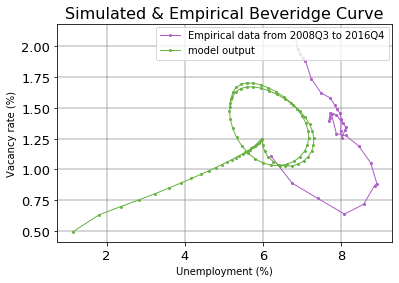

Cost: 0.1400154508805467 Union area: 2.502676431212907 Intersection_area: 0.3504133689243927
Simulation took:  0:01:22.191506
a: 0.021559 delta_u: 0.011294 delta_nu: 0.004893 gamma_u: 0.124928 timestep: 16.737062 fitness: 0.1400154508805467
Simulation started at:  2020-05-16 03:20:09.373950


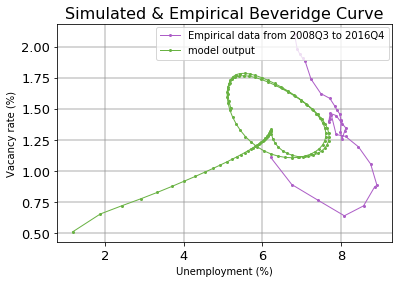

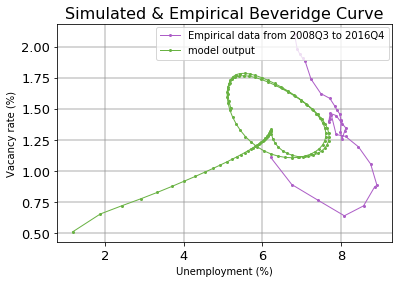

Cost: 0.20615515875401844 Union area: 2.48722732988093 Intersection_area: 0.5127547450489365
Simulation took:  0:01:59.268800
Cost: 0.20615515875401844 Union area: 2.48722732988093 Intersection_area: 0.5127547450489365
Simulation took:  0:01:59.277529
a: 0.021559 delta_u: 0.011624 delta_nu: 0.005039 gamma_u: 0.124928 timestep: 11.670148 fitness: 0.20615515875401844
a: 0.021559 delta_u: 0.011624 delta_nu: 0.005039 gamma_u: 0.124928 timestep: 11.670148 fitness: 0.20615515875401844
Simulation started at:  2020-05-16 03:20:46.331084
Simulation started at:  2020-05-16 03:20:46.338419


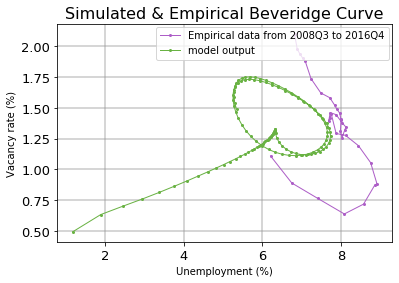

Cost: 0.2179949031869971 Union area: 2.3789649545393243 Intersection_area: 0.518602234950059
Simulation took:  0:01:59.834841
a: 0.020529 delta_u: 0.011624 delta_nu: 0.004877 gamma_u: 0.125065 timestep: 11.670148 fitness: 0.2179949031869971
Simulation started at:  2020-05-16 03:20:46.890024


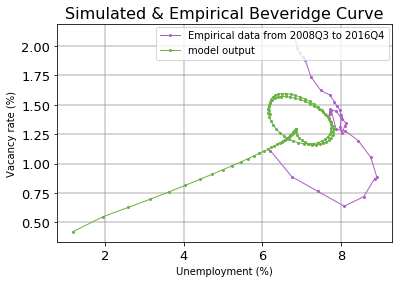

Cost: 0.22962308772704237 Union area: 1.9131433923341157 Intersection_area: 0.43930189301234807
Simulation took:  0:01:46.313079
a: 0.014268 delta_u: 0.011706 delta_nu: 0.004153 gamma_u: 0.125088 timestep: 13.221069 fitness: 0.22962308772704237
Simulation started at:  2020-05-16 03:21:55.722236


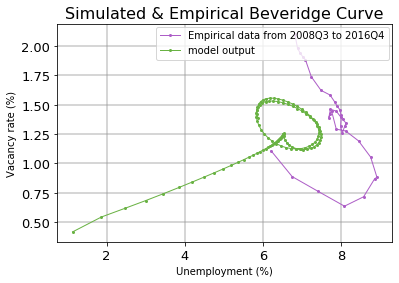

Cost: 0.16955198595613305 Union area: 2.01179370554401 Intersection_area: 0.34110361810903483
Simulation took:  0:01:46.287593
a: 0.014268 delta_u: 0.011294 delta_nu: 0.004153 gamma_u: 0.125088 timestep: 13.221069 fitness: 0.16955198595613305
Simulation started at:  2020-05-16 03:22:32.670259


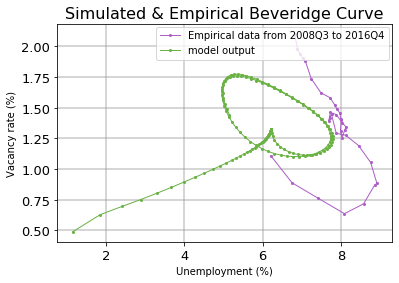

Cost: 0.20812427334600667 Union area: 2.5146210464255403 Intersection_area: 0.5233536780278905
Simulation took:  0:02:28.344925
a: 0.021559 delta_u: 0.011437 delta_nu: 0.00485 gamma_u: 0.125106 timestep: 9.444907 fitness: 0.20812427334600667
Simulation started at:  2020-05-16 03:23:14.752174


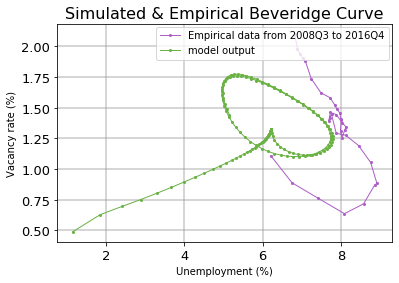

Cost: 0.20812427334600667 Union area: 2.5146210464255403 Intersection_area: 0.5233536780278905
Simulation took:  0:02:28.939548
a: 0.021559 delta_u: 0.011437 delta_nu: 0.00485 gamma_u: 0.125106 timestep: 9.444907 fitness: 0.20812427334600667
Simulation started at:  2020-05-16 03:23:15.866244


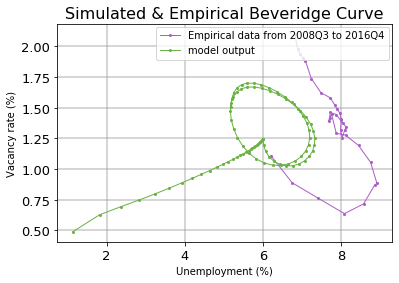

Cost: 0.14674528287511987 Union area: 2.4900765416386905 Intersection_area: 0.3654069864834698
Simulation took:  0:01:22.291377
a: 0.021559 delta_u: 0.011294 delta_nu: 0.00485 gamma_u: 0.125065 timestep: 16.737062 fitness: 0.14674528287511987
Simulation started at:  2020-05-16 03:23:18.062194


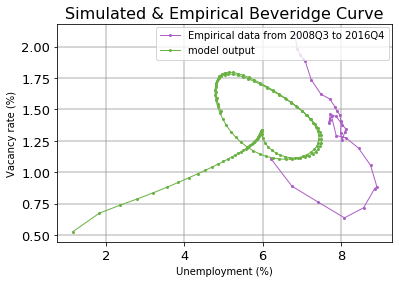

Cost: 0.15105627340609043 Union area: 2.6300131390866905 Intersection_area: 0.39727998379948926
Simulation took:  0:02:15.289590
a: 0.021559 delta_u: 0.011437 delta_nu: 0.005218 gamma_u: 0.124941 timestep: 10.337378 fitness: 0.15105627340609043
Simulation started at:  2020-05-16 03:24:47.990372


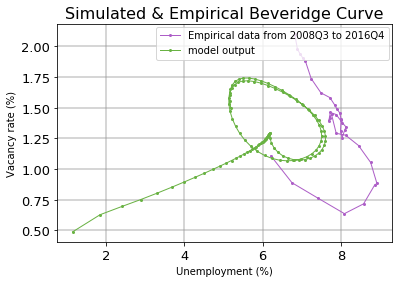

Cost: 0.19741874102368237 Union area: 2.477001586512554 Intersection_area: 0.4890065347229723
Simulation took:  0:01:45.366533
a: 0.021559 delta_u: 0.011437 delta_nu: 0.00485 gamma_u: 0.125088 timestep: 13.221069 fitness: 0.19741874102368237
Simulation started at:  2020-05-16 03:25:03.459691


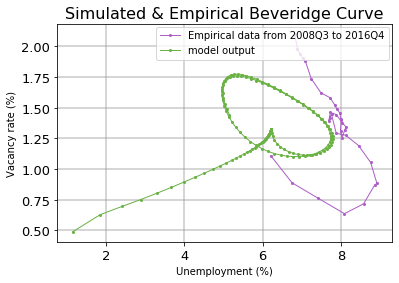

Cost: 0.20812427334600667 Union area: 2.5146210464255403 Intersection_area: 0.5233536780278905
Simulation took:  0:02:28.166972
a: 0.021559 delta_u: 0.011437 delta_nu: 0.00485 gamma_u: 0.125106 timestep: 9.444907 fitness: 0.20812427334600667


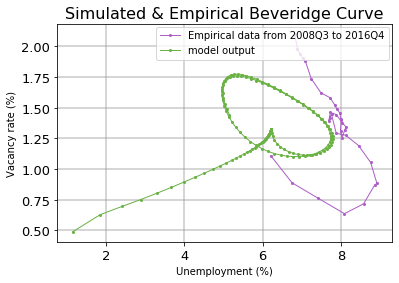

Cost: 0.20812427334600667 Union area: 2.5146210464255403 Intersection_area: 0.5233536780278905
Simulation took:  0:02:27.685407
a: 0.021559 delta_u: 0.011437 delta_nu: 0.00485 gamma_u: 0.125106 timestep: 9.444907 fitness: 0.20812427334600667


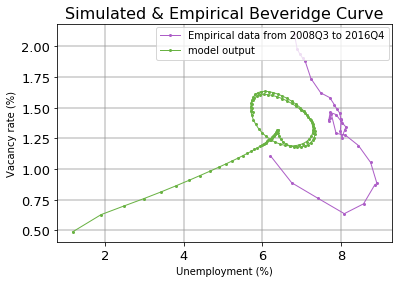

Cost: 0.13381370072386442 Union area: 2.0750686881059353 Intersection_area: 0.27767262041166957
Simulation took:  0:01:27.025288
a: 0.014268 delta_u: 0.011706 delta_nu: 0.00485 gamma_u: 0.125106 timestep: 13.221069 fitness: 0.13381370072386442


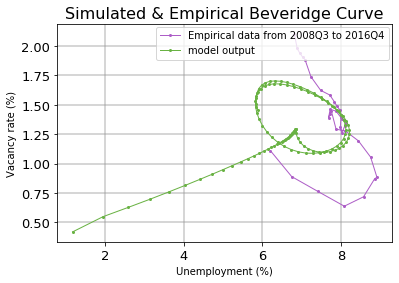

Cost: 0.35165423584400857 Union area: 2.121644347131516 Intersection_area: 0.7460852216232936
Simulation took:  0:01:17.907423
a: 0.020529 delta_u: 0.011706 delta_nu: 0.004153 gamma_u: 0.125127 timestep: 13.221069 fitness: 0.35165423584400857
3  	15    	0.153259	0.0224778	0.133814	0.208124


Process ForkPoolWorker-20:
Process ForkPoolWorker-21:
Process ForkPoolWorker-19:
Process ForkPoolWorker-18:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/P

In [136]:

#    License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, typecode='b', fitness=creator.FitnessMin)

toolbox = base.Toolbox()
# CALIBRATING EARLY TS
# a: 0.02817 delta_u: 0.01172 delta_nu: 0.0034 gamma_u: 0.11443 timestep: 13.22888 
# a: 0.02769 delta_u: 0.00995 delta_nu: 0.00292 gamma_u: 0.10259 timestep: 12.70966 fitness: 0.31854718284205275

# CALIBRATING LATE TS
# a: 0.02751 delta_u: 0.01435 delta_nu: 0.00664 gamma_u: 0.12844 timestep: 12.93995 

# CALIBRATING FULL TS
# THIS IS WHAT CURRENT MODEL EXECUTION IS BASED ON
# a = 0.026
# delta_u = 0.011
# delta_nu = 0.00042
# gamma_u = 0.174
# gamma_nu = gamma_u
# timestep = 16.6

# a = 0.03
# delta_u = 0.011
# delta_nu = 0.004
# gamma_u = 0.12
# gamma_nu = gamma_u
# timestep = 14

# a: 0.02749 delta_u: 0.01079 delta_nu: 0.0004 gamma_u: 0.15314 timestep: 13.15804 fitness: 0.45688536024529336
func_seq = [lambda: round(abs(random.normalvariate(0.03, 0.005)),6), 
            lambda: round(abs(random.normalvariate(0.0115, 0.0001)), 6), 
            lambda: round(abs(random.normalvariate(0.004, 0.0005)),6), 
            lambda: round(abs(random.normalvariate(0.125, 0.0001)), 6),
            lambda: round(abs(random.normalvariate(12, 3)),6)]


# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual, func_seq, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxUniform, indpb = 0.5)
toolbox.register("mutate", tools.mutGaussian, mu = 0.01, sigma = 0.01, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=15)

import multiprocessing


def main():
    random.seed(64)

    results = []

    pool = multiprocessing.Pool()
    toolbox.register("map", pool.map)

    
    pop = toolbox.population(n=120)
    hof = tools.HallOfFame(20)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaMuPlusLambda(pop, toolbox, mu = 40, lambda_ = 30, cxpb=0.49, mutpb=0.01, ngen=3, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    return pop, log, hof

if __name__ == "__main__":
    pop, log, hof = main()
